# Анализ рынка недвижимости Санкт-Петербурга и области

На данные сервиса Яндекс.Недвижимость с объявлениями о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет необходимо определить рыночную стоимость объектов недвижимости и установить параметры, влияющие на нее. Это позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.  

### Имплорт данных. 

In [1]:
# Импортируем библиотеки, используемые в проекте.

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta


In [2]:
# Сохраняем датасет в перменную.

data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
# Изучаем первые 20 строк датасета.
data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [4]:
# На экране каша, так как данные разделены не запятой, а обратная косая черта — необходим парамтр 'sep'.

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [5]:
# Снова изучаем первые 20 строчек датафрейма.

pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Обращают на себя внимание блольшое число пропусков.

In [6]:
# Изучаем информацию о датафрейме.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Числа ненулевых значений очень разнятся — в разных столбцах разное число пропущенных значений.

In [7]:
# Повышаем качество отображения графиков.

%config InlineBackend.figure_format = 'retina'

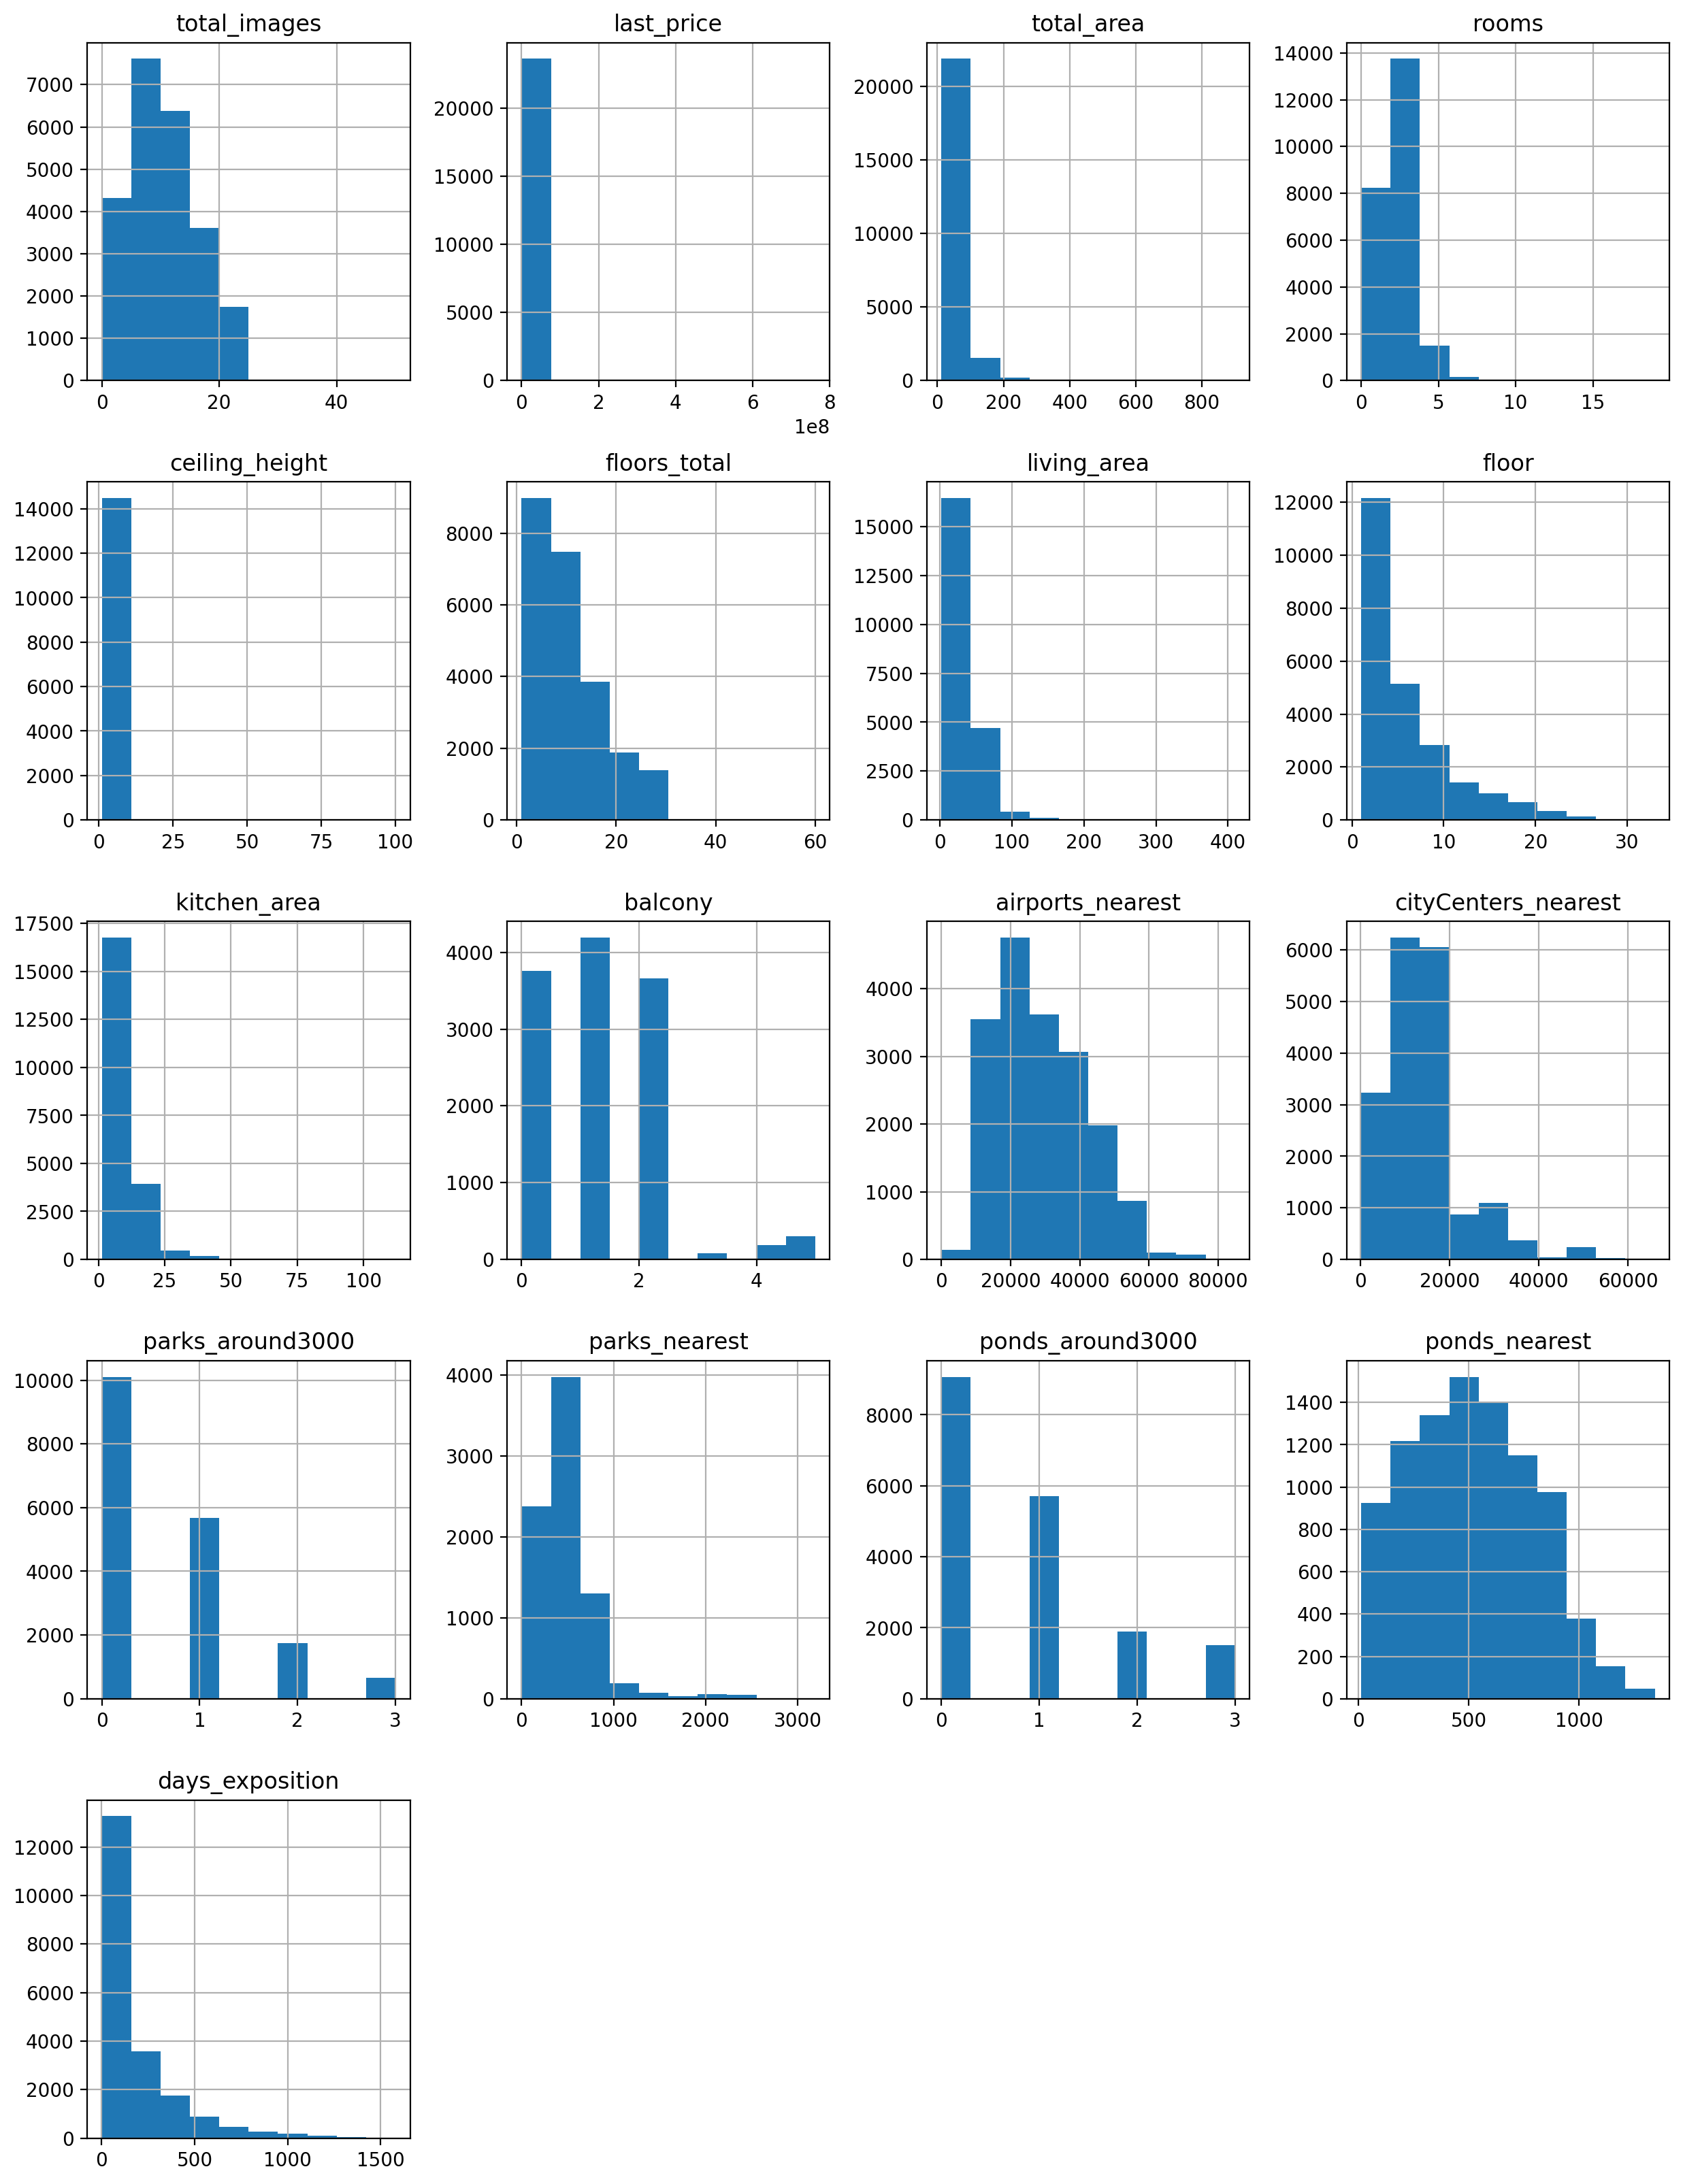

In [8]:
# Строим гистроаммы для всех числовых столбцов в таблице.
# Добавляем ';' в конце строчки для избавления от лишнего технического текста перед графиками.

data.hist(figsize=(15, 20));

Часть гистограмм неинформативна. Например, по столбцу с ценой на момент снятия публикации. Возможно, это из-за наличия выбросов.

### Предобработка данных

#### Поиск и изучение пропущенных данных

In [9]:
# Смотрим число пропущенных значений для каждого столбца.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В больше половине столбцов есть пропуски, причем в некоторых их больше половины, а в одном 90 %.

Сразу наметим, какие пропуски и каким образом будем заполнять.

Пропущенную высоту потолков можно заполнить медианным значением высоты потолков для домов отпределенной этажности. 

Установить пропущенную этажность дома на основании имеющихся данных не представляется возможным. Заполнять ее по медианному или среднему значению нецелесоображно: она важна, наверное, для определения факта нахождения квартиры на последнем этаже — заполненные таким образом данные могут исказить определение такого факта.

Пропущеную жилую площадь можно заполнить на основании общей площади. Однако я не уверен, что понятие жилой площади применимо к апартаментм.

Наибольшее число пропусков в столбце "is_apartment" — можно предположить, что если значение не указано, то, скорее всего, это не аппартаменты.

Пропущенную площадь кухни можно восстановить по общей площади.

Если пропущено число балконов, можно предположить, что их нет.

Восстановить пропущенное название населенного пункта не представляется возможным. Но для возможности выполнения манипуляций с данным столбцом заменим пропущенные значения на unknown.

Отстуствие данных о расстоянии до центра города, аэропорта, парков и водоемов заполнить не представляется возможным. Можно лишь предположить, что отсутствие информации о расстоянии до аэропорта, парка и водоема говорит об отстутсвии их поблизости.

Согласно неавнему [исследованию](https://blog.domclick.ru/nedvizhimost/post/skolko-vremeni-zanimaet-prodazha-kvartiry-na-vtorichnom-rynke-issledovanie-domklik?ysclid=ld90gjids879451160) "Домклик", срок продажи зависит от числа комнат — можно заполнить пропуски медианным значением в зависимости от числа комнат.

In [10]:
# Посмотрим медианное значение высоты потолков в зависимости от этажности здания.

data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')

,ceiling_height
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


Обращают на себя внимание очень высокие потолки в 36-этажном здании и очень низкие в 37-этажном

In [11]:
# Посмотрим, в чем проблема.

data[data['ceiling_height'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,False,False,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,False,False,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


Оказалось, это не единичная ошибка: вместо 2.7 было написано 27. Исправим.

In [12]:
# Заменим 27 на 2.7

data.loc[data['ceiling_height'] == 27, 'ceiling_height'] = 2.7

In [13]:
# Посмотрим, в чем проблема с 37-этажным домом.

data[data['ceiling_height'] == 1.75]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Тут не так очевидно, но можно предположить, что тоже ошибка: 1.75 вместо 2.75. Испарвим.

In [14]:
# Заменим 1.75 на 2.75.

data.loc[data['ceiling_height'] == 1.75, 'ceiling_height'] = 2.75

In [15]:
# Посмотрим, есть ли еще ошибки в высоте потолков.

data[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,False,False,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,False,False,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,False,False,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0


В 13 случаях из 14, скорее всего, просто ошиблись с местом точки. 100-метровые потолки точно нереальны, но и 10 метровые кажутся чересчур высокими. Хотя если учесть, что это аппартаменты, может быть и такое.

In [16]:
# Исправим ошибку.

data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

In [17]:
# Заменим пропуски в высоте потолков на медианное значение по этажности зданий.

for f in data['floors_total'].unique():
    data.loc[(data['floors_total'] == f) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == f), 'ceiling_height'].median()

/Users/shinkarenko/opt/anaconda3/envs/da_practicum_env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [18]:
# Из-за отсутствия данных об общем числе этажей в 78 строках,
# заменить пропущенные данные о высоте потолков не удалось.

data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21273,3,6300000.0,70.02,2015-03-28T00:00:00,2,NaN,NaN,34.87,19,NaN,False,False,10.13,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,516.0
21753,7,6800000.0,57.00,2017-05-01T00:00:00,2,NaN,NaN,NaN,21,NaN,False,False,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22656,4,4574160.0,64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0


In [19]:
# Заменим оставшиеся пропуски медианным значением высоты потолков.

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [20]:
# Проверим, что в столбце 'ceiling_height' не осталось пропусков.

data['ceiling_height'].isna().sum()

0

In [21]:
# Проверим, есть ли корреляция между жилой и общей площадями.

data['living_area'].corr(data['total_area'])

0.9395373338721493

Корреляция высокая и пряммая — можно по общей площади заполнить пропущенные значения жилой площади.

In [22]:
# Заменим отсутствующие значения, разделив общую площадь на медианное значение
# отношения общей площади к жилой площади.

data.loc[data['living_area'].isna(), 'living_area'] = \
data.loc[data['living_area'].isna(), 'total_area'] / ((data['total_area'] / data['living_area']).median())

In [23]:
# Проверим отсутсвие пропусков.

data['living_area'].isna().sum()

0

In [24]:
# Посмотрим долю False в столбце 'is_apartment'.

data['is_apartment'].mean()

0.018018018018018018

Доля False меньше 2 % — это добавляет уверенности в предположении, что если объект не относится к аппартаментам, в соответствующей графе ничего не указывали — пропуски можно заменить на False.

In [25]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

In [26]:
# Проверим отсутствие пропусков в стоолбце 'is_apartment'.

data['is_apartment'].isna().sum()

0

In [27]:
# Проверим корреляцию общей площади и площади кухни.

data['kitchen_area'].corr(data['total_area'])

0.6091211711198316

Корреляцию нельзя назвать высокой. 

In [28]:
# Проверим корреляцию площади кухни и разницы общей площади и жилой площади.

data['kitchen_area'].corr((data['total_area'] - data['living_area']))

0.7298743278601509

Корреляция еще ниже — заполнять пропуски на основе данных об общей площади будет некорректным.

In [29]:
# Заменим пропущенные значения числа балконов на 0, так как если не указано число балконов, скорее всего, их нет.

data.loc[data['balcony'].isna(), 'balcony'] = 0

In [30]:
# Проверим отсутсвие пропусков.

data['balcony'].isna().sum()

0

In [31]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,3.00,4.0,42.600000,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.75,24.0,15.600000,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.75,24.0,33.100000,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.55,5.0,30.800000,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,3.00,7.0,47.132372,6,False,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,3.00,7.0,59.100000,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.75,24.0,20.000000,23,False,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [32]:
# Заменим пропущенные значения в столбце 'locality_name' на unknown.

data.loc[data['locality_name'].isna(), 'locality_name'] = 'unknown'

In [33]:
# Проверим отсутствие пропусков.

data['days_exposition'].isna().sum()

3181

In [34]:
# Проверим оставшиеся пропуски.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в данных о высоте потолков, этажности и площадях можно объяснить необязательностьюданных полей — пользователи могли их пропускать, не считая важными.

Число балконов могло быть пропущено, так как при их отсутствии пользователи просто пропускали поле.

Пропуски в названии населенного пункта могут быть либо у объектов, находящихся вне населенных пунктов (СНТ).

Пропуски в расстояних до объектов могут быть связаны с особенностью платформы: либо данные вводятся пользователем вручную — их просто не указали, либо автоматический расчет расстояния работает только в определенных пределах, либо есть какой-то сбой в автоматическом определении и сохранении расстояния.

Заполнить пропуски в названиях населенных пунктов и информацию о расстояниях не представляется возможным.

#### Рассмотрение типов данных

In [35]:
# Изучим типы данных по столбцам.

data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменить стоит данные в столбцах:

'first_day_exposition' на дату, так как это дата;

'is_apartment' на логический тип, так как после предобработки в нем только True или False;

'balcony' на целые числа, так как после предобработки в нем только целые числа;

In [36]:
# Заменим тип данных в столбце 'first_day_exposition'.

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

In [37]:
# Заменим тип данных в столбцах 'is_apartment' и 'balcony'.

data = data.astype({ 'is_apartment': "bool", 'balcony': "int"})

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [39]:
# Проверим изменение типов данных по столбцам.

data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Изучение уникальных значений в столбце с названиями

In [40]:
# Выведем уникальные названия из столбца 'locality_name' и их число.

print('Уникальных значений:', data['locality_name'].nunique())
 
data['locality_name'].unique()

Уникальных значений: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
# Создадим функцию для удаления "лишних" слов из названий населенных пунктов.

def clean(name):
    splited_name = name.split(' ')
    words_for_remove = ['село', 'поселок', 'посёлок', 'городского', 'типа', 'деревня', 'городской', 'садовое', 'товарищество', 'некоммерческое', 'коттеджный']
    good_words = [word for word in splited_name if word.lower() not in words_for_remove]
    return ' '.join(good_words)

In [42]:
# Создадим новый столбец с "очищенными" названиями.

data['locality_name_new'] = data['locality_name'].apply(clean)

In [43]:
# Выведем уникальные названия из столбца 'locality_name_new' и их число.

print('Уникальных значений:', data['locality_name_new'].nunique())
 
data['locality_name_new'].unique()

Уникальных значений: 309


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное', 'Понтонный', 'Сясьстрой',
       'Старая', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Але

Было 364 уникальных названия, стало 309

#### Поиск и устранение редких и выбивающихся значений

Часть ошибок в 'ceiling_height' была исправлена на этапе заполнения пропусков.

In [44]:
# Проверим аномально большие значения.

data.loc[data['ceiling_height'] > 4, 'ceiling_height'].unique()

array([ 4.15,  5.2 ,  5.3 ,  5.  ,  4.06,  4.7 ,  5.6 ,  4.19,  4.8 ,
        4.5 ,  4.2 ,  8.  ,  4.37,  4.1 ,  8.3 ,  4.4 ,  4.45,  5.5 ,
        4.3 ,  4.65, 14.  ,  4.14,  4.25, 20.  ,  6.  ,  5.8 ,  4.9 ,
       10.3 , 10.  ])

Потолки 20 метров — представляются нереальными, 2.0 — тоже представляется маловероятным. Придется удалить строку с таким значением. Значения 10 и 14 тоже вызывают вопросы.

In [45]:
# Посмотрим объекты с аномальным значением высоты потолков.

data[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург
17496,15,6700000.0,92.9,2019-02-19,3,20.0,17.0,53.2,14,False,False,False,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN,Санкт-Петербург
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,False,False,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,Санкт-Петербург


Аномальных значений всего три, учитывая, что все они расположены в многквартирных домах и не на последнем этаже, такой высоты потолков быть не может. Заменим на медианные значения.

In [46]:
# Заменим аномальные значения медианным.

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'].median()

In [47]:
# Проверим аномально низкие значения.

data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
5712,5,1500000.0,42.8,2017-08-14,2,1.2,2.0,27.5,1,False,False,False,5.2,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,Мга
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12.0,32.4,7,False,False,False,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург


In [48]:
# Заменим аномальные значения медианным.

data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'].median()

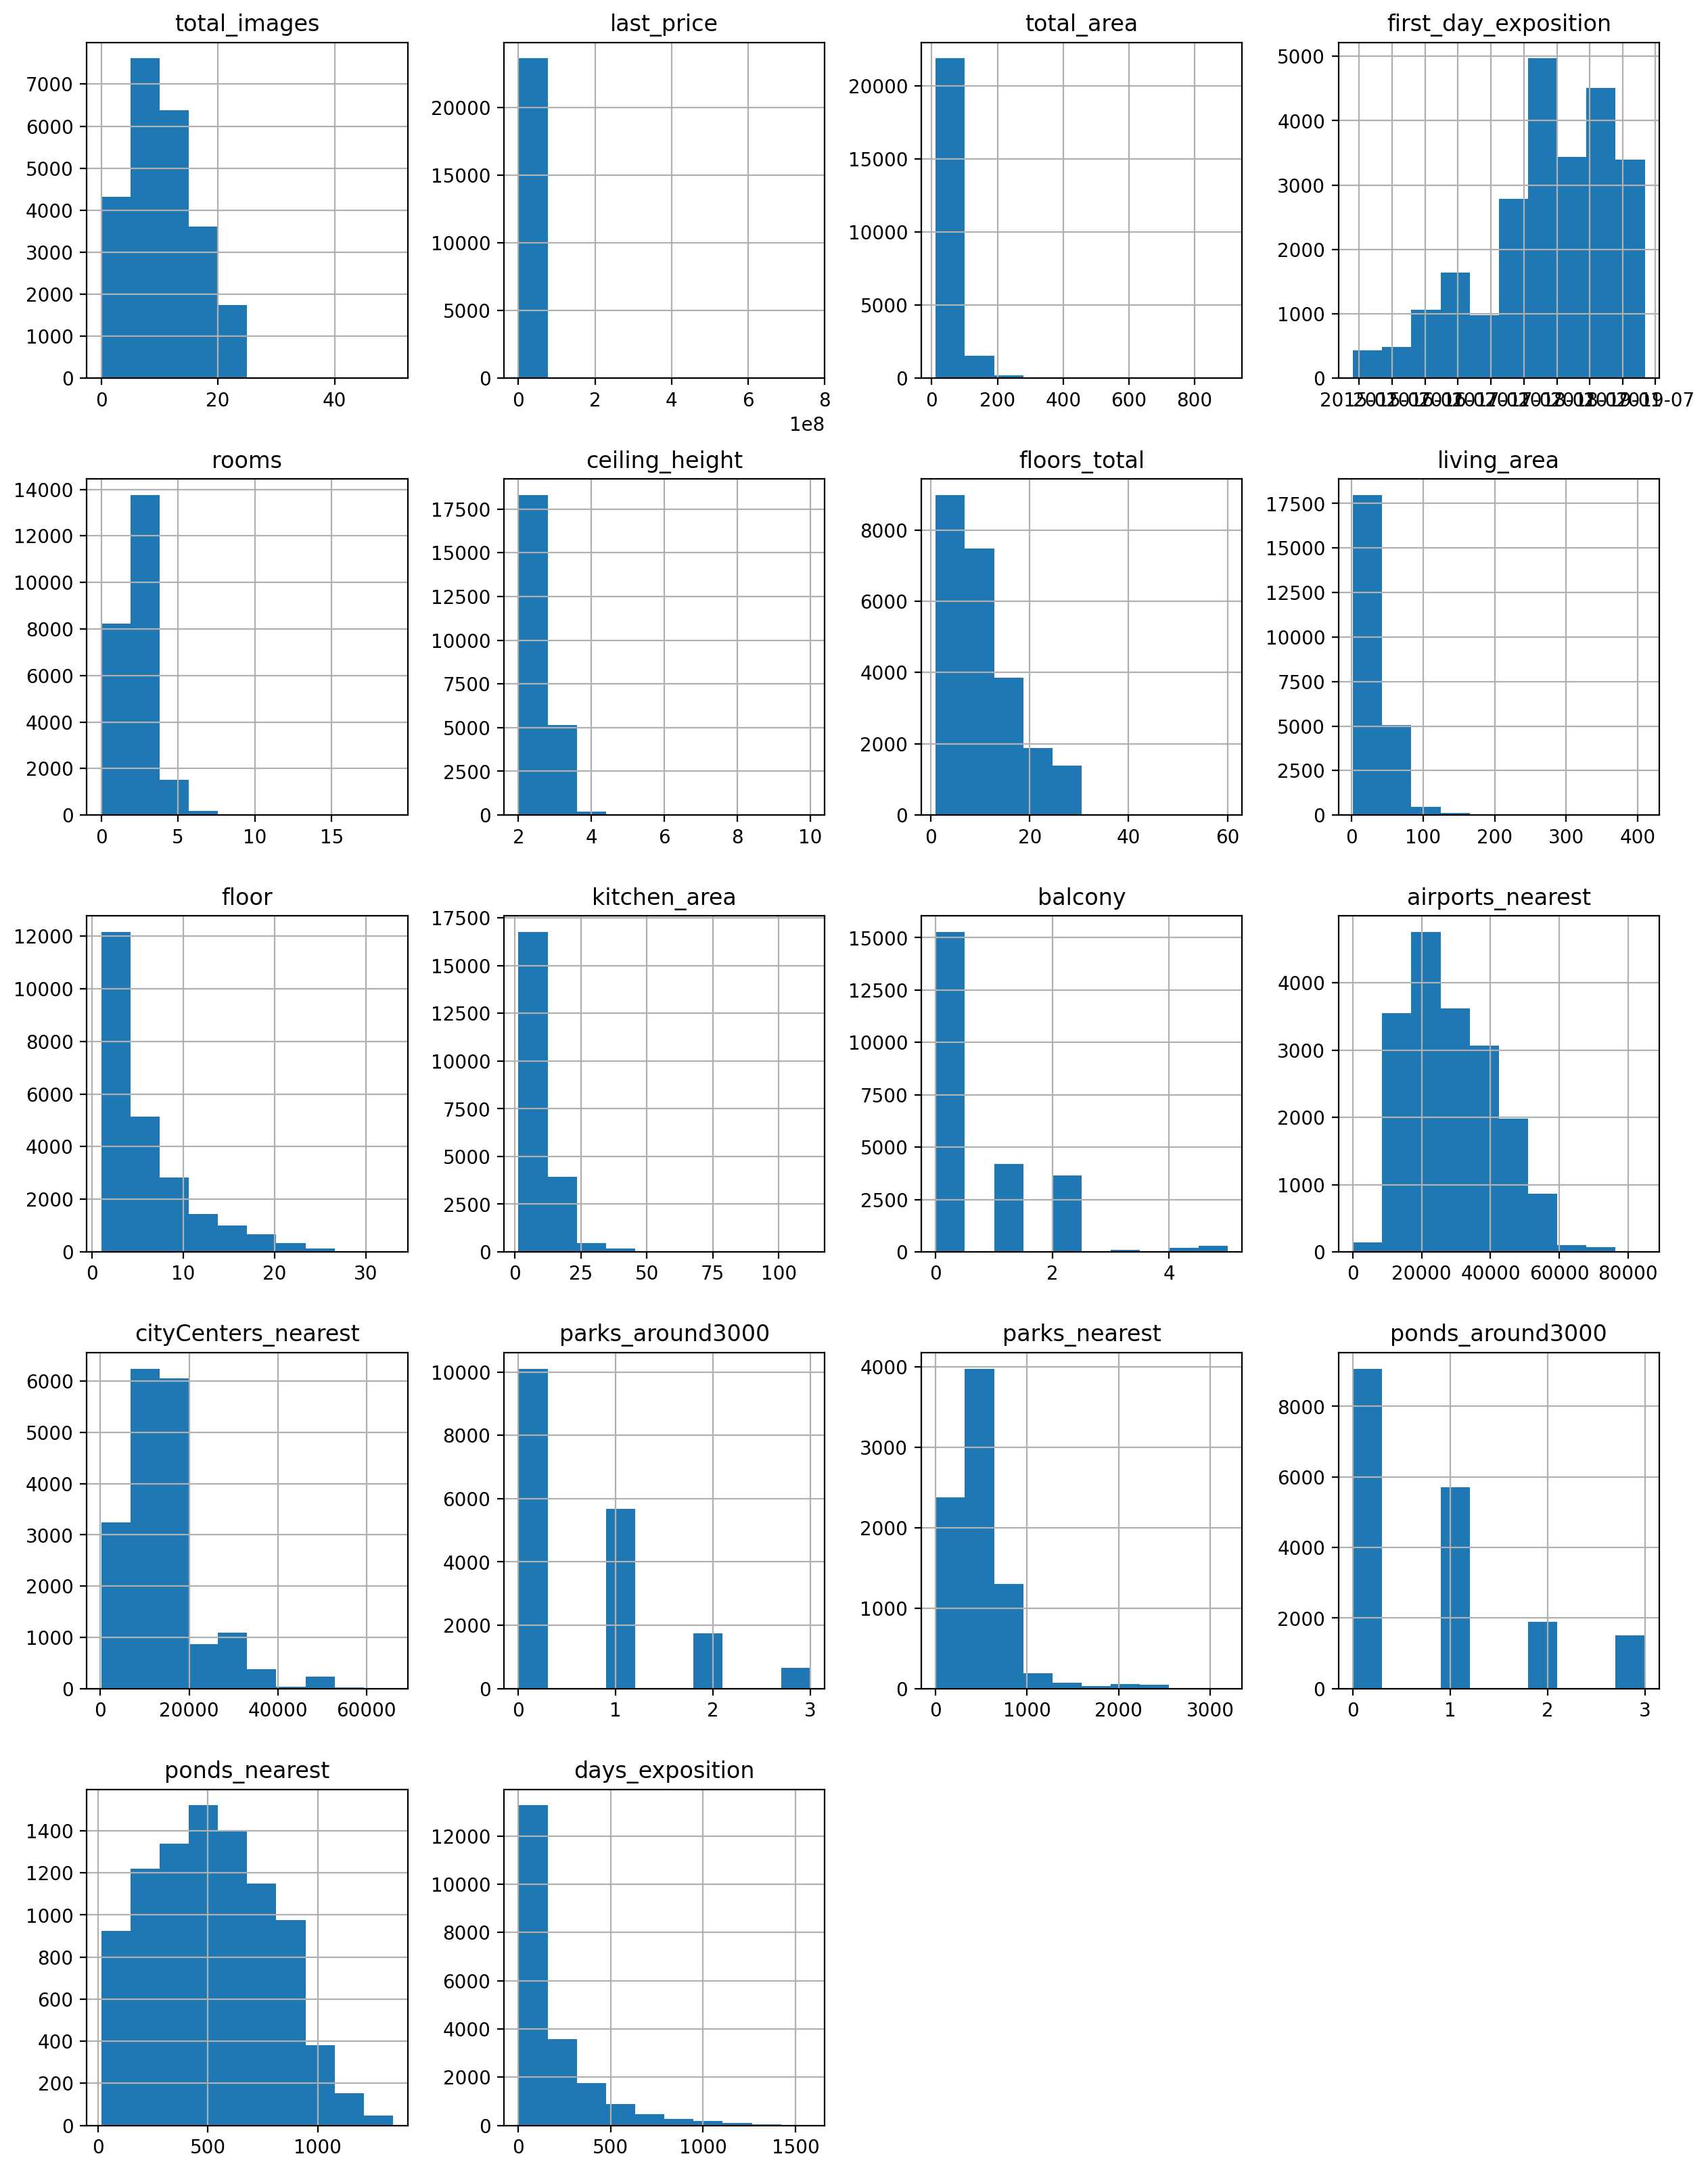

In [49]:
# Выведем еще раз гистограммы, чтобы поискать выбросы.

data.hist(figsize=(15, 20));

Обращают на себя внимание узкие столбцы 'last_price', 'total_area', 'living_area', 'kitchen_area'. Это может говорить о наличии выбросов.

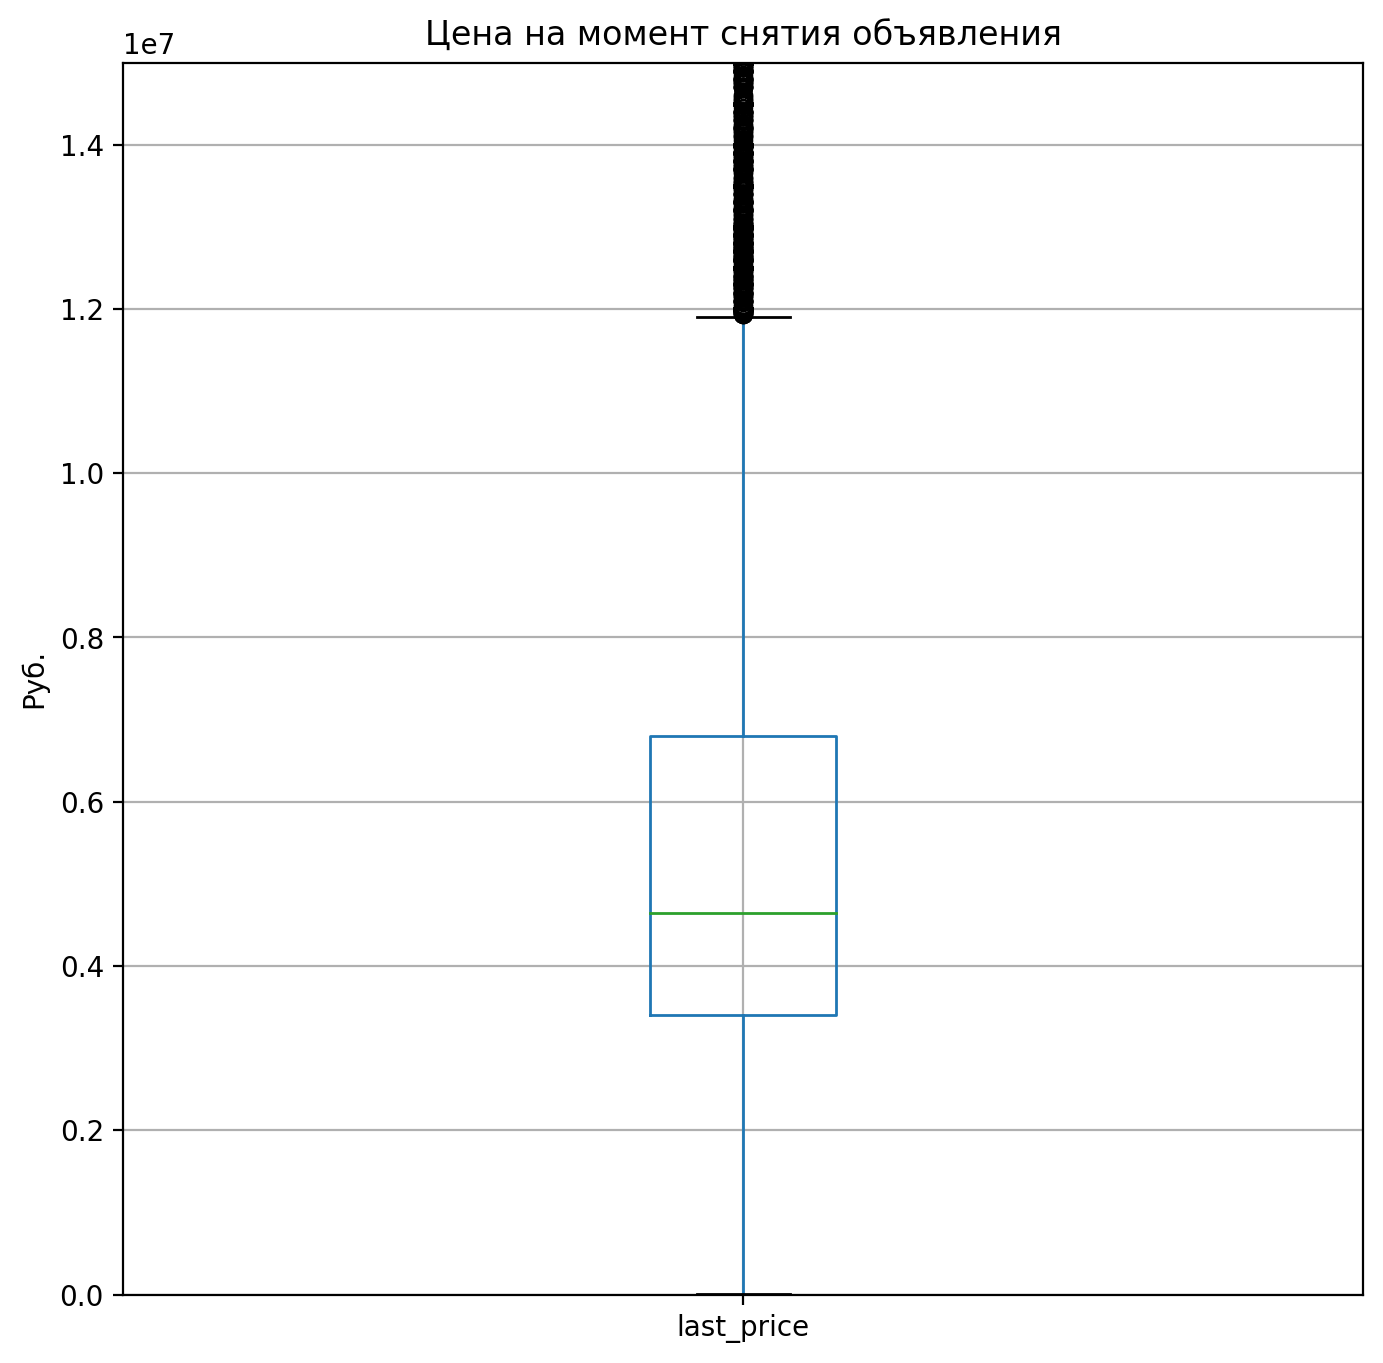

In [50]:
# Построим диаграмму размаха по столбцу 'last_price'.

ax = data.boxplot('last_price', figsize=(8, 8))
ax.set_ylim(0, 1.5e7)
ax.set(title = 'Цена на момент снятия объявления', ylabel = 'Руб.');

Основная масса значений цены до 12 млн., однако могут быть различия в цене квартиры в Санкт-Петербурге и за его пределами.

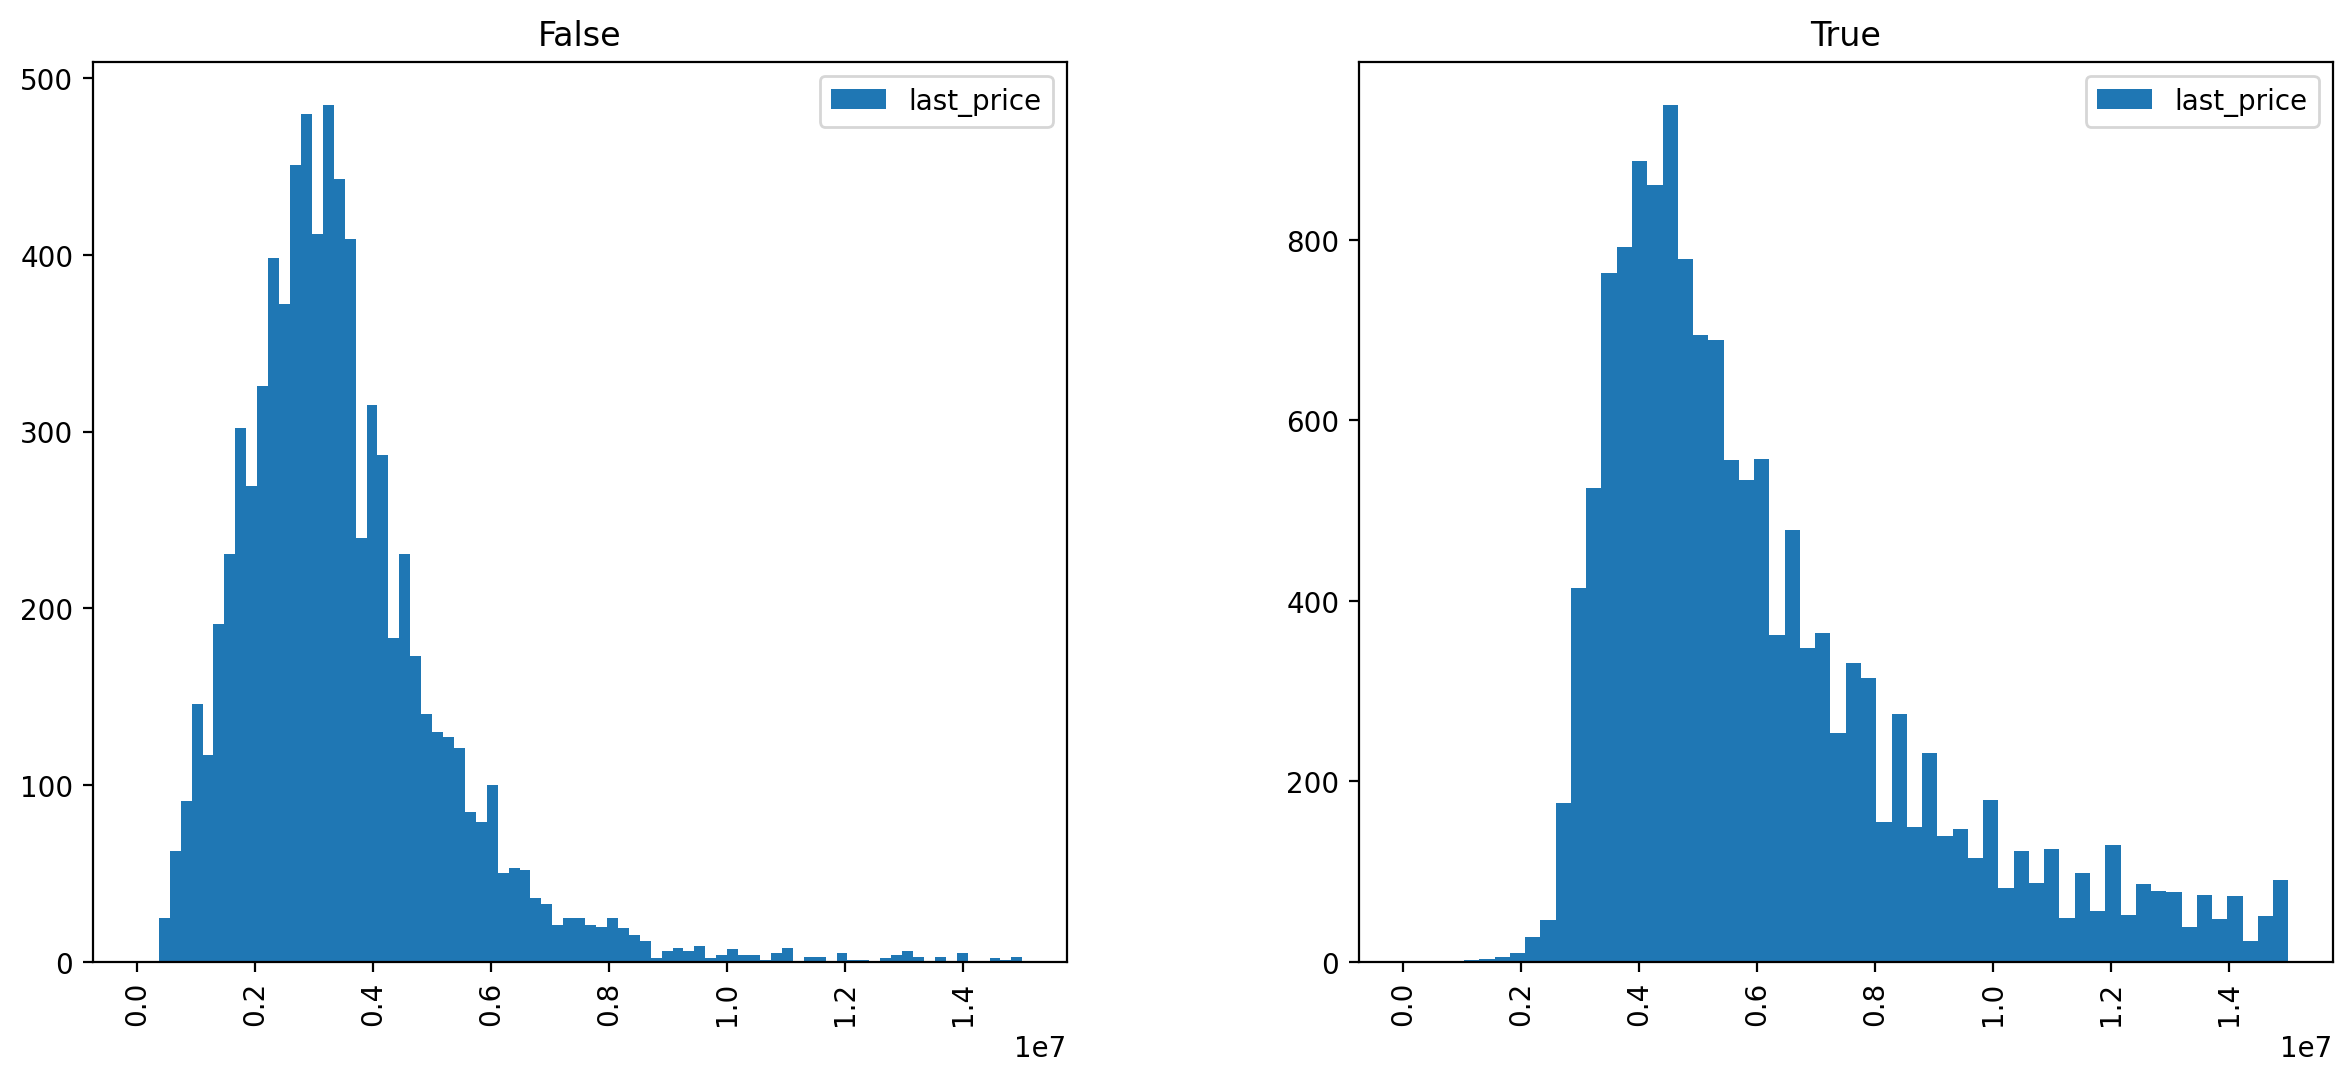

In [51]:
data['is_spb'] = (data['locality_name'] == 'Санкт-Петербург')
data.hist(column='last_price', by='is_spb', figsize=(14, 6), legend=True, range=(0, 1.5e7), bins='auto');

 В Санкт-Петербурге заметно больше значений больше 10 млн. и даже 15 млн. Большие значения формально являются выбросами, но это могут быть объекты элитной недвижимости и их реальная цена — удаление таких данных без консультаций со специалистом может исказить анализ рынка недвижимости в целом. Логичнее изучить цену квадратного метра на предмет аномальных значений.

In [52]:
# Создадим столбец с ценой квадратного метра.

data['meter_price'] = data['last_price'] / data['total_area']

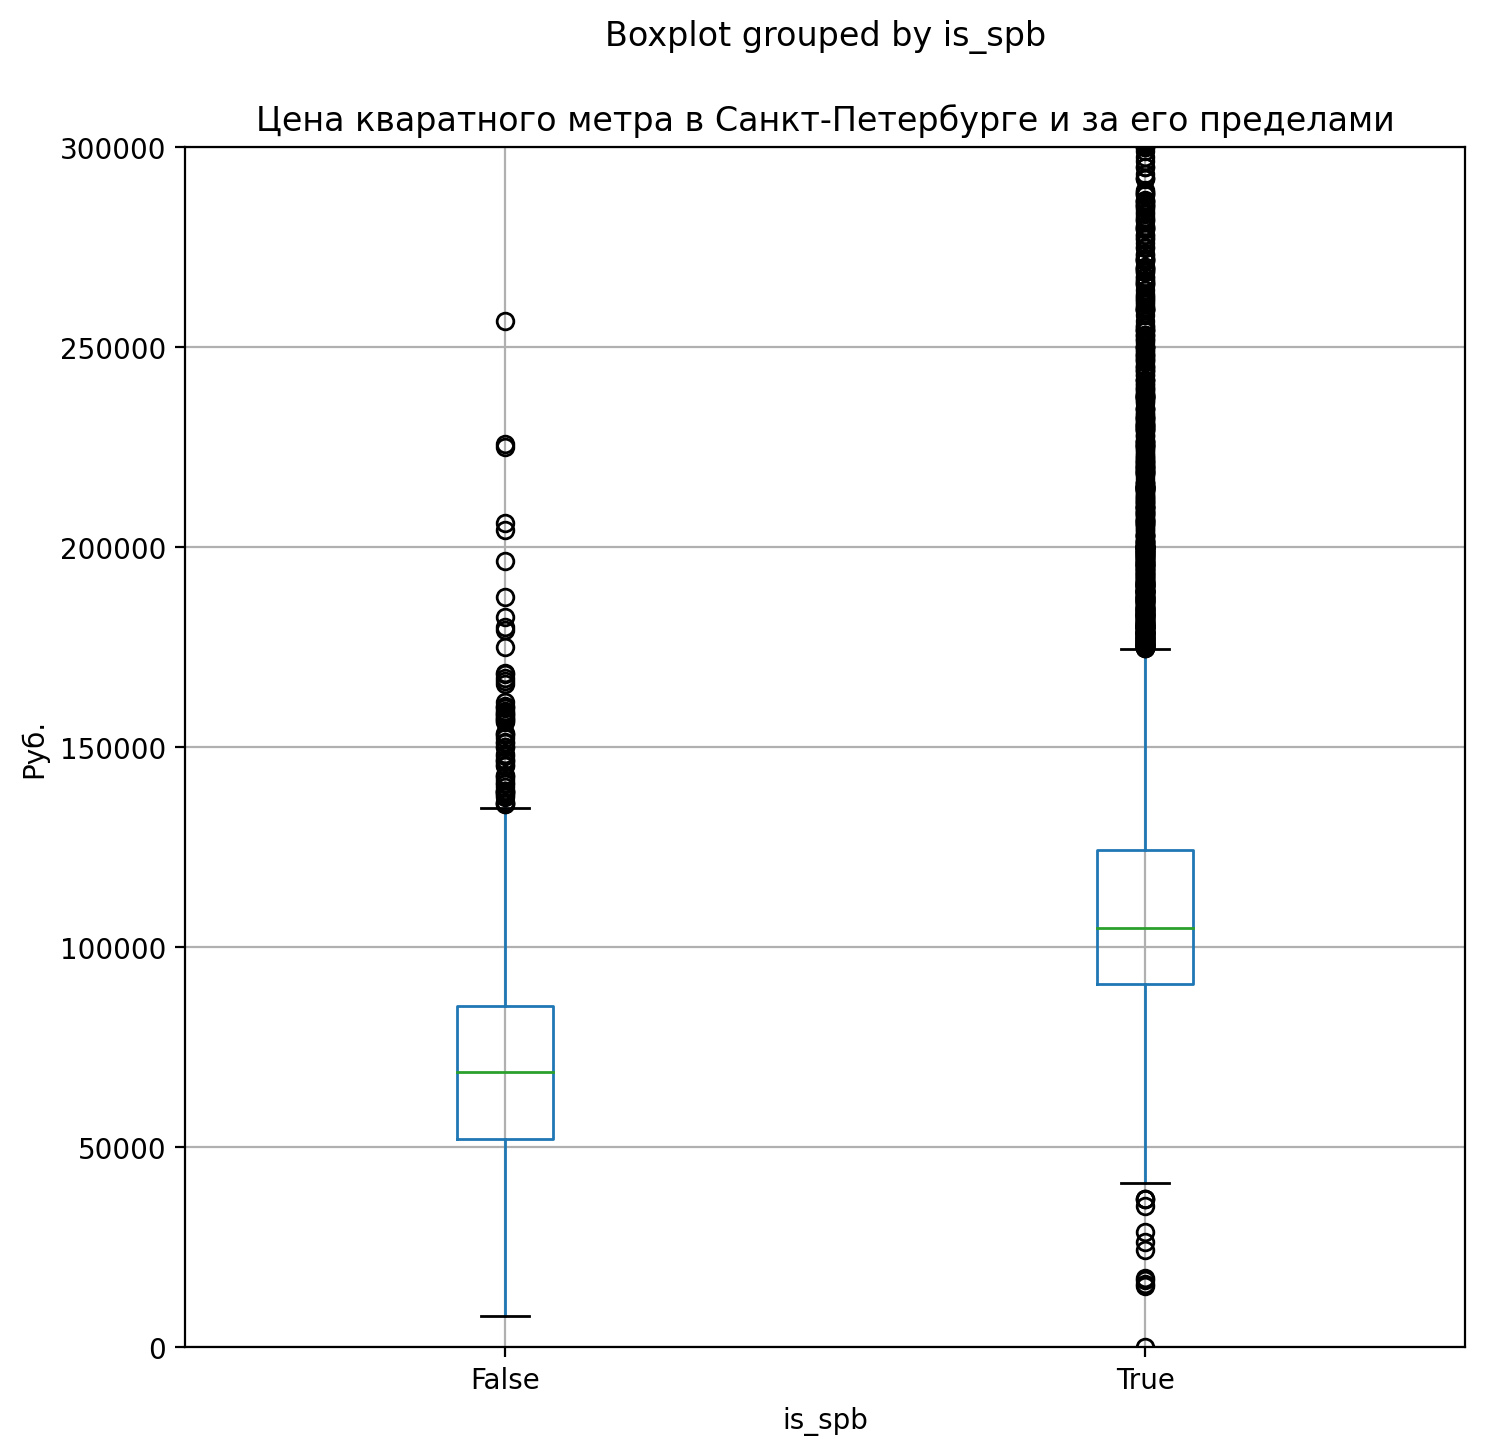

In [53]:
# Построим диаграмму размаха для цены квадратного метра в Санкт-Петербурге и за его пределами.

ax = data.boxplot('meter_price', figsize=(8, 8), by='is_spb')
ax.set_ylim(0, 0.3e6)
ax.set(title = 'Цена кваратного метра в Санкт-Петербурге и за его пределами', ylabel = 'Руб.');

Выбросы в большую сторону заметны и для объектов в Санкт-Петербурге, и за его пределами. А в меньшую сторону только в Санкт-Петербурге.

Без обсуждения со специалистом стожно решить, но можем поставить верхнюю границу "номарльной" цены для объектов за пределмаи Санкт-Петребурга в 175 тыс. руб., а для Санкт-Петребурга в 225 тыс. руб. Дополнительно для Санкт-Петербурга необходимо установить нижнюю границу в 25 тыс. руб.

In [54]:
# Удалим строки со стоимостью за "нормальными" границами для объектов вне Санкт-Петербурга.

data = data[~((data['meter_price'] > 175000) & (data['is_spb'] == False))]

In [55]:
# Удалим строки со стоимостью за "нормальными" границами для объектов в Санкт-Петербурге.

data = data[~((data['meter_price'] > 225000) & (data['is_spb'] == True))]
data = data[~((data['meter_price'] < 25000) & (data['is_spb'] == True))]

In [56]:
# Проверим, нет ли явно ошибочных данных, когда площадь кухни или жилая площадь больше общей площади.

data.loc[(data['kitchen_area'] > data['total_area']) | (data['living_area'] > data['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,is_spb,meter_price


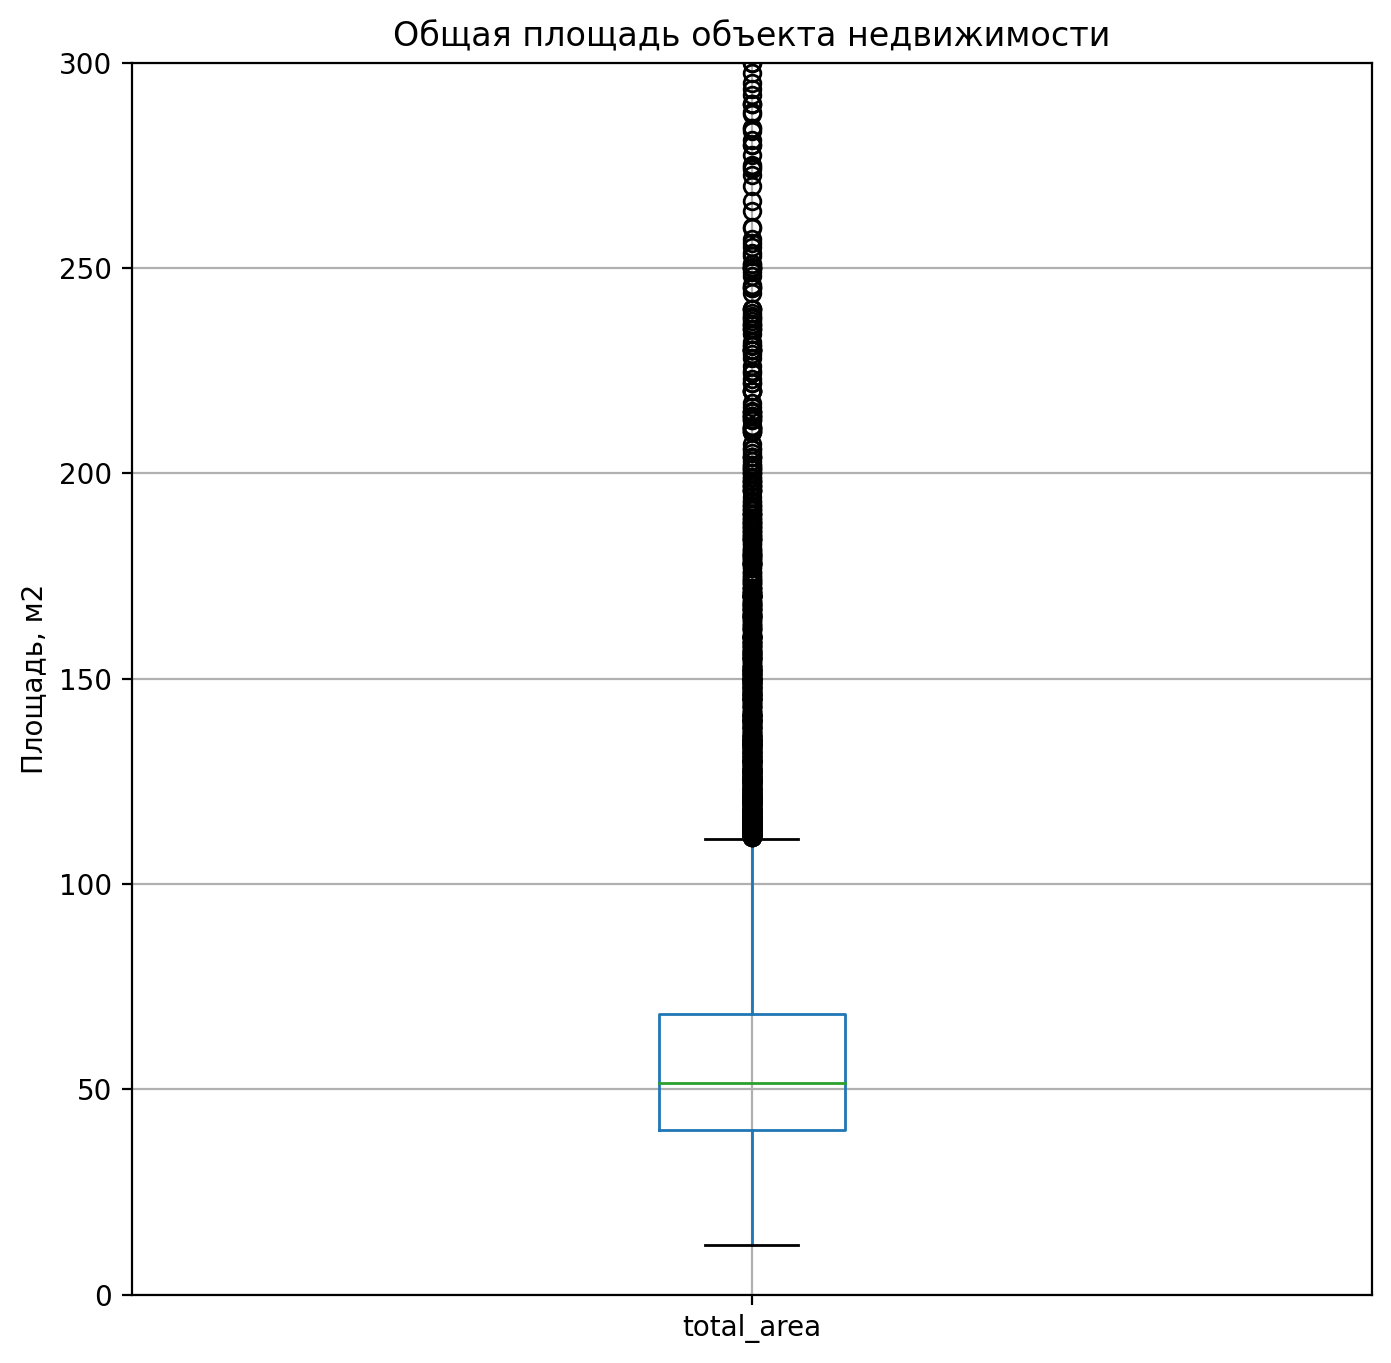

In [57]:
# Построим диаграмму размаха для значений общей площади.

ax = data.boxplot('total_area', figsize=(8, 8))
ax.set_ylim(0, 300)
ax.set(title = 'Общая площадь объекта недвижимости', ylabel = 'Площадь, м2');

Формально, площади более 150 кв. м. можно считать выбросами, но очевидно, что объекты польщадью более 150 кв. м. точно существуют. 

In [58]:
# Посмотрим медианное соотношение общей и жилой площадей

(data['total_area'] / data['living_area']).median()

1.7609977447984868

In [59]:
# Удалим объекты с чрезмерно большой площадью, где жилая площадь больше, чем в 2 раза меньше общей.

data = data[~((data['total_area'] > 150) & ((data['total_area'] / data['living_area']) > 2))]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23231 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23231 non-null  int64         
 1   last_price            23231 non-null  float64       
 2   total_area            23231 non-null  float64       
 3   first_day_exposition  23231 non-null  datetime64[ns]
 4   rooms                 23231 non-null  int64         
 5   ceiling_height        23231 non-null  float64       
 6   floors_total          23146 non-null  float64       
 7   living_area           23231 non-null  float64       
 8   floor                 23231 non-null  int64         
 9   is_apartment          23231 non-null  bool          
 10  studio                23231 non-null  bool          
 11  open_plan             23231 non-null  bool          
 12  kitchen_area          21005 non-null  float64       
 13  balcony         

In [61]:
# Посмотрим, "сколькикомнатные" есть объекты и сколько их.

data.pivot_table(index='rooms', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False)

,last_price
rooms,
1,8010
2,7848
3,5652
4,1077
5,280
0,196
6,91
7,52
8,8


In [62]:
# Посмотрим, объекты с числом комнат более 10.

data[data['rooms']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,is_spb,meter_price
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,True,95264.017420
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург,True,68870.523416
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург,True,110169.491525
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,Санкт-Петербург,True,170015.455951
14498,6,32250000.0,374.6,2018-06-09,19,2.55,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Санкт-Петербург,True,86091.831287
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,Санкт-Петербург,True,105555.555556
20829,6,28659000.0,245.4,2016-03-31,14,3.00,4.0,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,Санкт-Петербург,True,116784.841076


In [63]:
# Посмотрим медианное значение площади одной комнаты.

(data['living_area'] / data['rooms']).median()

16.0

In [64]:
# Посмотрим площади комнат в объектам с числом комнат более 10.

data.loc[data['rooms']>10, 'living_area'] / data.loc[data['rooms']>10, 'rooms']

648      12.618182
866      15.857143
5358     27.266667
9688     11.727273
14498    13.921053
18848    11.250000
20829    12.021429
dtype: float64

In [65]:
# Хотел удалить объекты с большим числом комнат и их площадью менее 13 кв. м.,
# но обнаружил, что объектов с площадью комнат менее 13 почти 2000.

data.loc[(data['living_area'] / data['rooms']) < 13]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,is_spb,meter_price
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,False,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,False,99195.710456
26,6,4050000.0,60.0,2017-04-28,4,2.55,5.0,43.0,4,False,False,False,7.0,0,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0,Санкт-Петербург,True,67500.000000
33,8,4800000.0,73.0,2018-10-15,4,2.55,9.0,51.6,5,False,False,False,6.5,0,Колпино,26535.0,32321.0,0.0,NaN,0.0,NaN,92.0,Колпино,False,65753.424658
75,19,4950000.0,44.0,2018-02-27,2,2.70,23.0,21.0,19,False,False,False,15.0,2,Санкт-Петербург,15749.0,14545.0,0.0,NaN,0.0,NaN,36.0,Санкт-Петербург,True,112500.000000
76,12,2800000.0,55.1,2016-05-14,3,2.60,5.0,38.4,1,False,False,False,4.9,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0,Кировск,False,50816.696915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23673,9,3100000.0,23.0,2018-03-19,1,2.80,9.0,12.6,1,False,False,False,5.0,2,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0,Санкт-Петербург,True,134782.608696
23674,10,5950000.0,56.0,2019-03-05,3,2.80,8.0,32.1,3,False,False,False,8.5,0,Санкт-Петербург,32139.0,9217.0,0.0,NaN,2.0,303.0,NaN,Санкт-Петербург,True,106250.000000
23683,16,2100000.0,62.8,2018-09-18,4,2.50,5.0,45.5,3,False,False,False,5.5,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Дзержинского,False,33439.490446
23695,14,3100000.0,59.0,2018-01-15,3,2.55,5.0,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно,False,52542.372881


In [66]:
# Удалим объекты с числом комнат более 7.
data = data.loc[~(data['rooms'] > 7)]

### Добавление в таблицу новых столбцов

#### Цена одного квадратного метра

In [67]:
# Столбец с ценой за квадратный метр ('meter_price') был добавлен на этапе предобработки.

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,is_spb,meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,True,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.600000,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,False,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,True,92785.714286
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,True,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,False,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.600000,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,False,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,40.658769,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,True,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,False,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,True,88524.590164
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.300000,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,Санкт-Петербург,True,127525.252525


#### День недели публикации объявления

In [68]:
# Добавим столбец с номером дня недели публикации объявления.

data['weekday'] = data['first_day_exposition'].dt.dayofweek

#### Месяц публикации объявления

In [69]:
# Добавим столбец с номером месяца публикации объявления.

data['month'] = data.loc[0:, 'first_day_exposition'].dt.month

#### Год публикации объявления

In [70]:
# Добавим столбец с годом публикации объявления.

data['year'] = data.loc[0:, 'first_day_exposition'].dt.year

#### Тип этажа квартиры

In [71]:
# Добавим в столбец с типом этажа 'первый' для квартир на первом этаже,
#'последний' для квартир на последнем этаже, для остальный 'другой'.

data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_type'] = 'другой'


In [72]:
# Добавим в столбец с расстоянием до центра в километрах, округленным до целого.

data['city_centers_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

### Исследовательский анализ данных

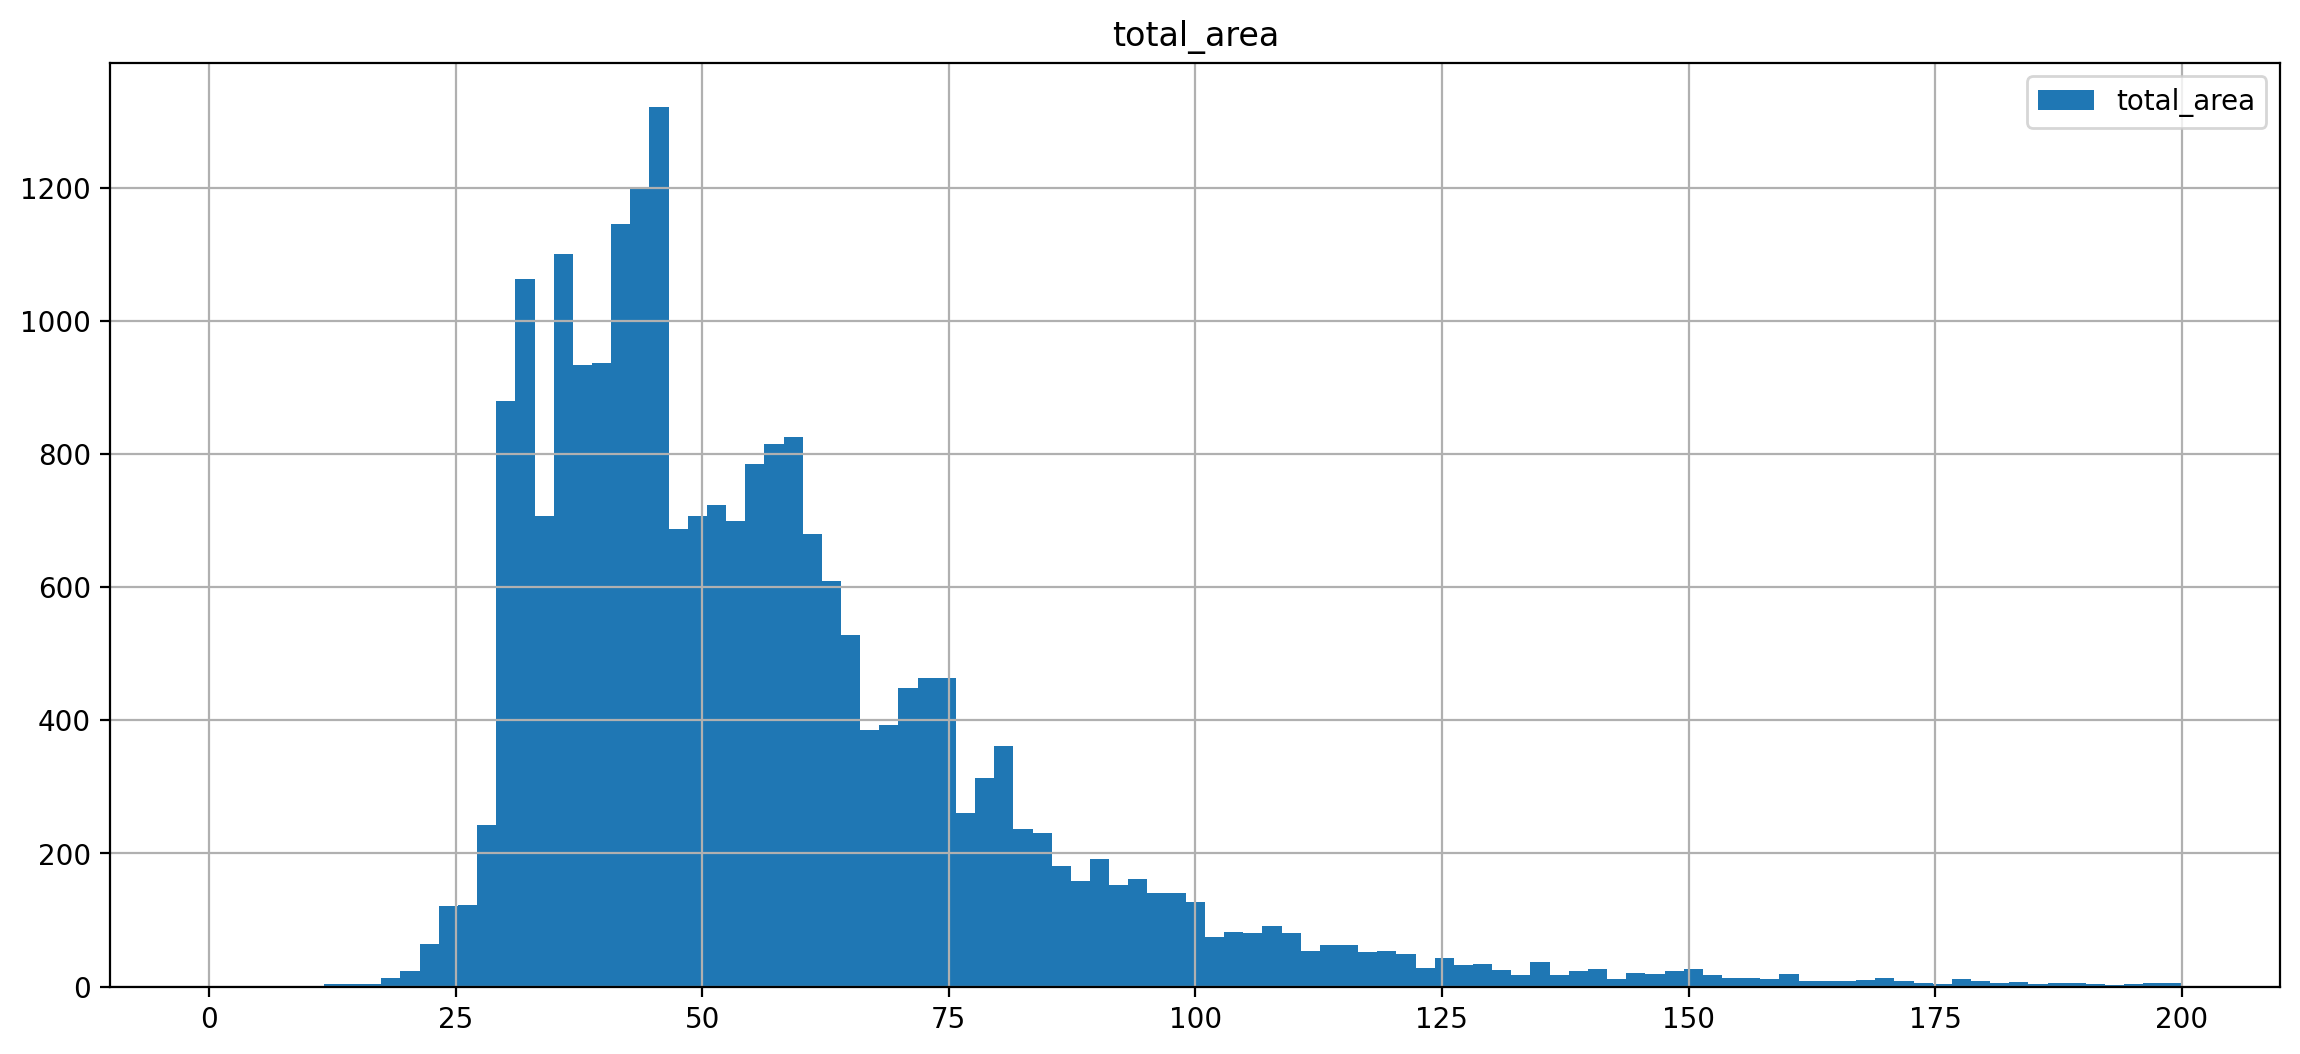

In [73]:
# Построим гистограмму по данным столбца 'total_area'.

ax = data.hist(column='total_area', figsize=(14, 6), legend=True, range=(0, 200), bins='auto');

На гистограмме видны несколько пиков. В данном случае, скорее всего, это не ошибка в данных, а площади квартир с разным числом комнат. Больше всего квартир площадью 40-50 кв. м. Вероятно, ими могут быть как одно, так и двухкомнатные квартиры. Пик около 30 кв. м. — студии, 60 кв. м. — трехкомнатные, около 75 кв. м. — четырехкомнатные.

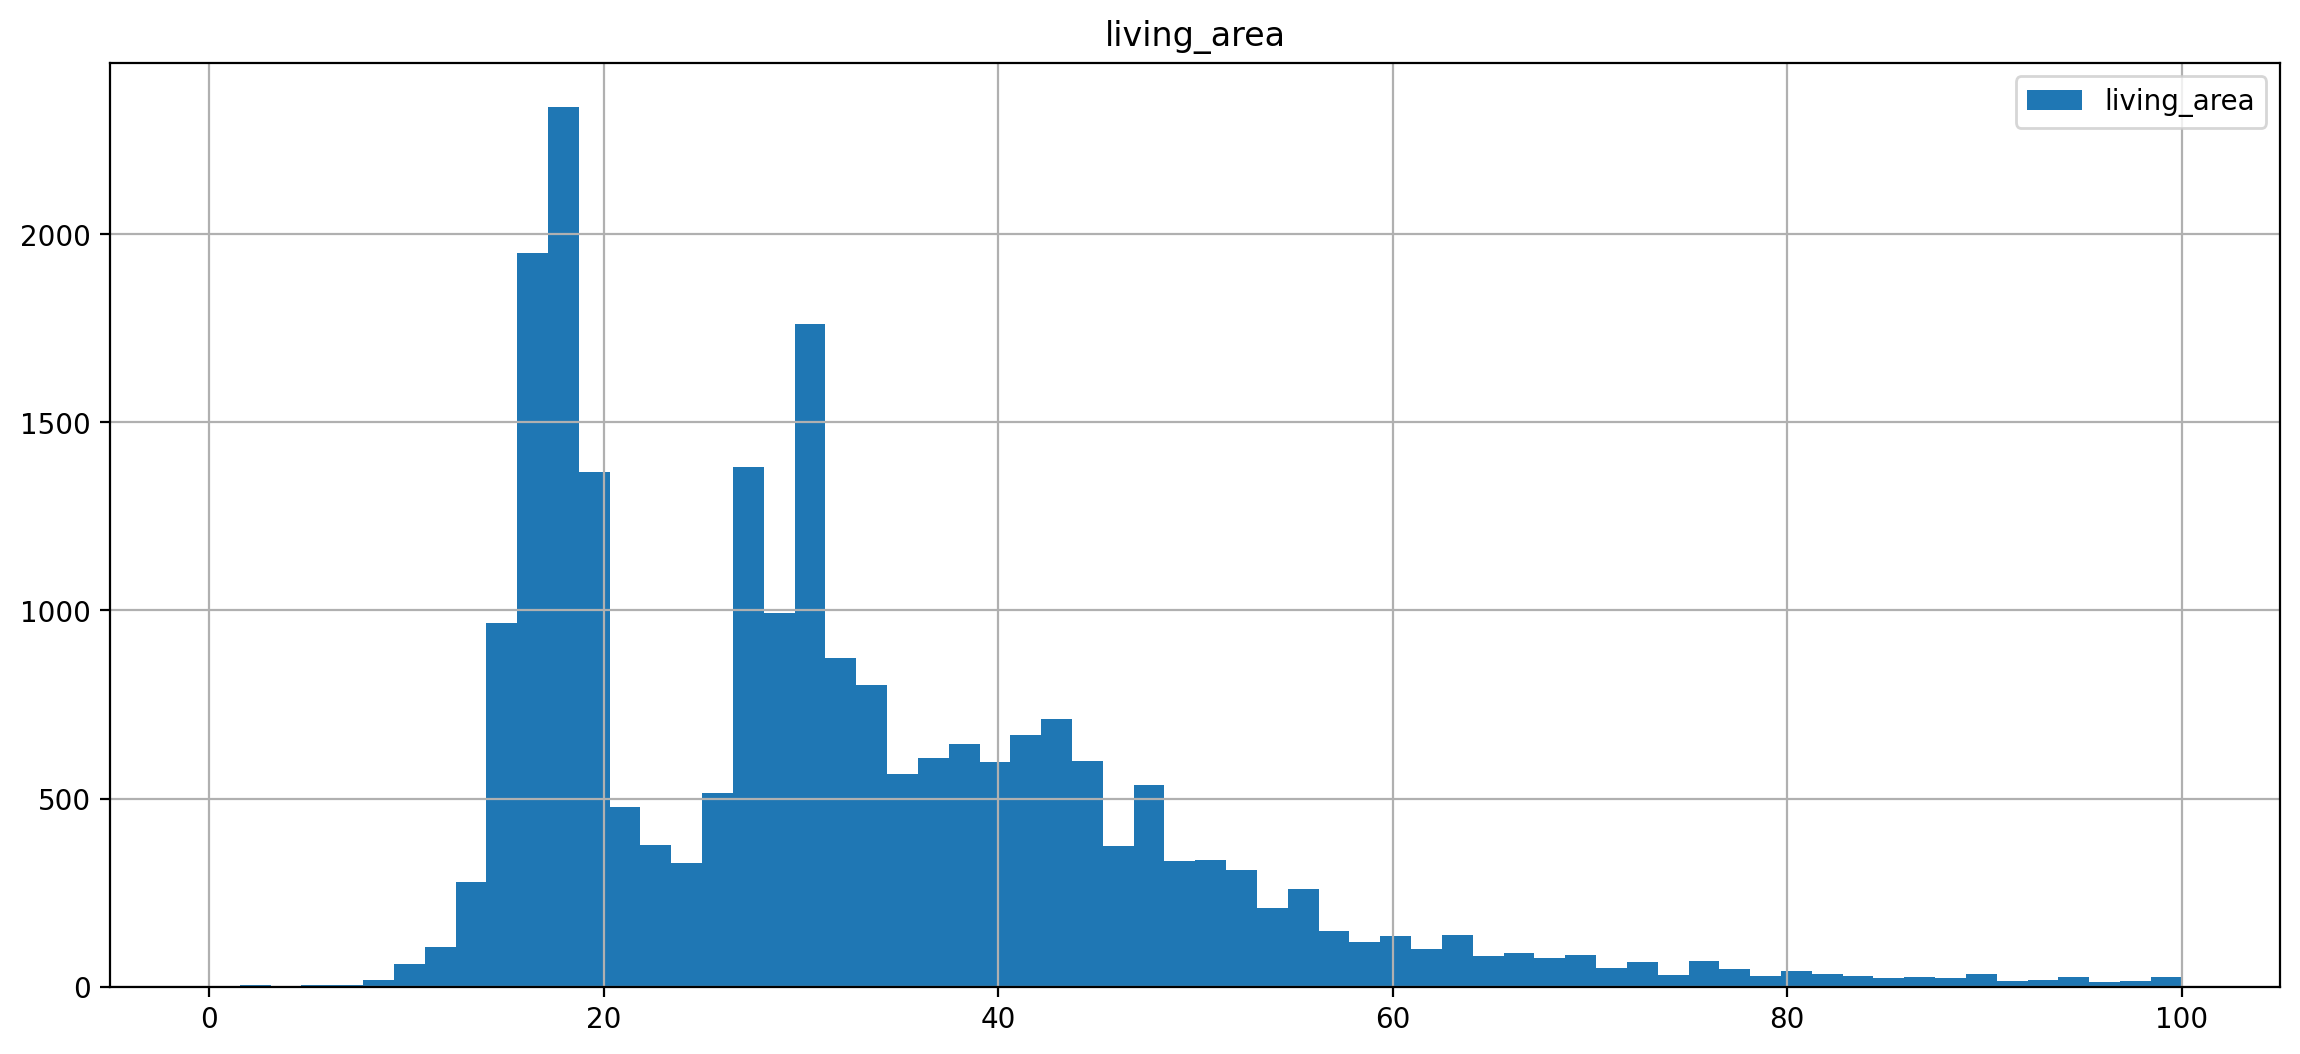

In [74]:
# Построим гистограмму по данным столбца 'living_area'.

data.hist(column='living_area', figsize=(14, 6), legend=True, range=(0, 100), bins='auto');

На гистограмме по данным жилой площади объектов также несколько пиков. Около 18-20 кв. м. — видимо, студии и однокомнатные квартиры, около 30 кв. м. — двухкомнатные.

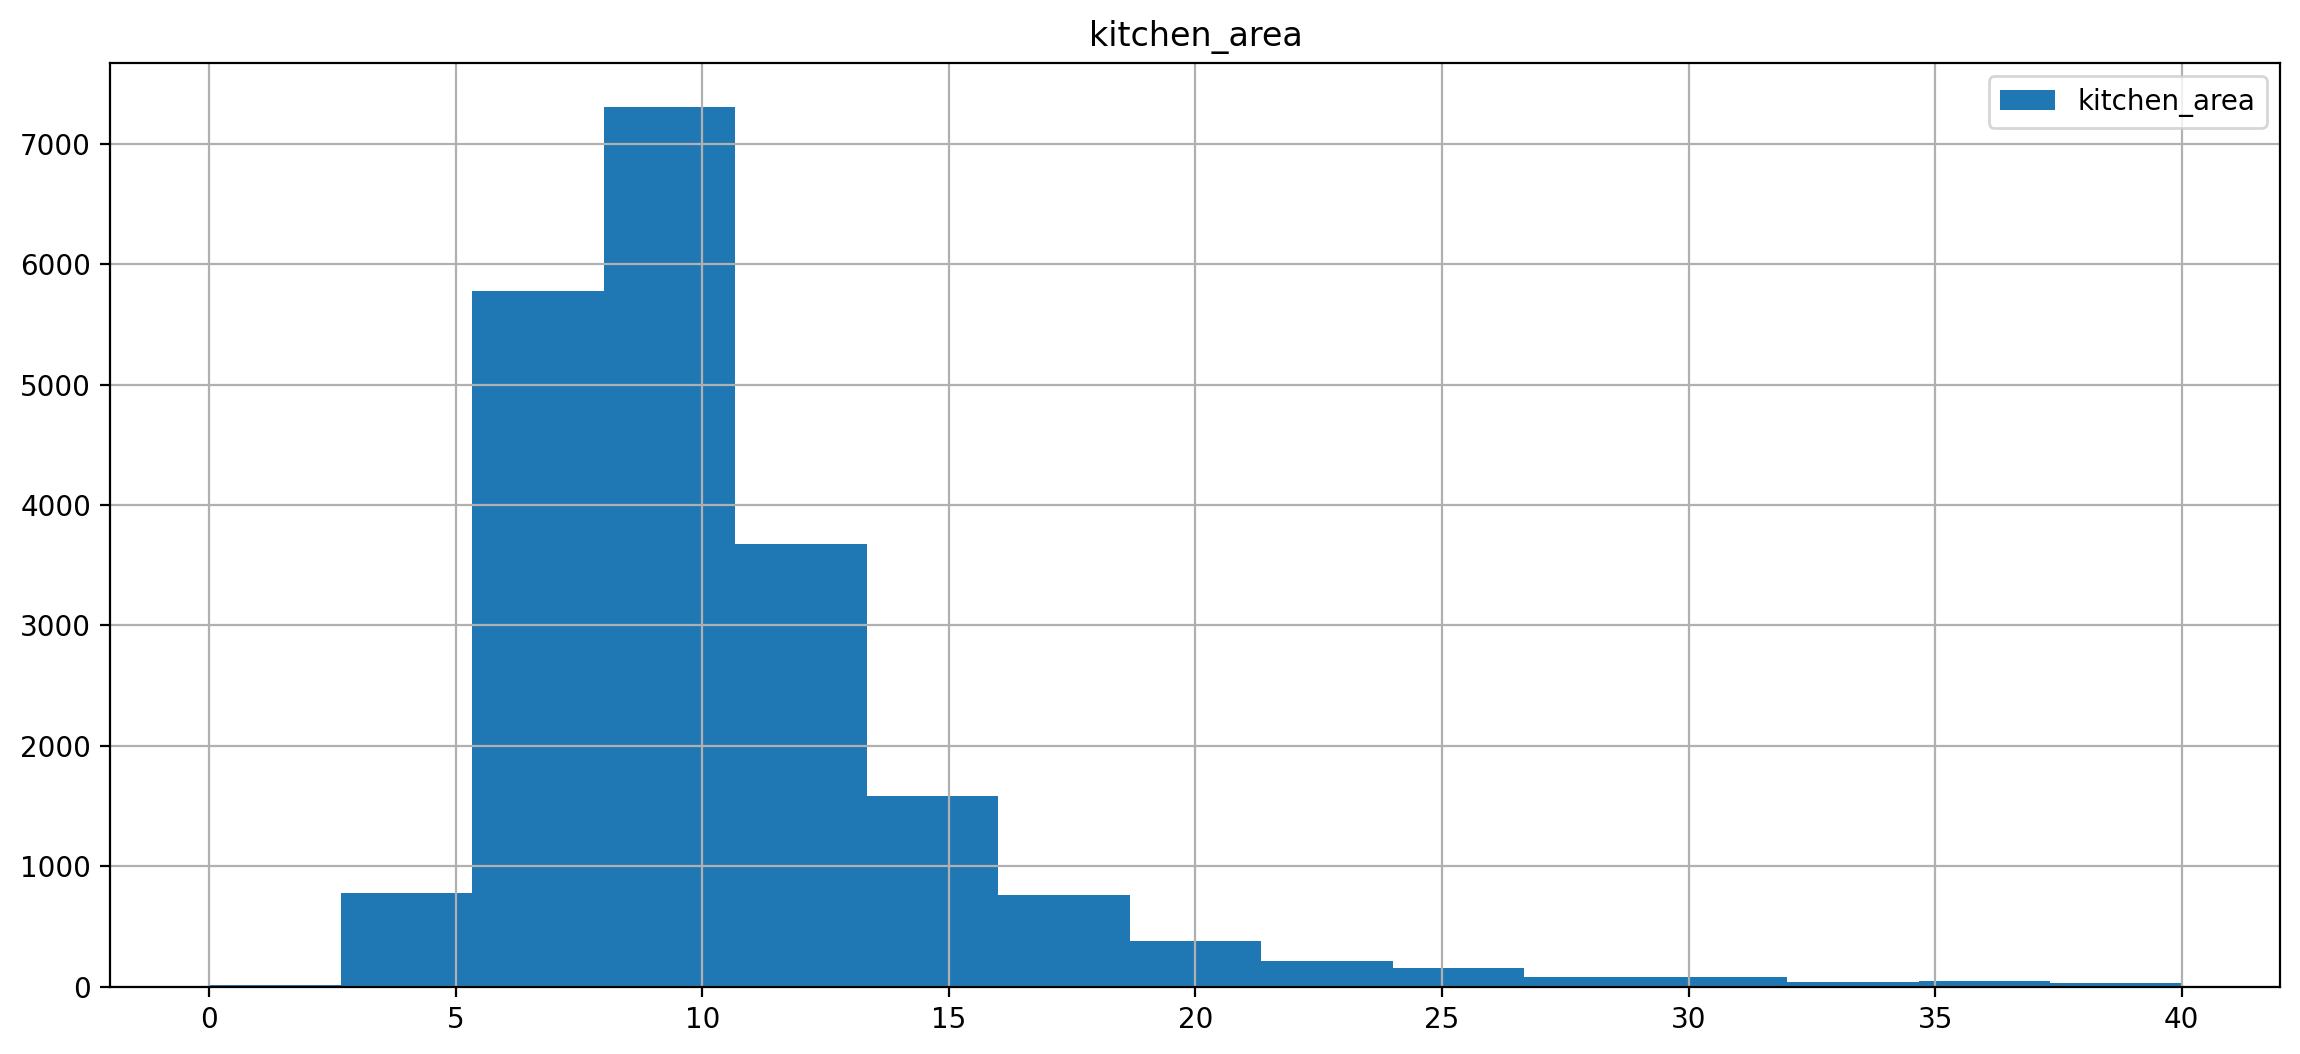

In [75]:
# Построим гистограмму по данным столбца 'kitchen_area'.

data.hist(column='kitchen_area', figsize=(14, 6), range=(0, 40), legend=True, bins=15);

В большинстве объектов кухни относительно небольшой площади примерно 10 кв. м.

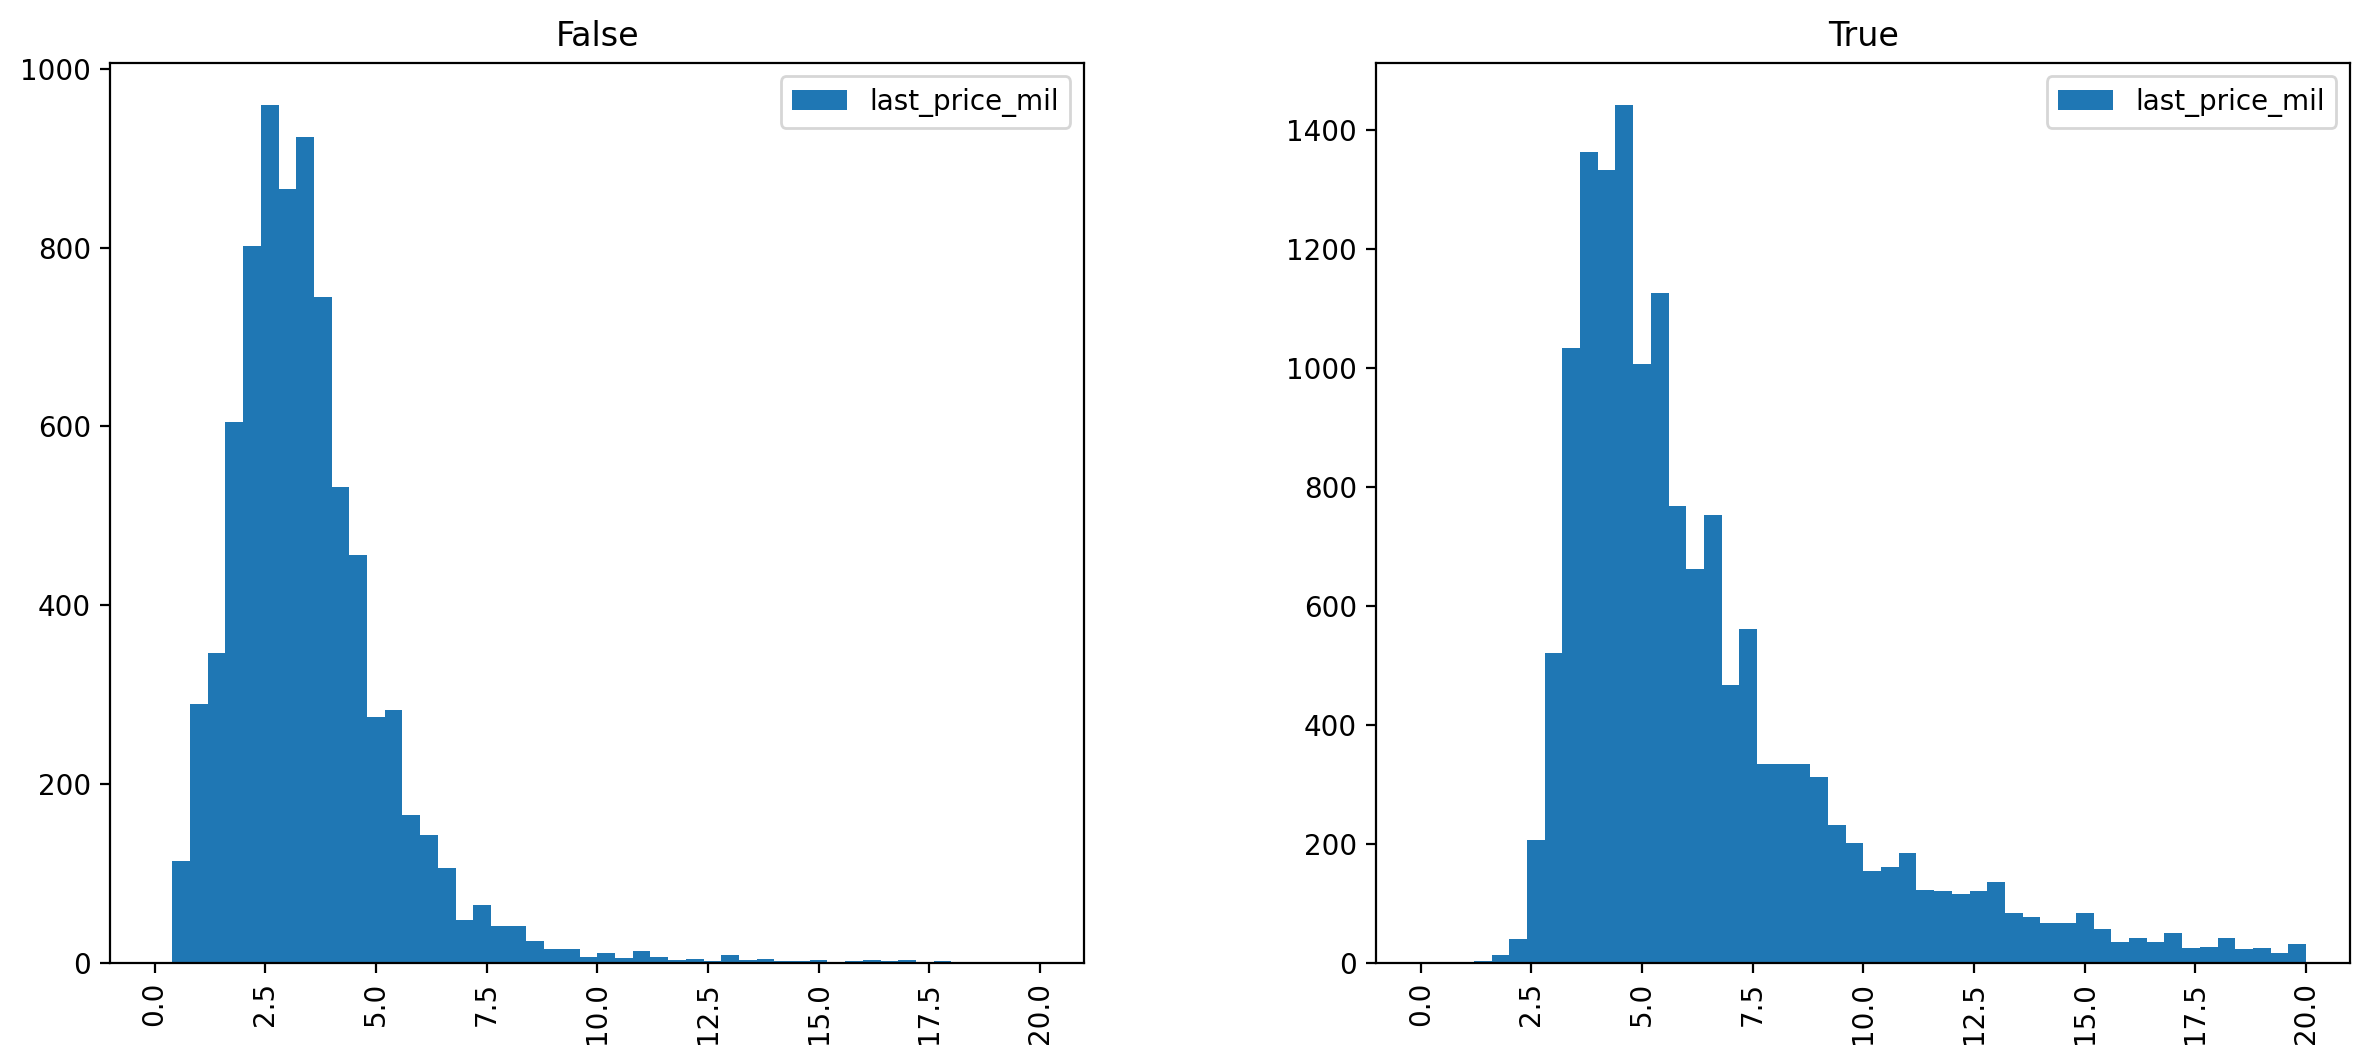

In [76]:
# Добавим столбец со стоимостью в миллионах рублей и по нему построим графики.
# Построим гистограмму по данным столбца 'last_price' для объектов в Санкт-Петербурге и за его пределами.

data['last_price_mil'] = data['last_price'] / 1000000
data.hist(column='last_price_mil', figsize=(14, 6), by='is_spb', legend=True, range=(0, 20), bins=50);


Стоимость объектов логично рассматривать отдельно для Санкт-Петербурга и отдельно за его пределами. Видно, что в городе наибольшее число объектов стоит около 5 млн. рублей, в области — около 3-4 млн. рублей.

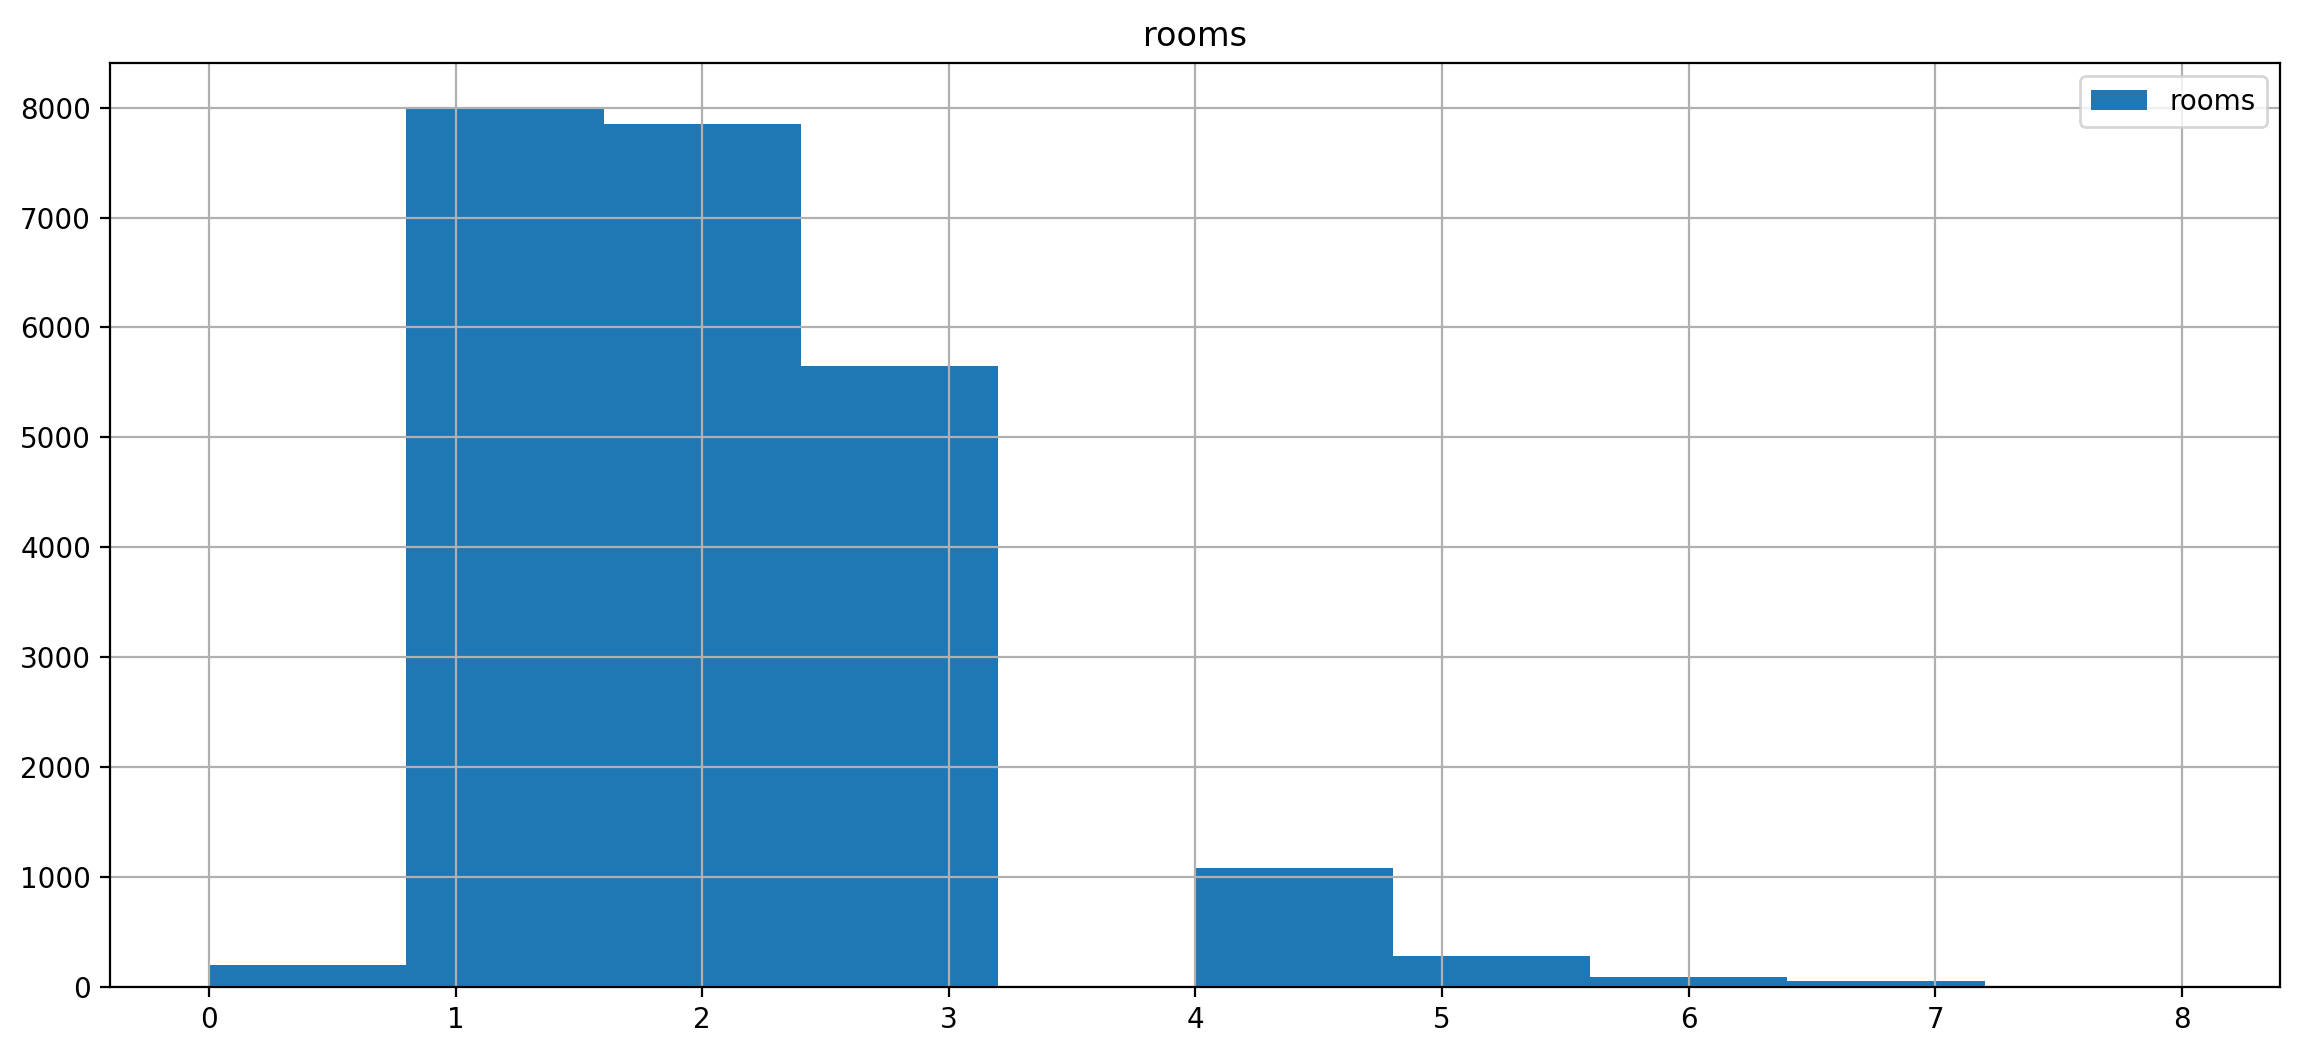

In [77]:
# Построим гистограмму по данным столбца 'rooms'.

data.hist(column='rooms', figsize=(14, 6), legend=True, range=(0, 8), bins=10);

На гистограмме видно, что большинство объектов одно- и двухкомлантные, также много трехконатных квартир.

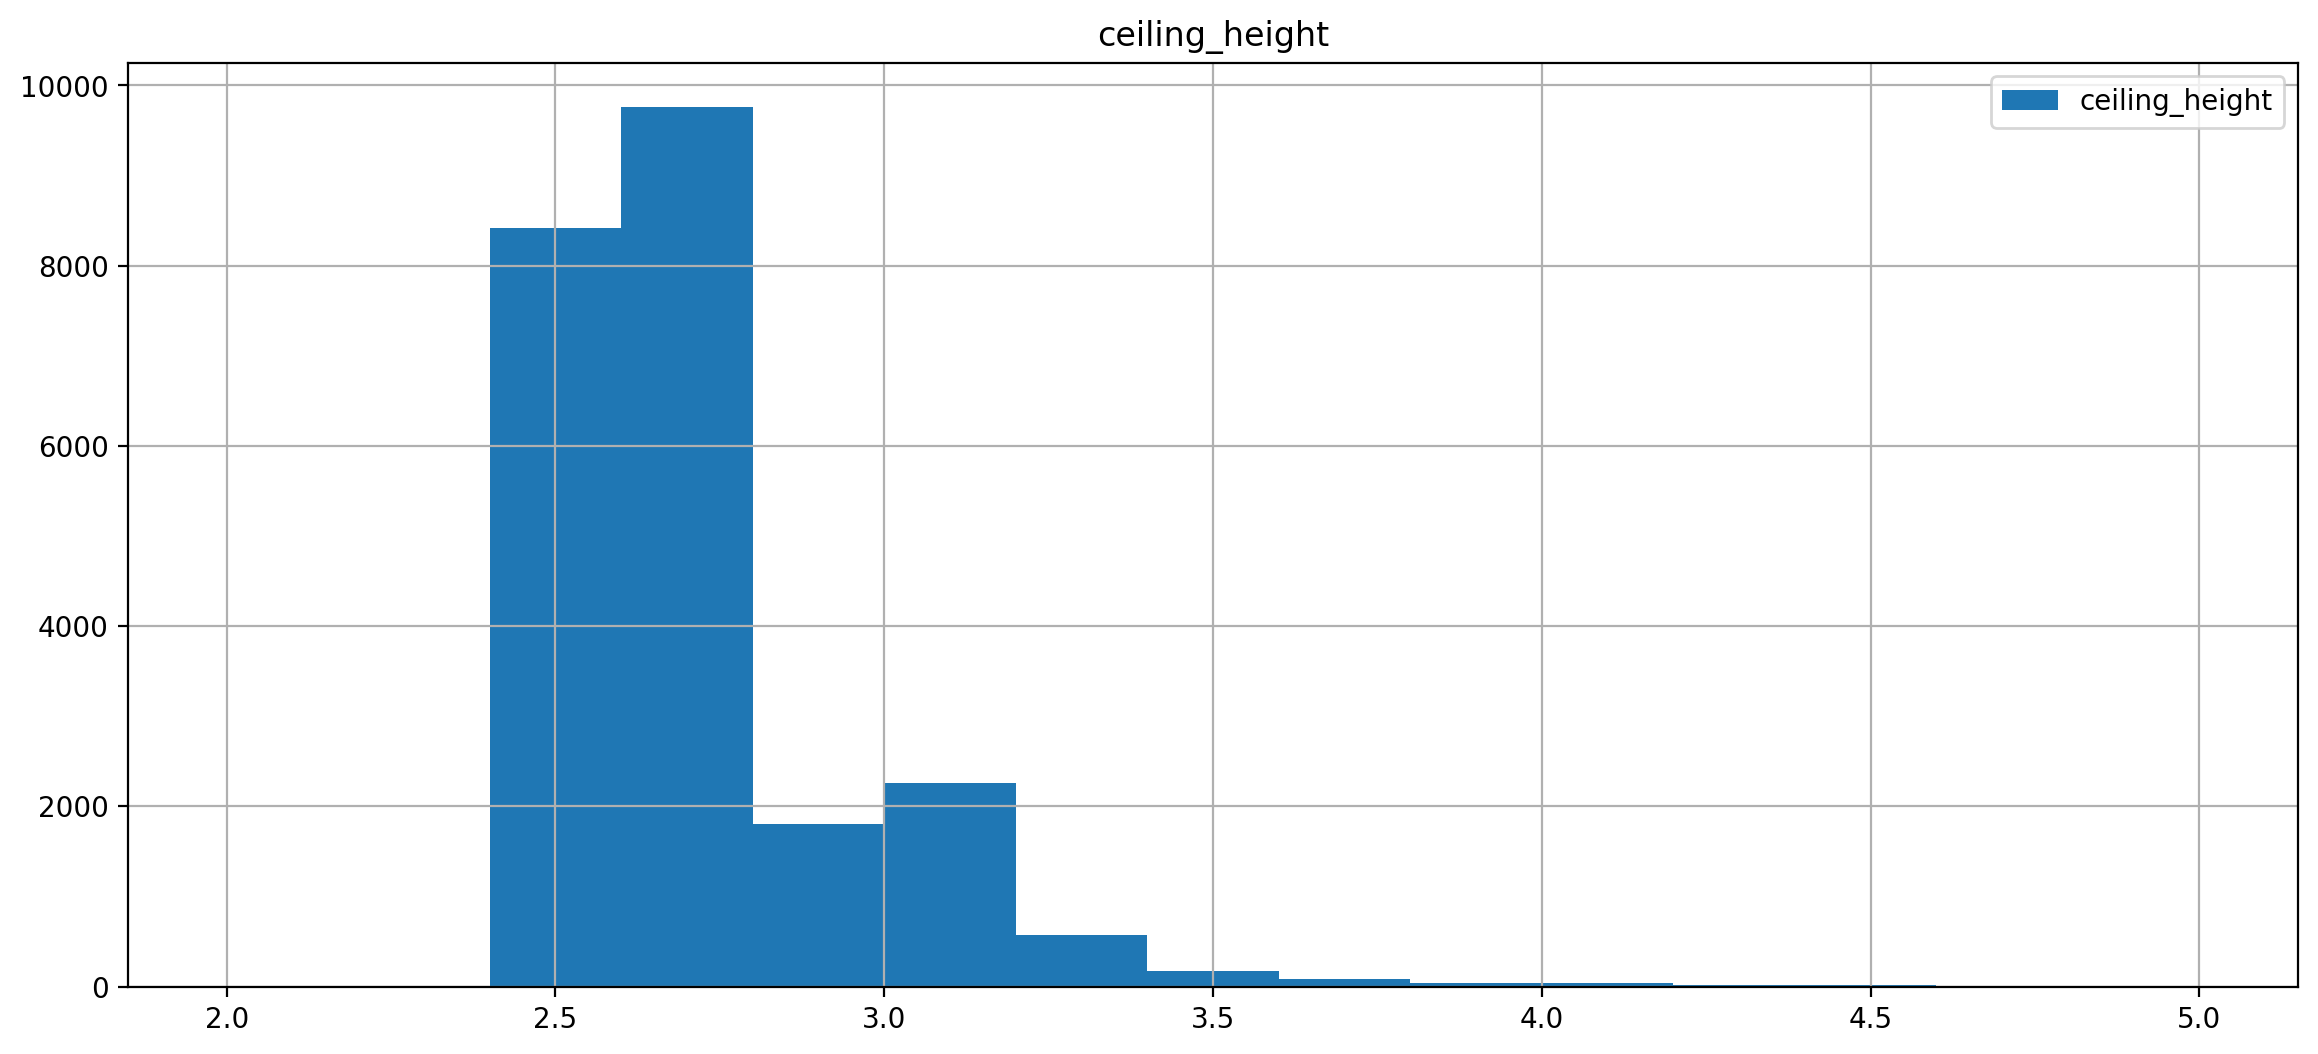

In [78]:
# Построим гистограмму по данным столбца 'ceiling_height'.

data.hist(column='ceiling_height', figsize=(14, 6), legend=True, range=(2, 5), bins=15);

В большинстве объектов высота потолков примерно 2,75 м.

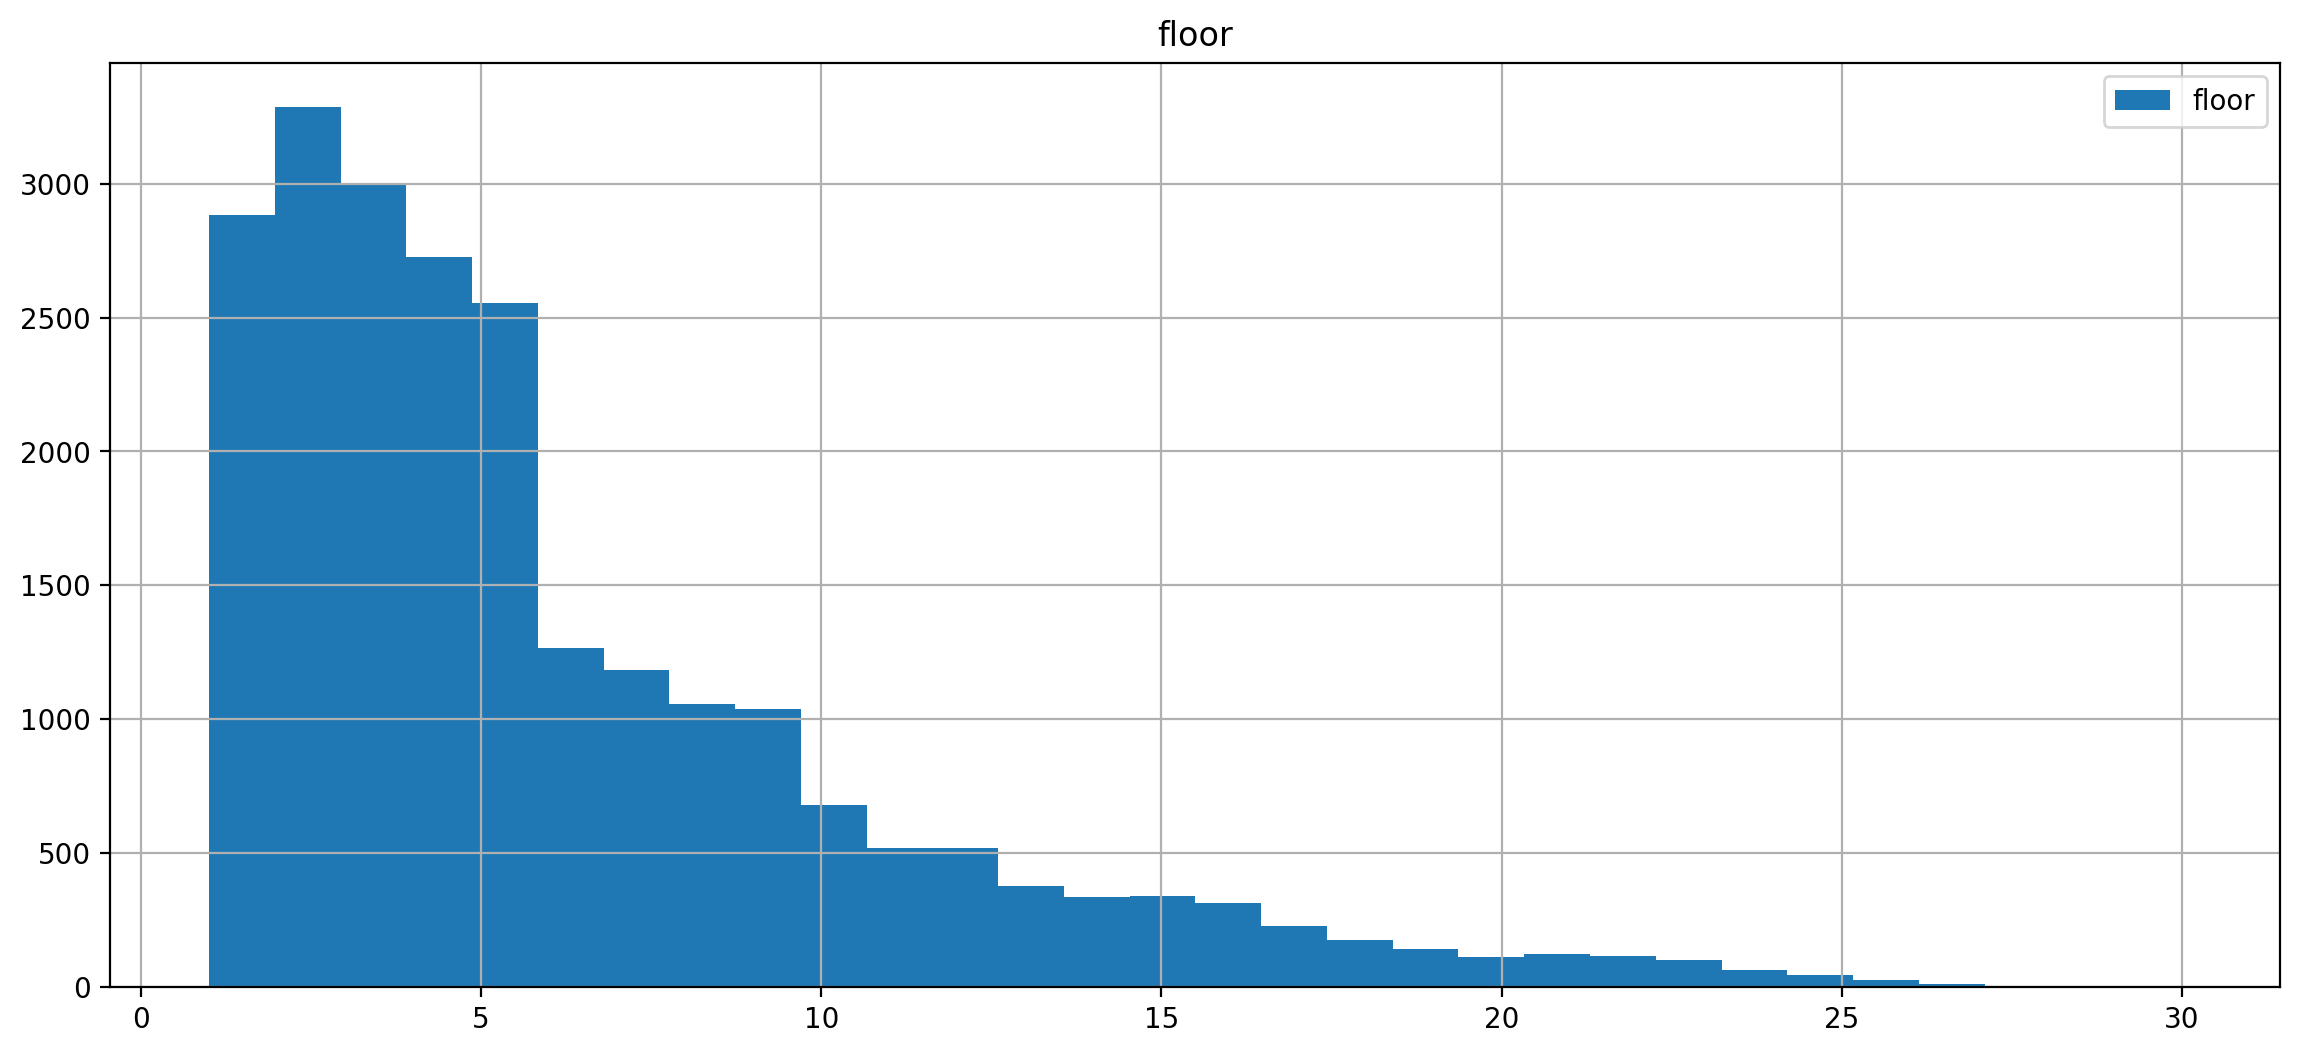

In [79]:
# Построим гистограмму по данным столбца 'floor'.

data.hist(column='floor', figsize=(14, 6), legend=True, range=(1, 30), bins=30);

Большинство объектов расположено на втором этаже. Также заметно резкое снижение числа объектов на этажах выше пятого — скорее всего, это связано с тем, что в Санкт-Петербурге по-прежнему высотных зданий относительно немного.

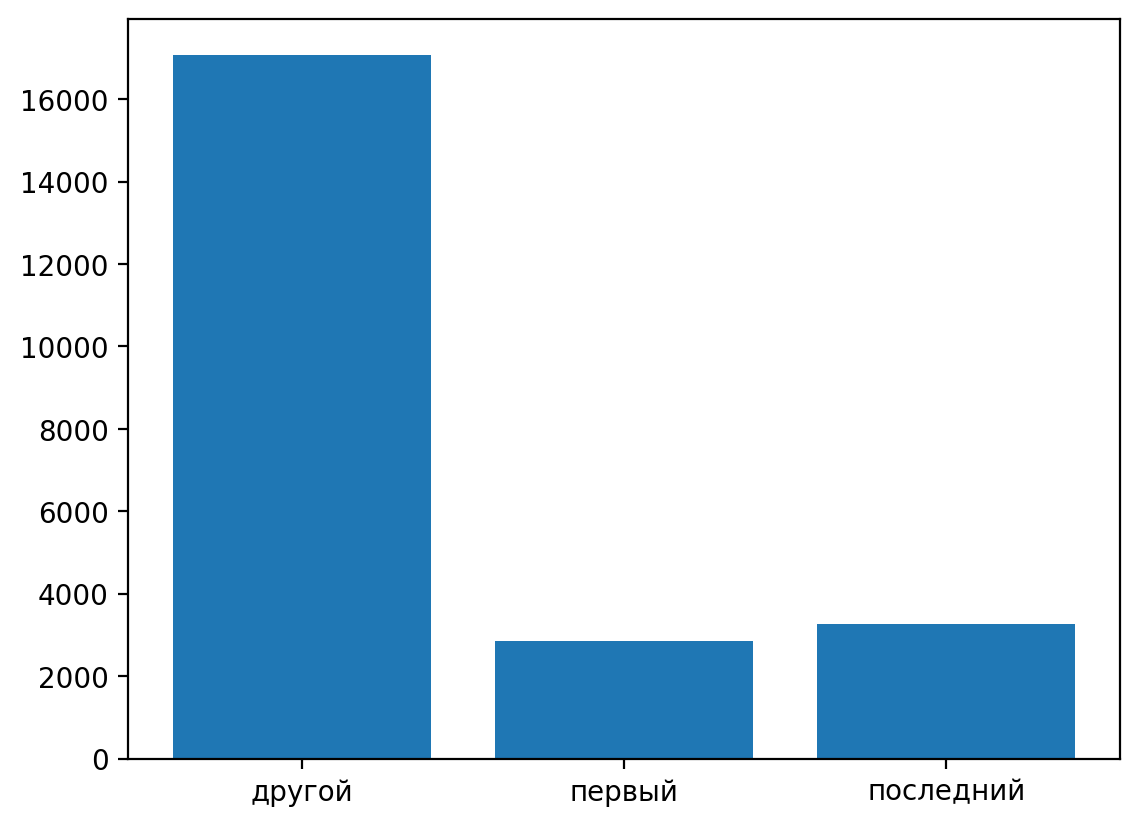

In [80]:
# Построим гистограмму по данным столбца 'floor_type'.
# Методом hist() сделать не удалось, альтернативный способ найден в интернете.

floor_type = list(data['floor_type'])
import collections
x = collections.Counter(floor_type)
l = range(len(x.keys()))
plt.bar(l, x.values(), align='center')
plt.xticks(l, x.keys());

Большинство объектов не на первом и не на последнем этаже. Объектов на последнем этаже больше, чем на первом.

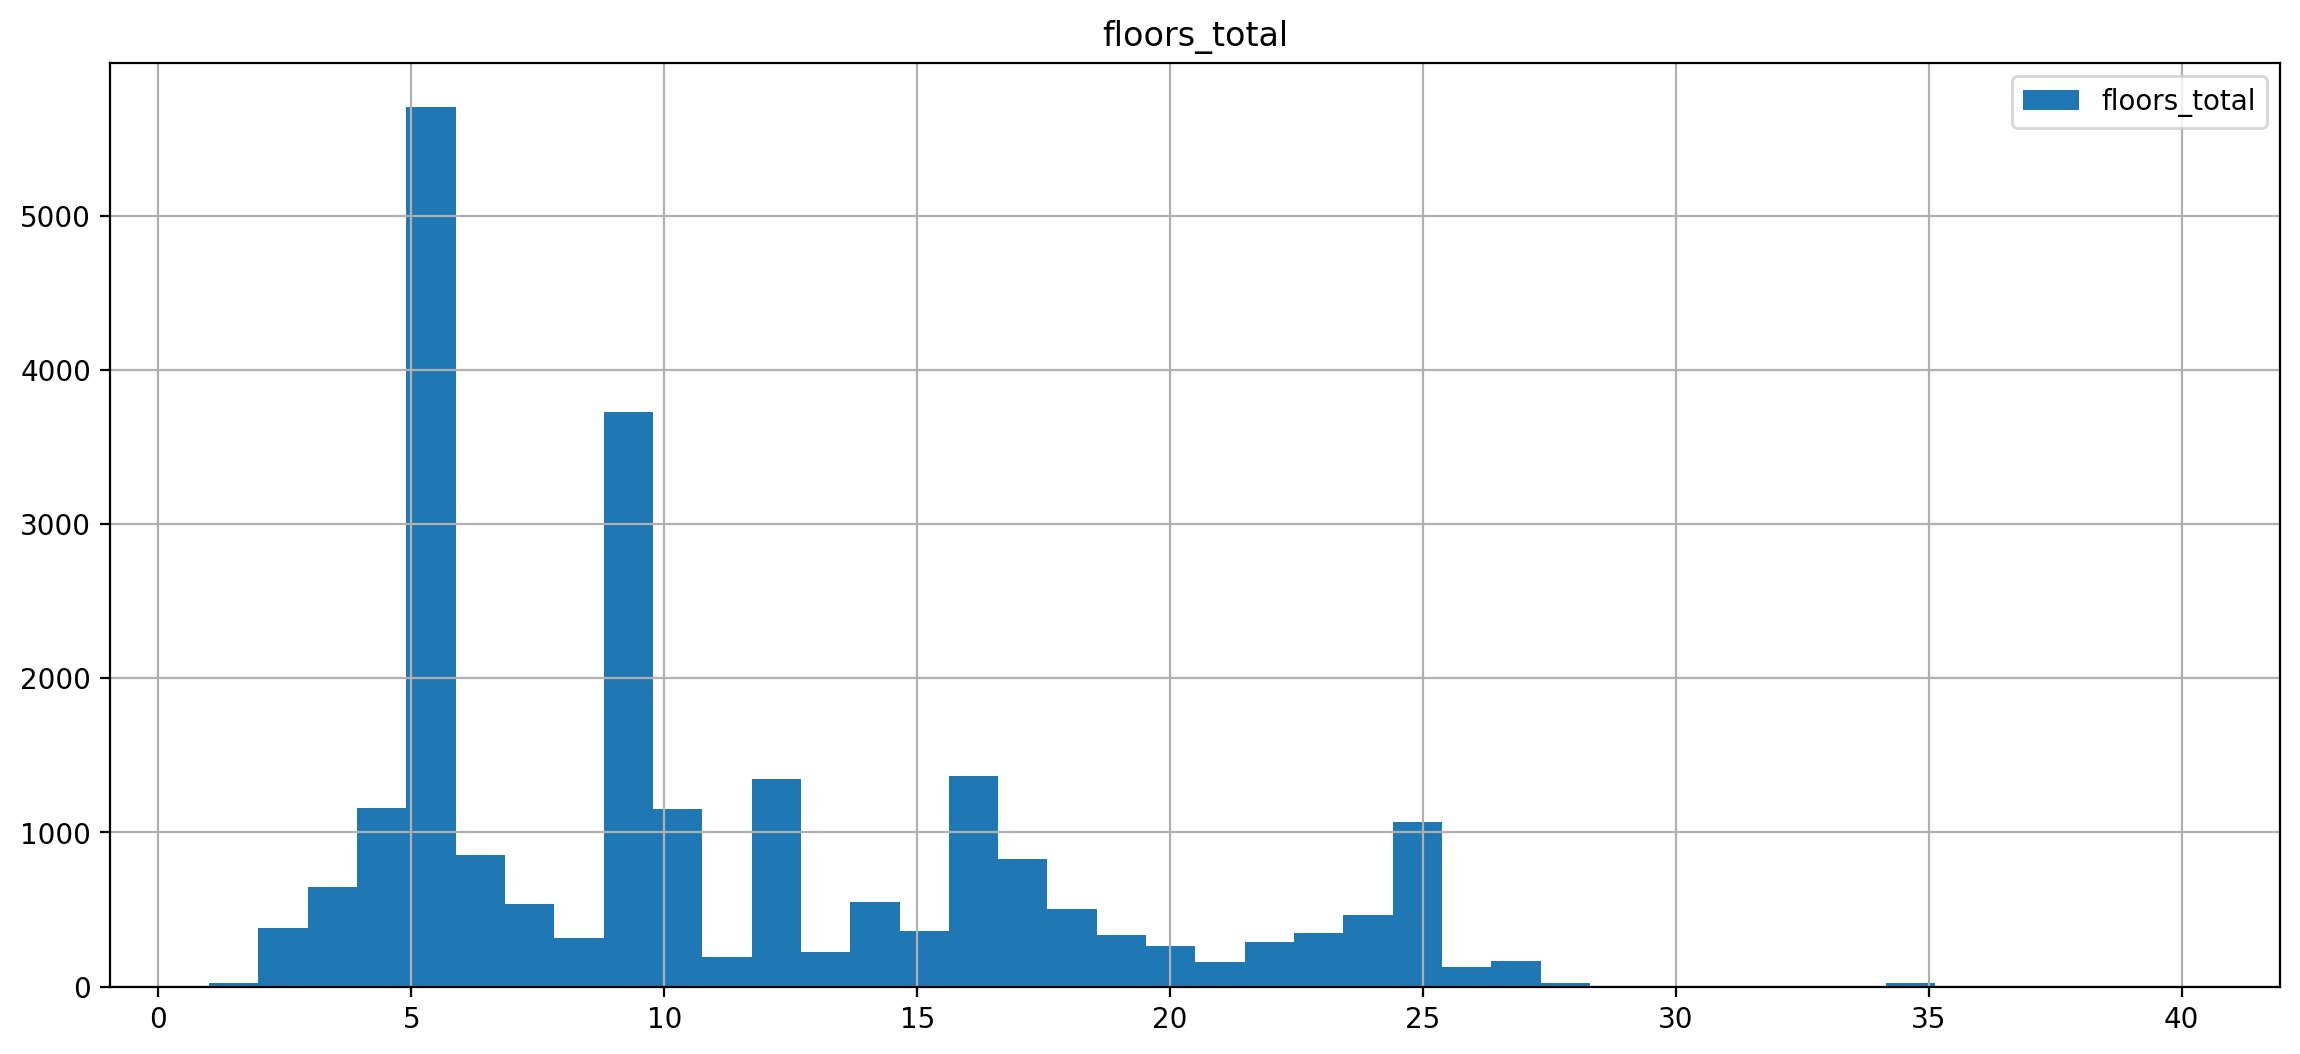

In [81]:
# Построим гистограмму по данным столбца 'floors_total'.

data.hist(column='floors_total', figsize=(14, 6), legend=True, range=(1, 40), bins=40);

Большинство объектов расположены в пятиэтажных домах, много девятиэтажных — видимо, основу жилого фонда Санкт-Петербурга составляют здания, построенные в прошлом веке. Пики типовой этажности: 12, 16 и 25.

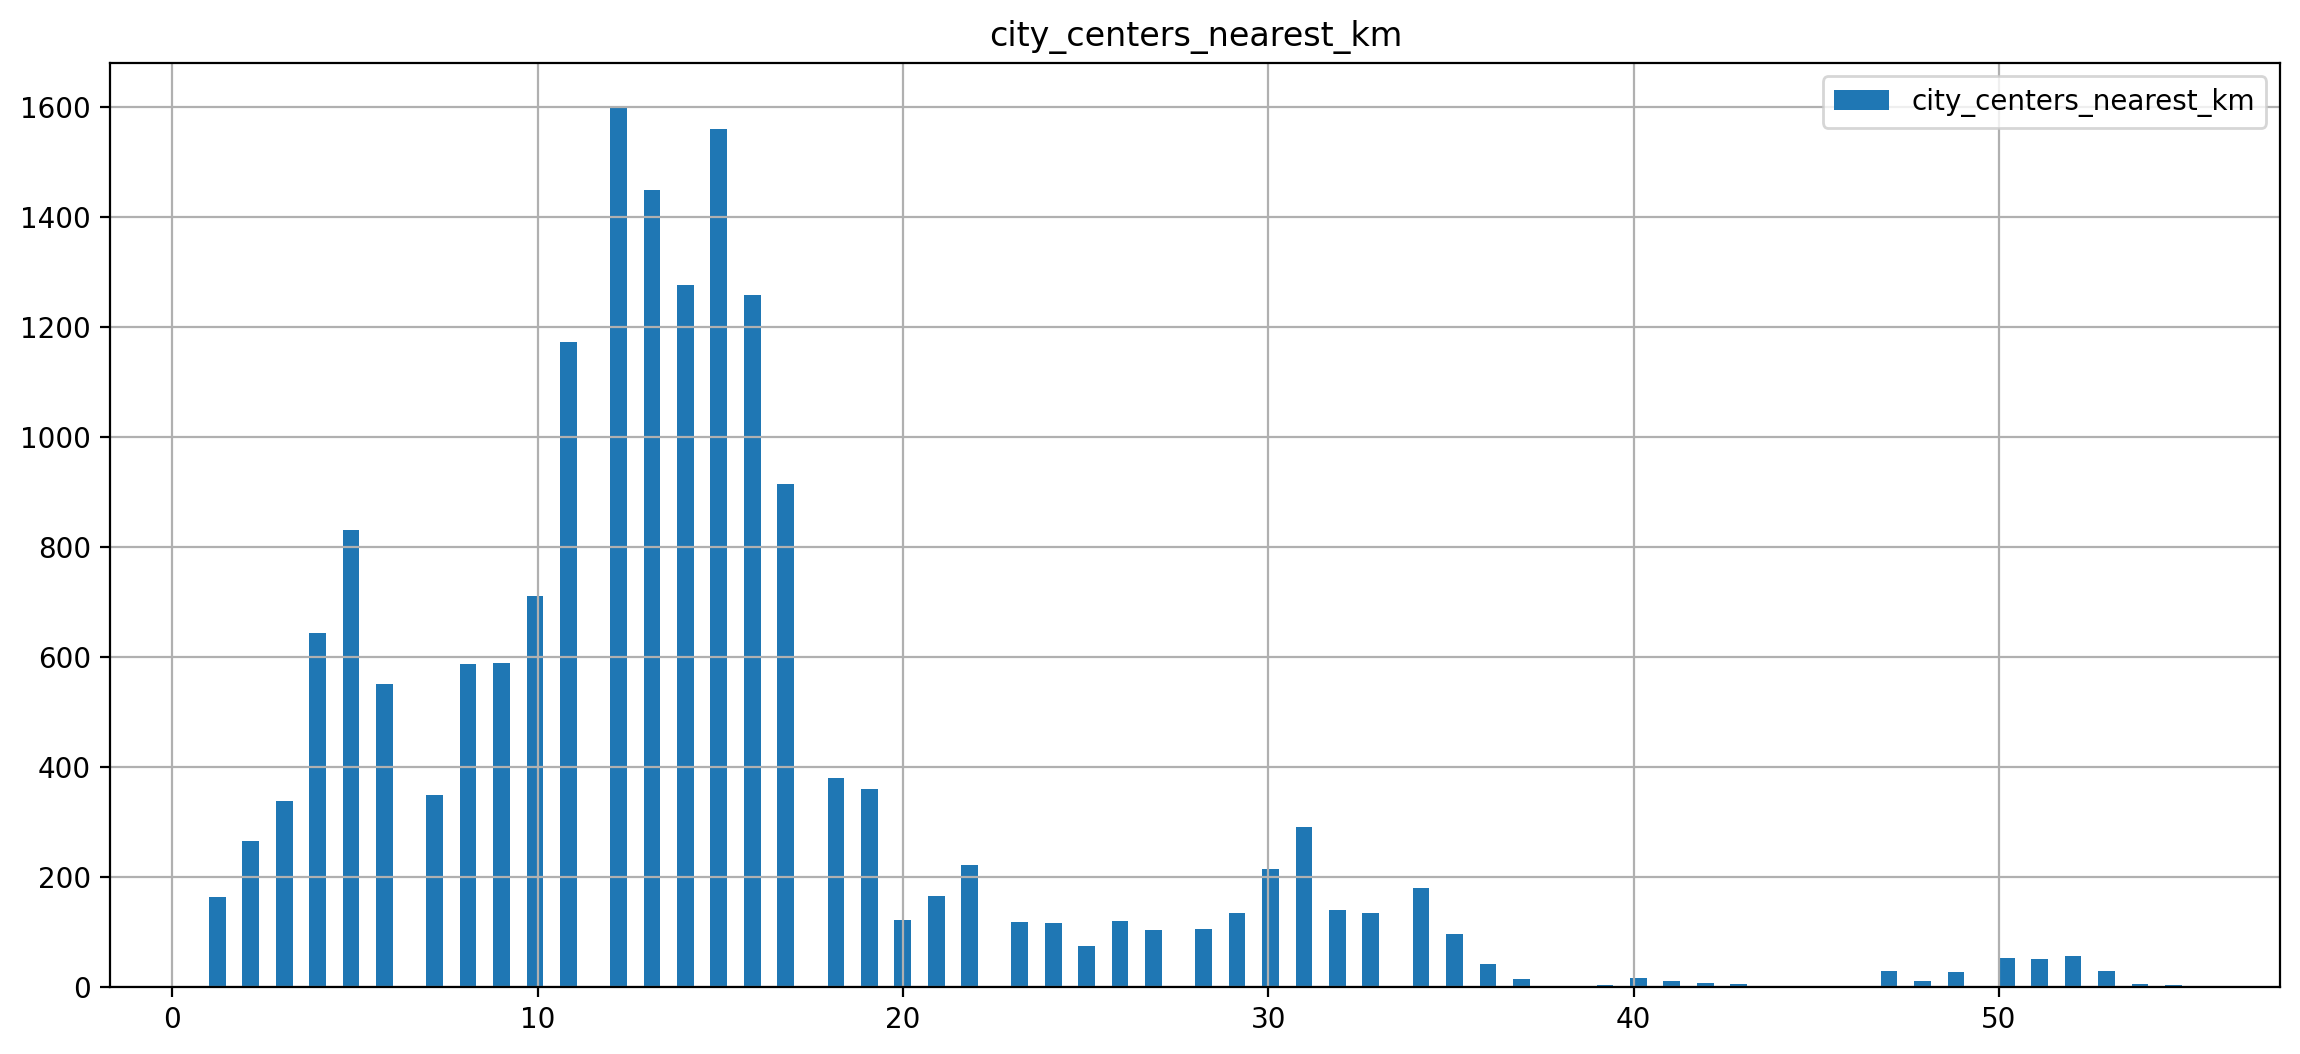

In [82]:
# Построим гистограмму по данным столбца 'city_centers_nearest_km'.

data.hist(column='city_centers_nearest_km', figsize=(14, 6), legend=True, range=(1, 55), bins='auto');

Большинство объектов расположены в радиусе 10-15 км. от центра города — видимо, в спальных районах.

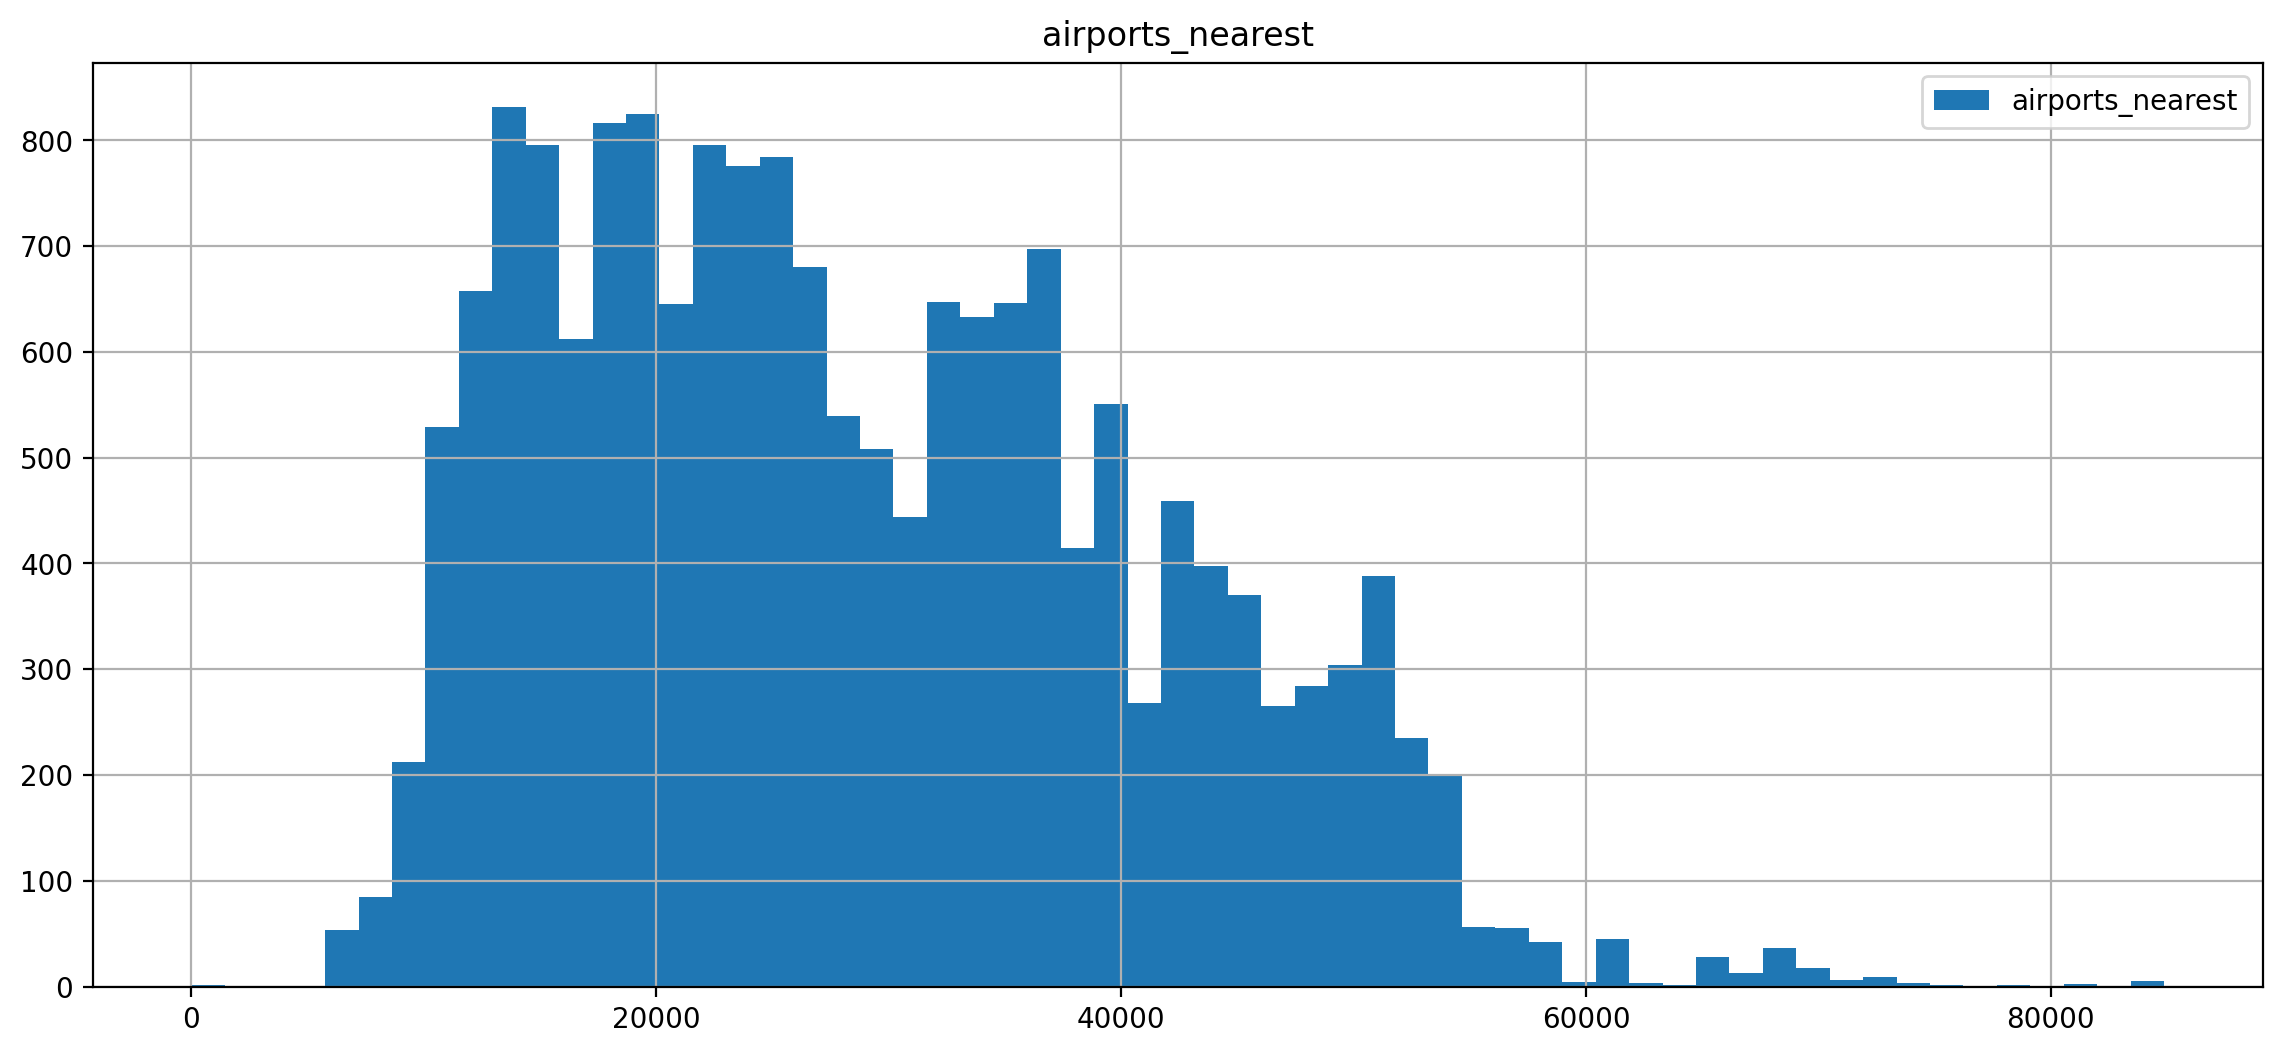

In [83]:
# Построим гистограмму по данным столбца 'airports_nearest'.

data.hist(column='airports_nearest', figsize=(14, 6), legend=True, bins='auto');

Полноценный аэропорт, обслуживащий и внутренние, и международные рейсы, один — разброс расстояний до него довольно большой. При этом есть и часть объектов прямо около воздушной гавани.

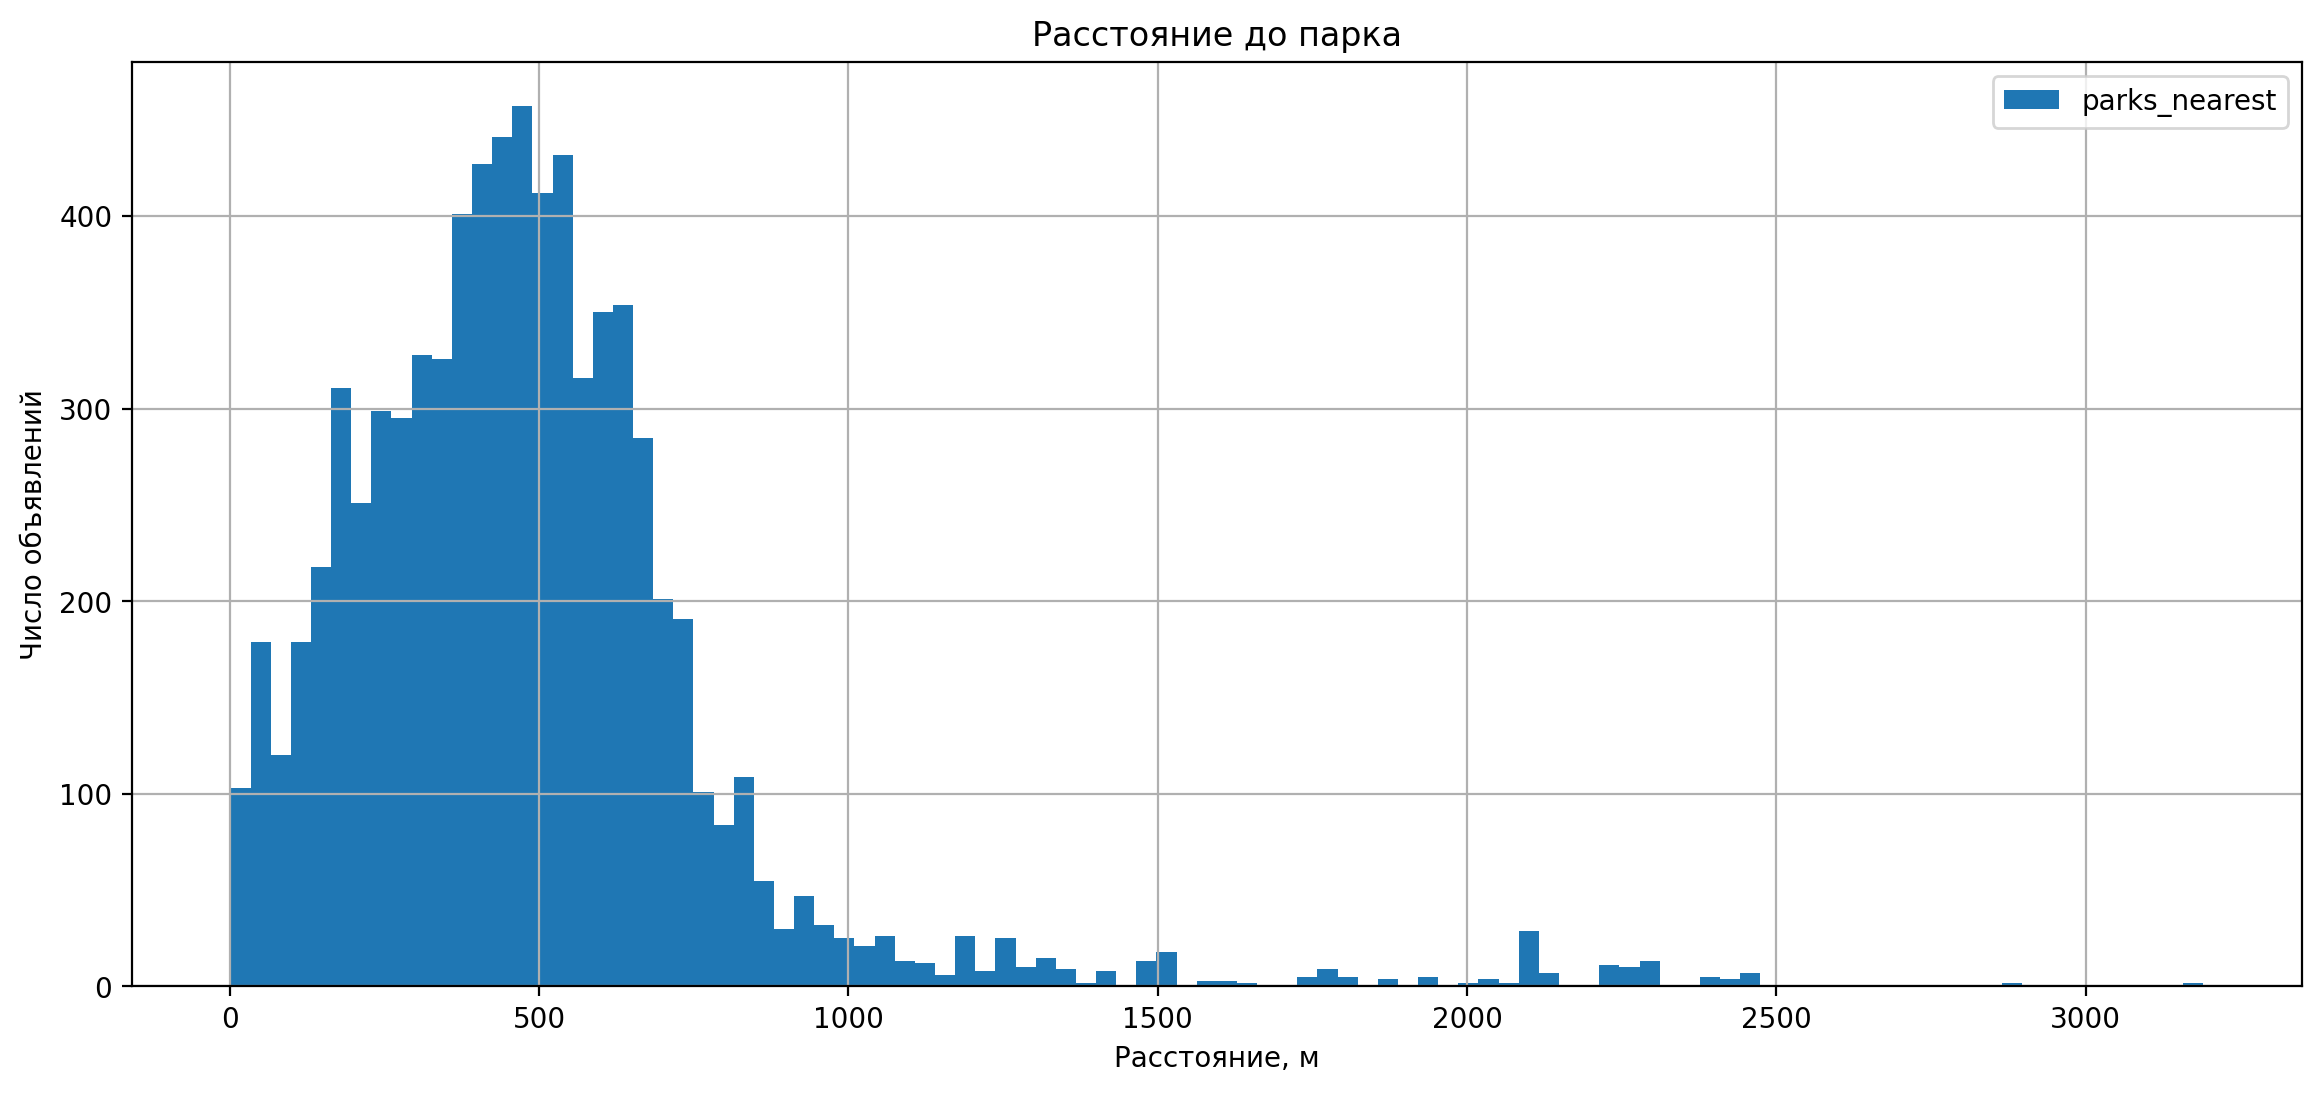

In [84]:
# Построим гистограмму по данным столбца 'parks_nearest'.

data.hist(column='parks_nearest', figsize=(14, 6), legend=True, bins='auto')
plt.title('Расстояние до парка')
plt.ylabel('Число объявлений')
plt.xlabel('Расстояние, м')
plt.show()

Большинсвто объектов расположено от парков в шаговой доступности (примерно в 500 метрах).

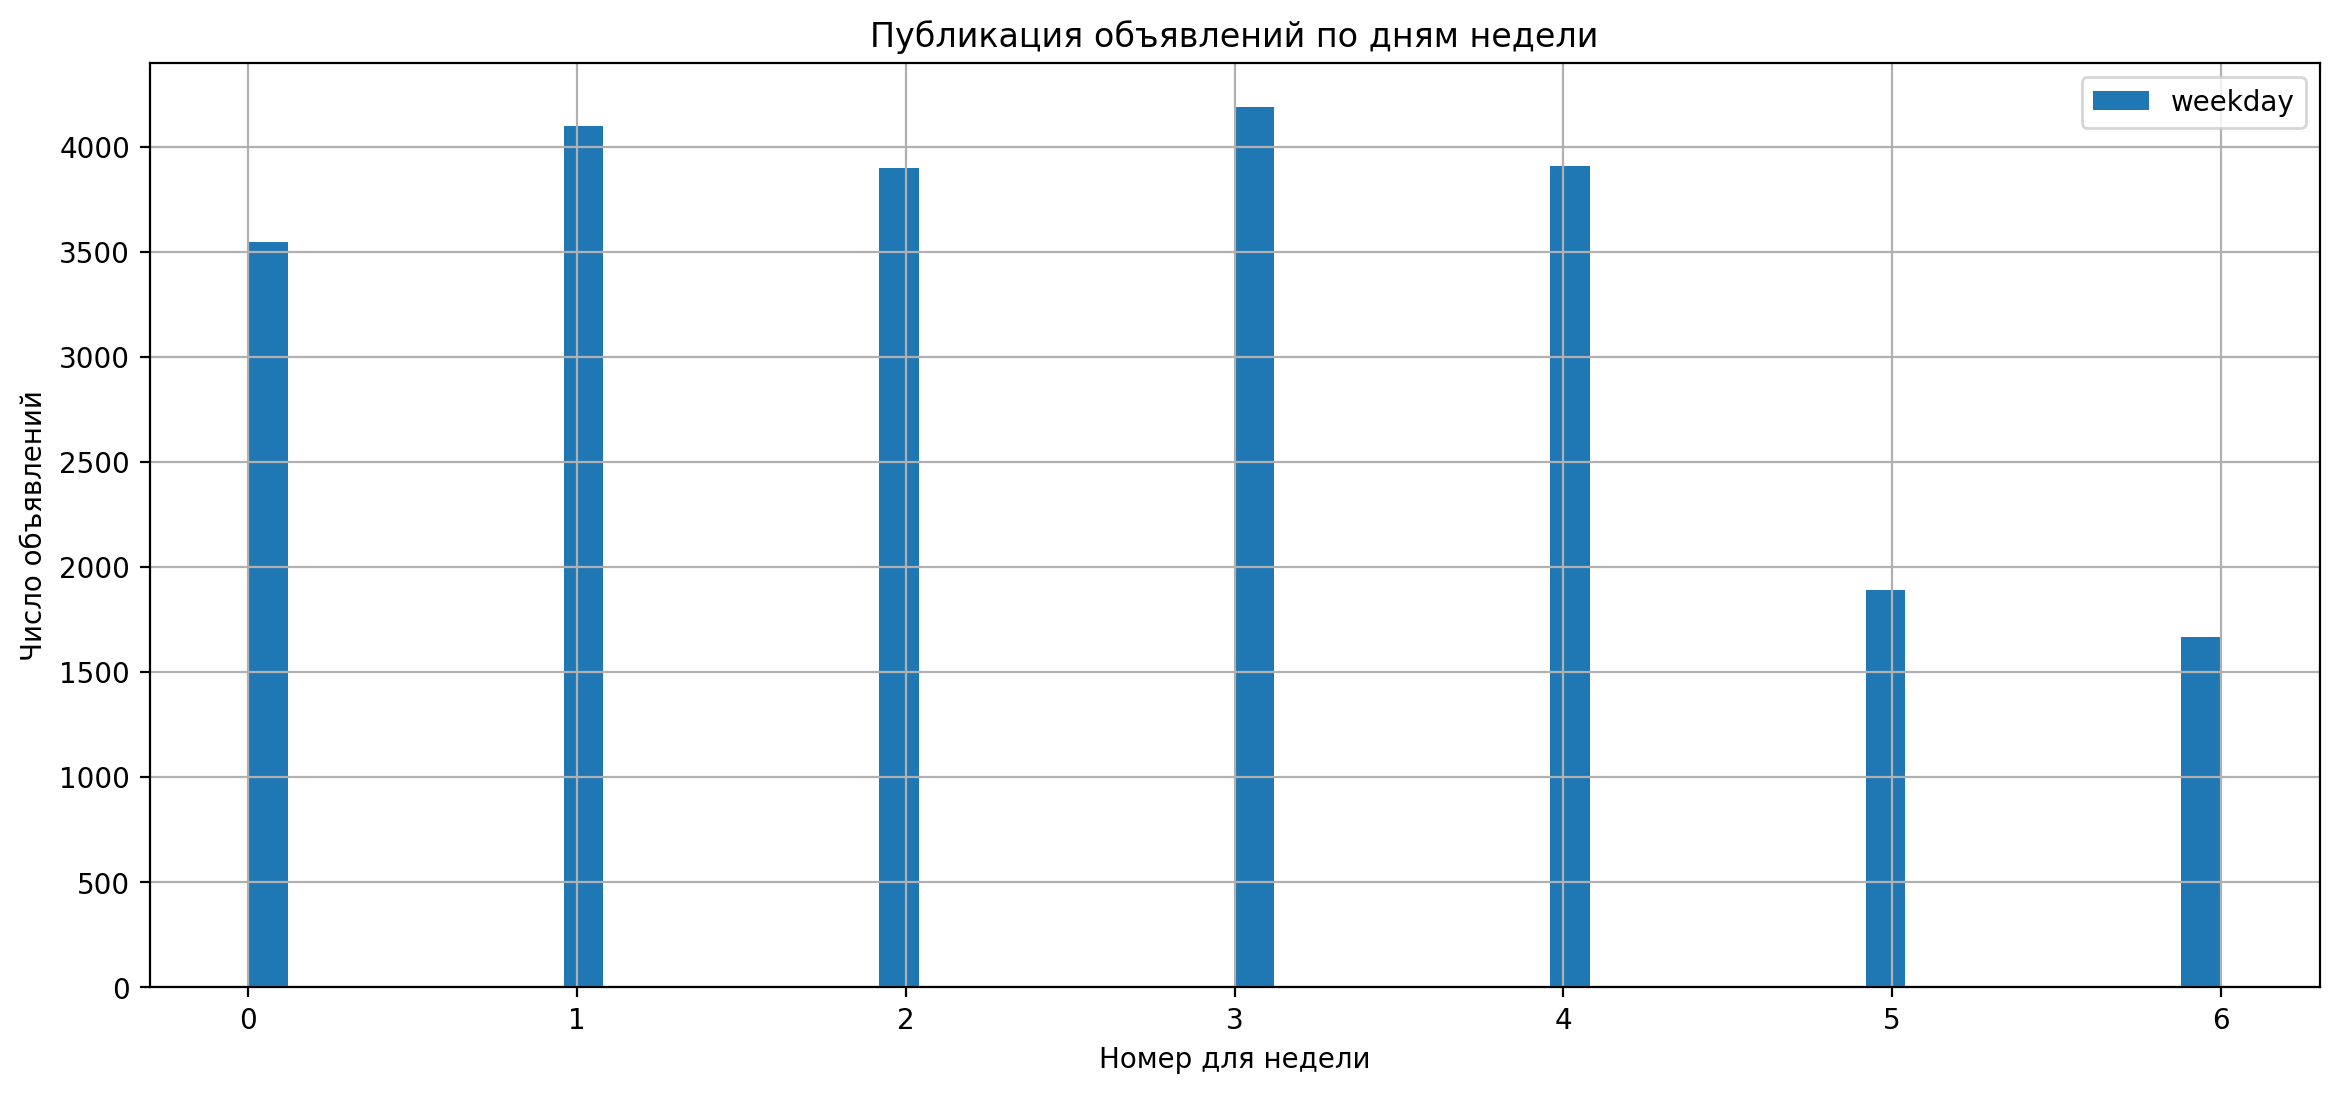

In [85]:
# Построим гистограмму по данным столбца 'weekday'. 

data.hist(column='weekday', figsize=(14, 6), legend=True, bins=50);
plt.title('Публикация объявлений по дням недели')
plt.ylabel('Число объявлений')
plt.xlabel('Номер для недели')
plt.show()

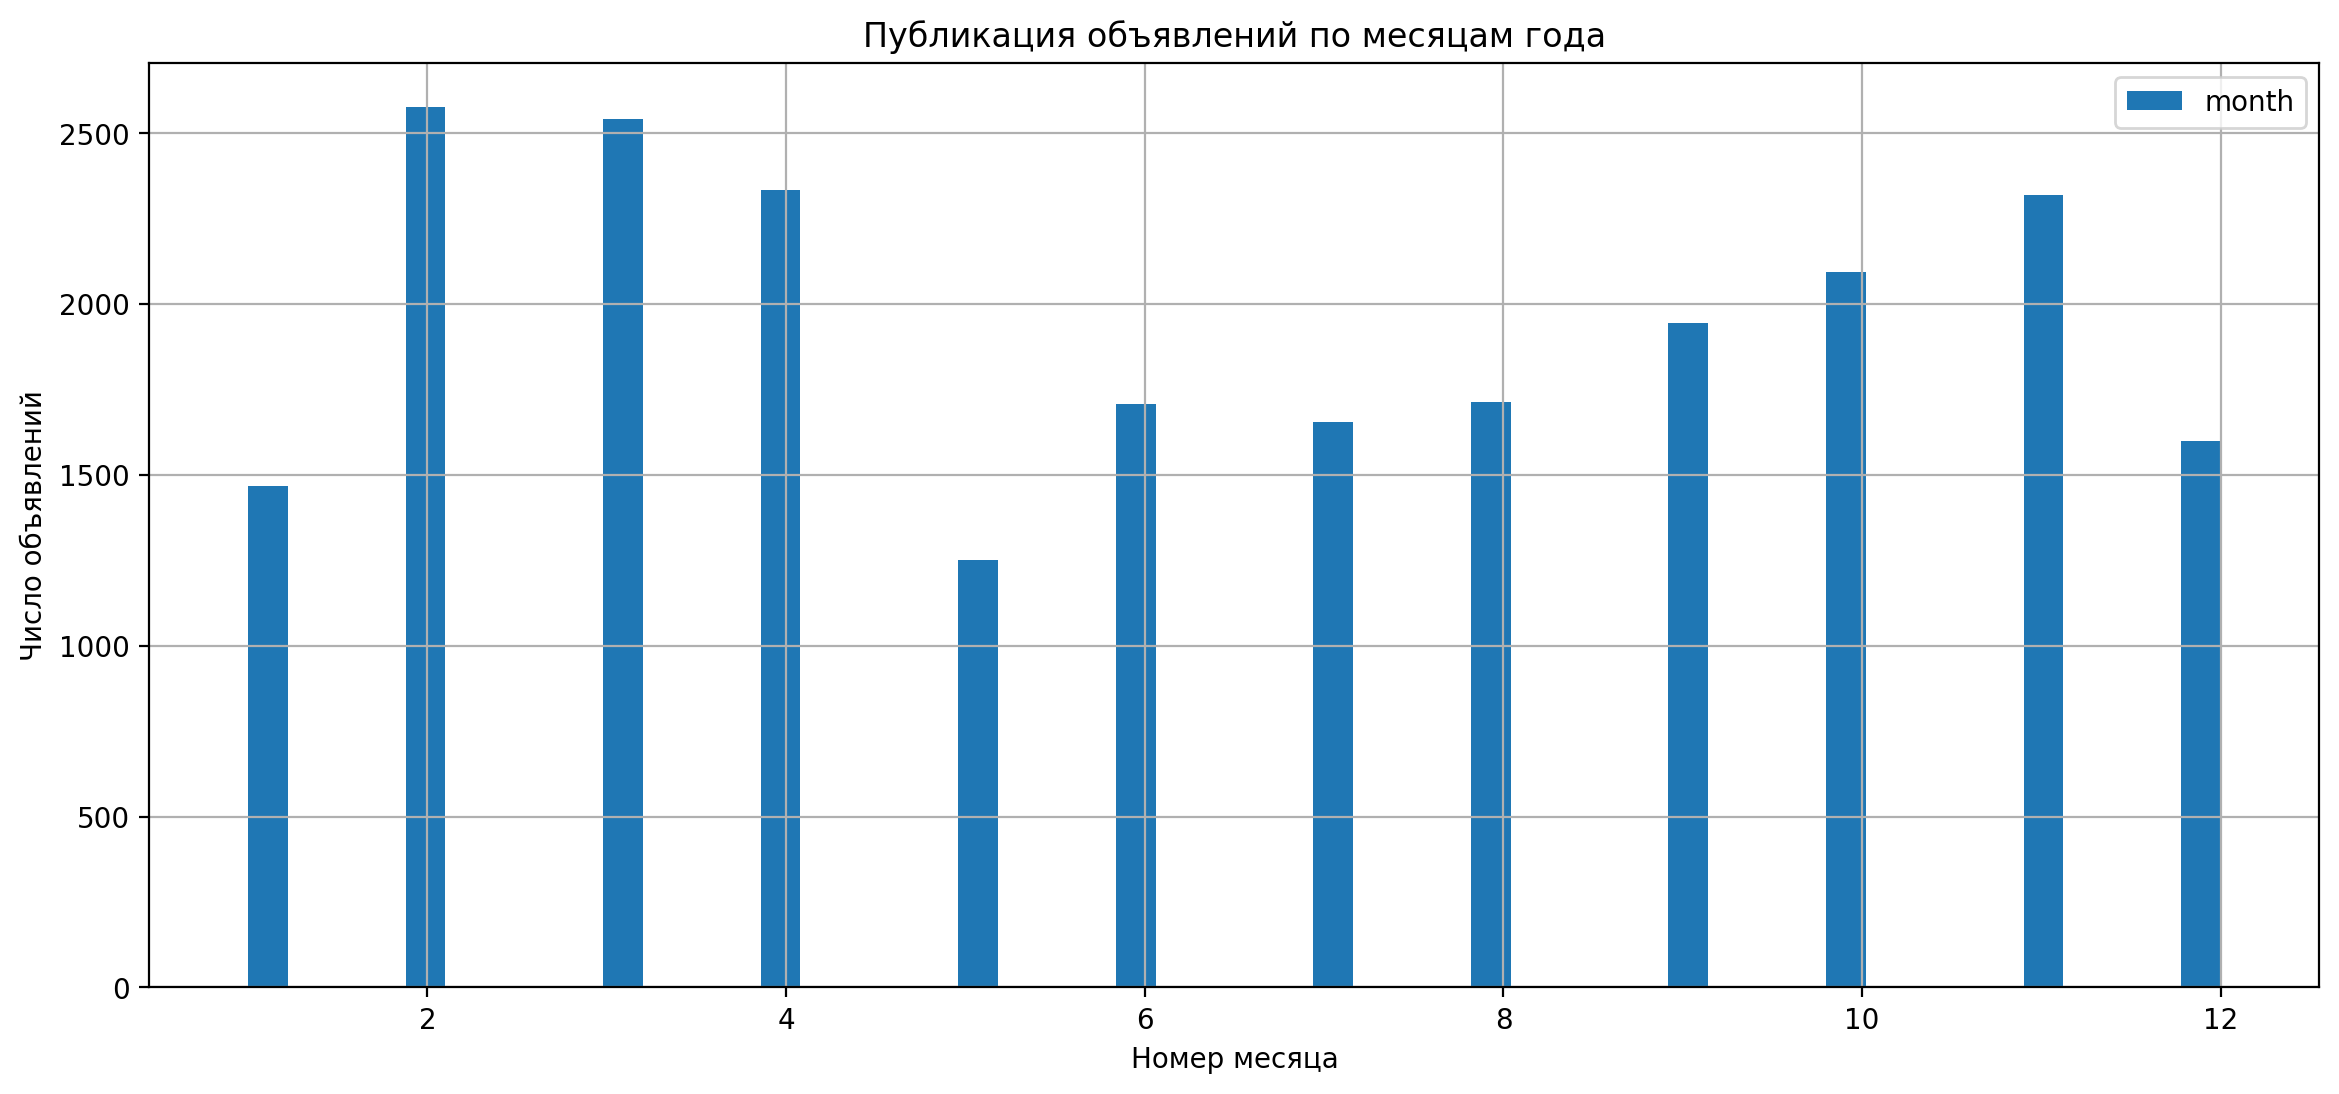

In [86]:
# ИСПРАВЛЕНО Построим гистограмму по данным столбца 'month'. 

data.hist(column='month', figsize=(14, 6), legend=True, bins=50);
plt.title('Публикация объявлений по месяцам года')
plt.ylabel('Число объявлений')
plt.xlabel('Номер месяца')
plt.show()

Видно, что максимальная активность в публикации объявлений по вторникам и четвергам. Минимальная — в выходные, что логично. В понедельник активность ниже, чем в другие рабочие дни.
    
В течение года максимальная активность в публикации объявлений в феврале и марте, чуть ниже, но тоже высокая в апреле и ноябре. Минимальная — в январе и мая, что логично, так как почти треть месяца выходные, а в выходные, а низкую активность в выходные подтверждает и анализ публикаций по дням недели. Низкая активность также в летние месяцы и в декабре.

Наибольшее число объявлений было опубликовано в конце 2017 — начале 2018 года, возможно, это было связано с подготовкой к проведению чемпионата мира по футболу. С 2015 по 2017 число объявлений постепенно росло, после пика в начале 2018 года число публикуемых объявлений снизилось и в среднем вышло на плато.

Заметно снижение числа объявлений в январе в летние месяцаы.

#### Изучение скорости продажи

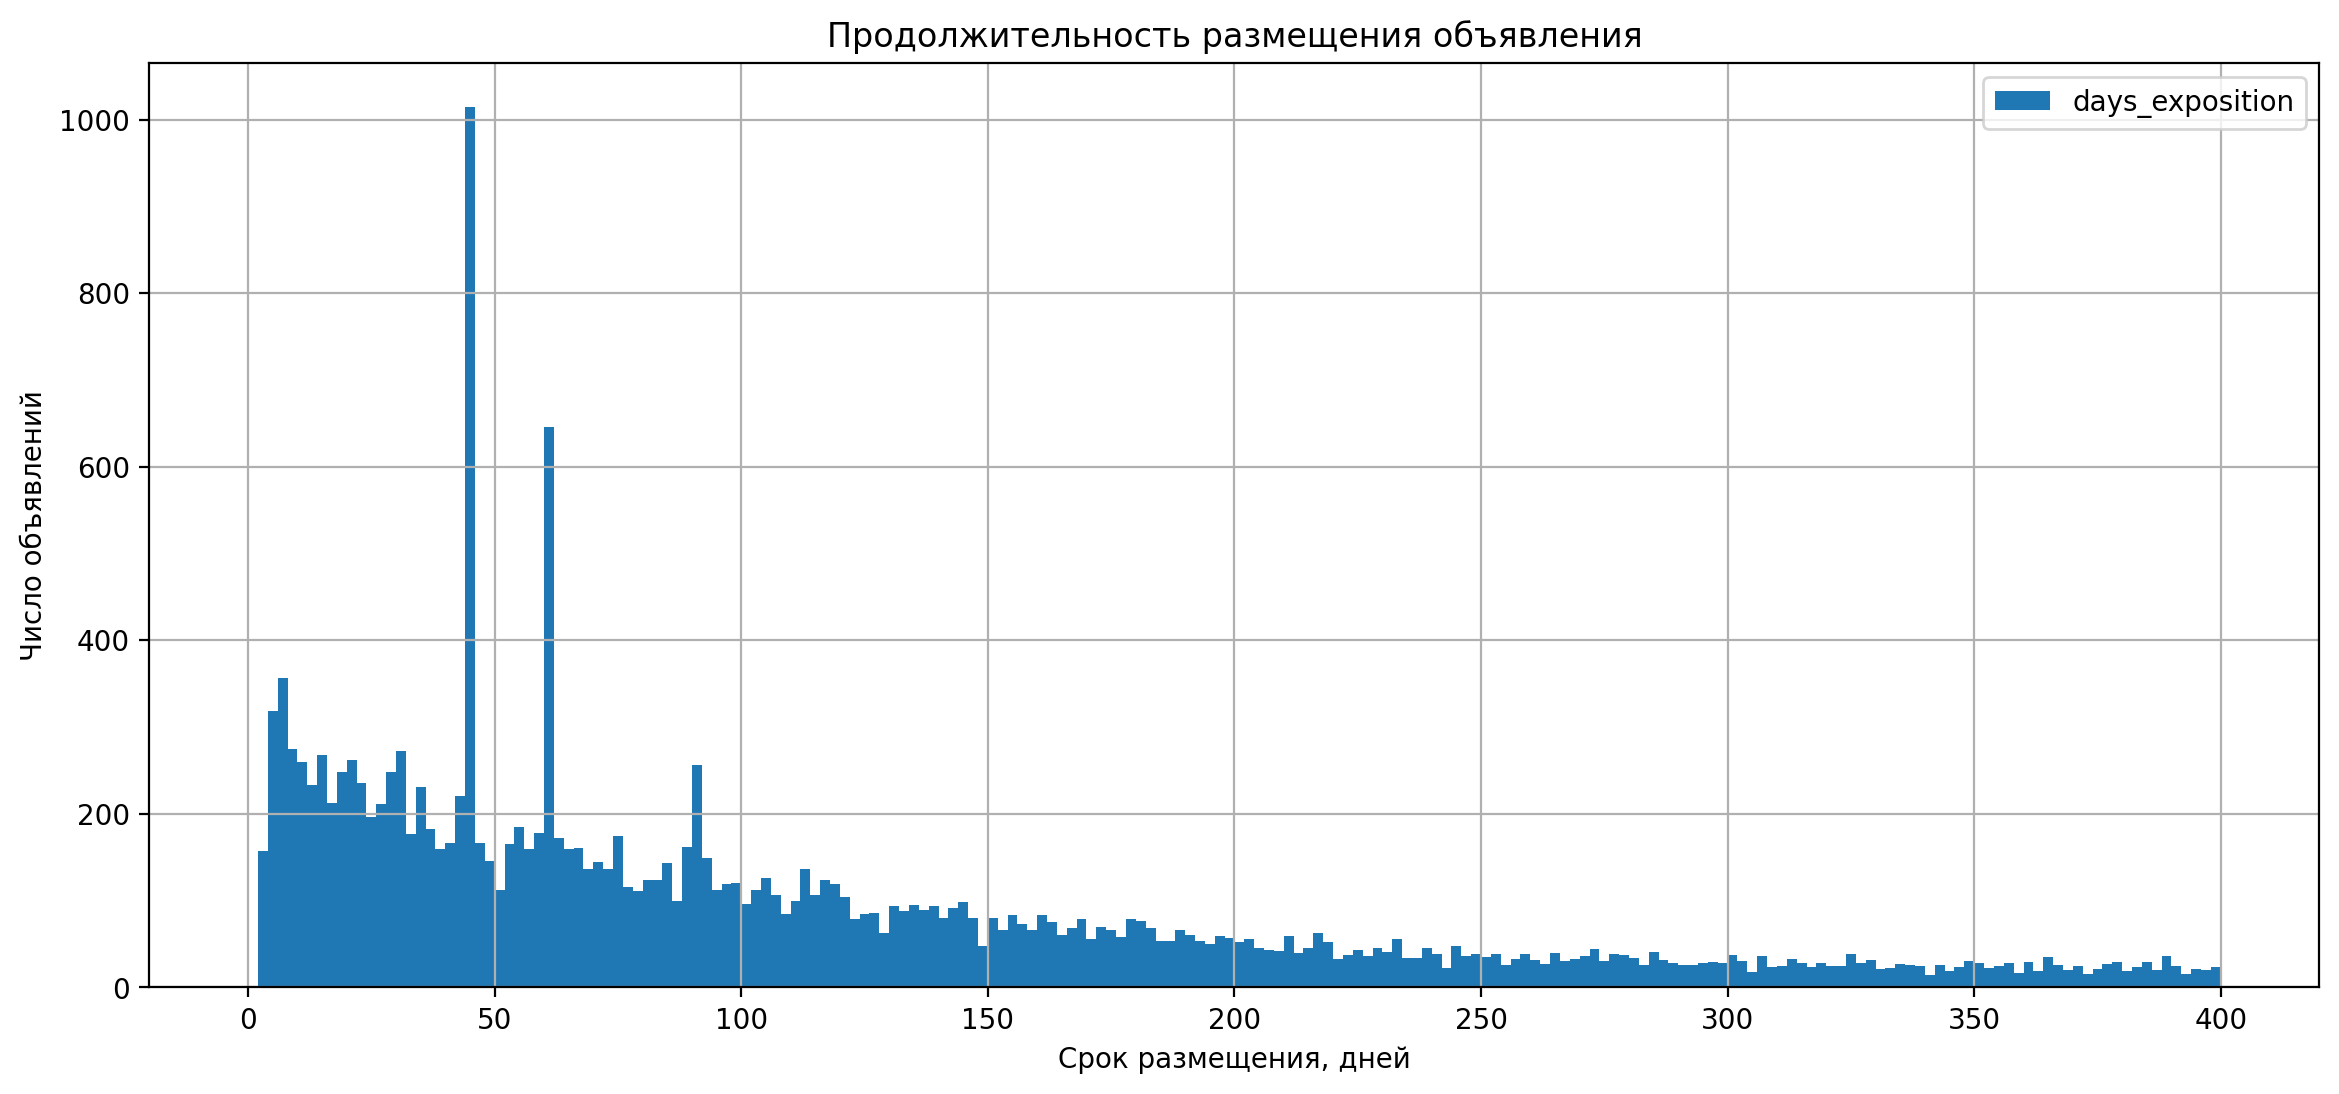

In [87]:
# Построим гистограмму по данным столбца 'days_exposition'.

data.hist(column='days_exposition', figsize=(14, 6), legend=True, range=(0,400), bins=200)
plt.title('Продолжительность размещения объявления')
plt.ylabel('Число объявлений')
plt.xlabel('Срок размещения, дней')
plt.show()

In [88]:
# Посчитаем среднее и медианное значения срока размещения объявления.

print('Среднее значение срока размещения объявления:', data['days_exposition'].mean())
print('Медианное значение срока размещения объявления:', data['days_exposition'].median())

Среднее значение срока размещения объявления: 178.8859710087371
Медианное значение срока размещения объявления: 94.0


На гистограмме видны несколько пиков — видимо, они связаны с разным сроком продажи для разных объектов. Медианный срок размещения объявления 91 день, средний почти вдвое больше 169 дней. Видимо, такое смещение в большую сторону могут давать объявления, которые либо долго "висели" на площадки (например, владельцы не спешили с продажей и выставляли завышенную цену), либо и вовсе несколько раз активировали одно и тоже объявление, передумывая продавать и снова возвращаясь к данной идее (но нужно уточнять, как именно считается данный параметр).

Обычно, объявления размещены около трех месяцев. Есть пики около 40, 60, 80, 90 и 120 дней. Видимо, они связаны с автоматическим снятием объявлений определенных категорий.

Быстрая продажа — в течение месяца (данные могут искажать снятия объявлений в первые дни, не связанные с продажей: тестирование спроса, отказ от продажи).

Учитывая большое число объявлений, находившихся на площадке от 150 до 400 дней, назвать каие-то продажи именно "необычно долгими" сложно. Есть даже пик в районе примерно 160 дня. Но дольше полугода — долгая продажа.

#### Изучение факторов, влияющих на общую (полную) стоимость

In [89]:
# Создадим новый датафрейм с нужными данными.

data_new = pd.DataFrame()
data_new['last_price'] = data['last_price']
data_new['total_area'] = data['total_area']
data_new['living_area'] = data['living_area']
data_new['kitchen_area'] = data['kitchen_area']
data_new['rooms'] = data['rooms']
data_new['floor_type'] = data['floor_type']
data_new['first_day_exposition'] = data['first_day_exposition']

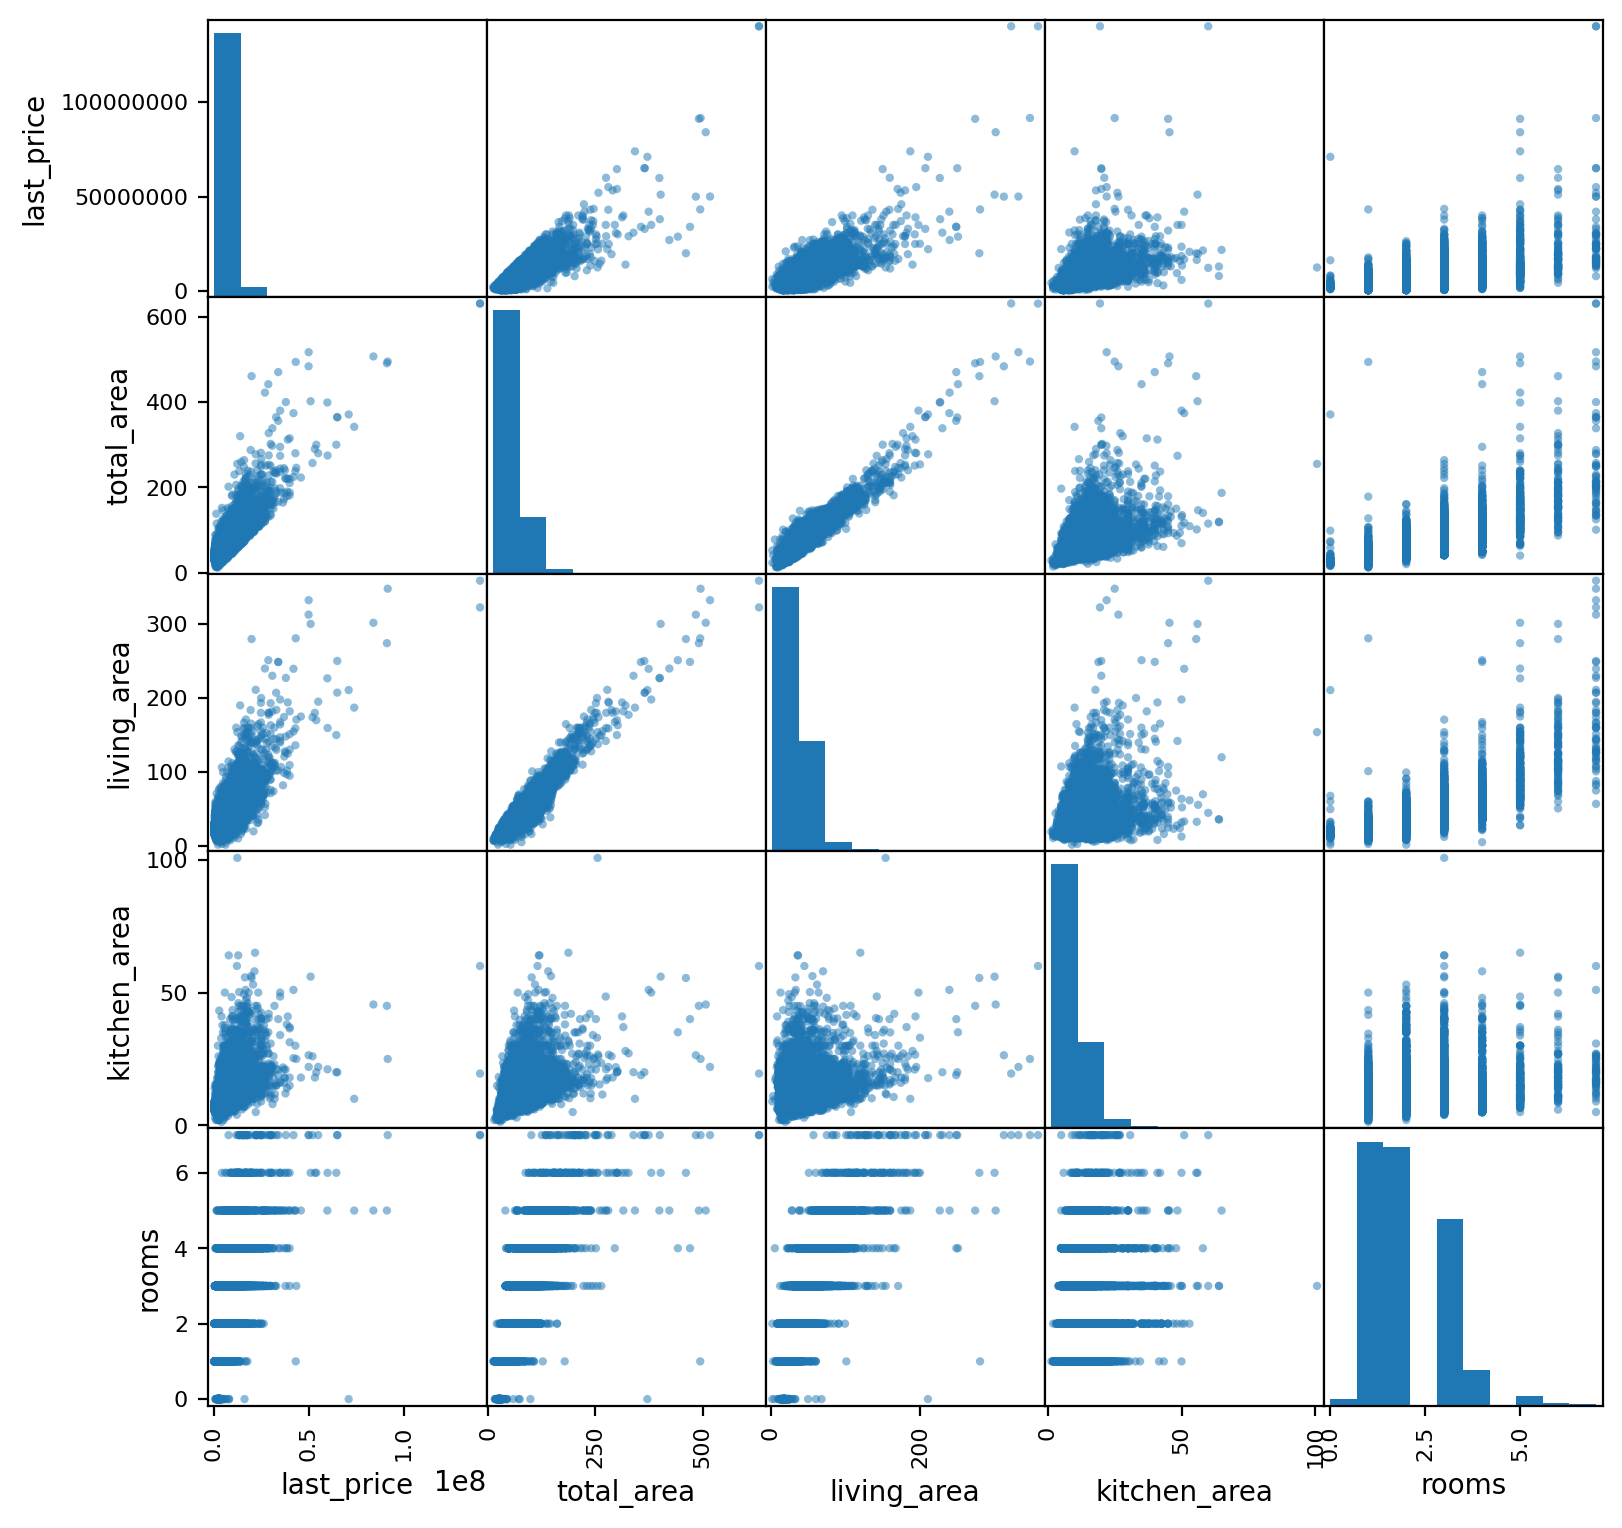

In [90]:
# Построим матрицу диаграмм рассеяния.

pd.plotting.scatter_matrix(data_new, figsize=(9, 9));

In [91]:
# Посмотрим корреляцию показателей.

data_new.corr()

/var/folders/rv/l75t6vfj4xgcbg0j9474jnxh0000gn/T/ipykernel_12593/243211664.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_new.corr()


,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.838920,0.760307,0.573891,0.525458
total_area,0.838920,1.000000,0.951859,0.558818,0.765028
living_area,0.760307,0.951859,1.000000,0.373384,0.831465
kitchen_area,0.573891,0.558818,0.373384,1.000000,0.217032
rooms,0.525458,0.765028,0.831465,0.217032,1.000000


In [92]:
# Еще один способ.

data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.838920,0.760307,0.573891,0.525458
total_area,0.838920,1.000000,0.951859,0.558818,0.765028
living_area,0.760307,0.951859,1.000000,0.373384,0.831465
kitchen_area,0.573891,0.558818,0.373384,1.000000,0.217032
rooms,0.525458,0.765028,0.831465,0.217032,1.000000


Набольшее влияние на общую (полную) стоимость объекта оказывает его общая площадь. Жилая площадь, так же оказывает влияние на стоимость (так как сама (жилая площадь) практически линейно зависима от общей площади).

Зависимость стоимость от площади кухни, тем более от числа комнат сильно ниже: разброс цен на объекты с одной и той же площадью и числом комнат значительный.

In [93]:
# Создадим сводную таблицу общей стоиомсти объектов по этажам и добавим стоимость квадратного метра.

floor_price = data.pivot_table(index='floor', values=['last_price_mil', 'meter_price'],
                               aggfunc='median').reset_index()
floor_price

,floor,last_price_mil,meter_price
0,1,3.9000,81010.977188
1,2,4.3900,90189.873418
2,3,4.5000,92699.079309
3,4,4.6000,92274.943599
4,5,4.3000,90000.000000
5,6,5.0000,98547.717842
6,7,4.9000,99842.757577
7,8,4.7725,99955.140600
8,9,4.6500,97613.882863
9,10,5.0000,104125.862712


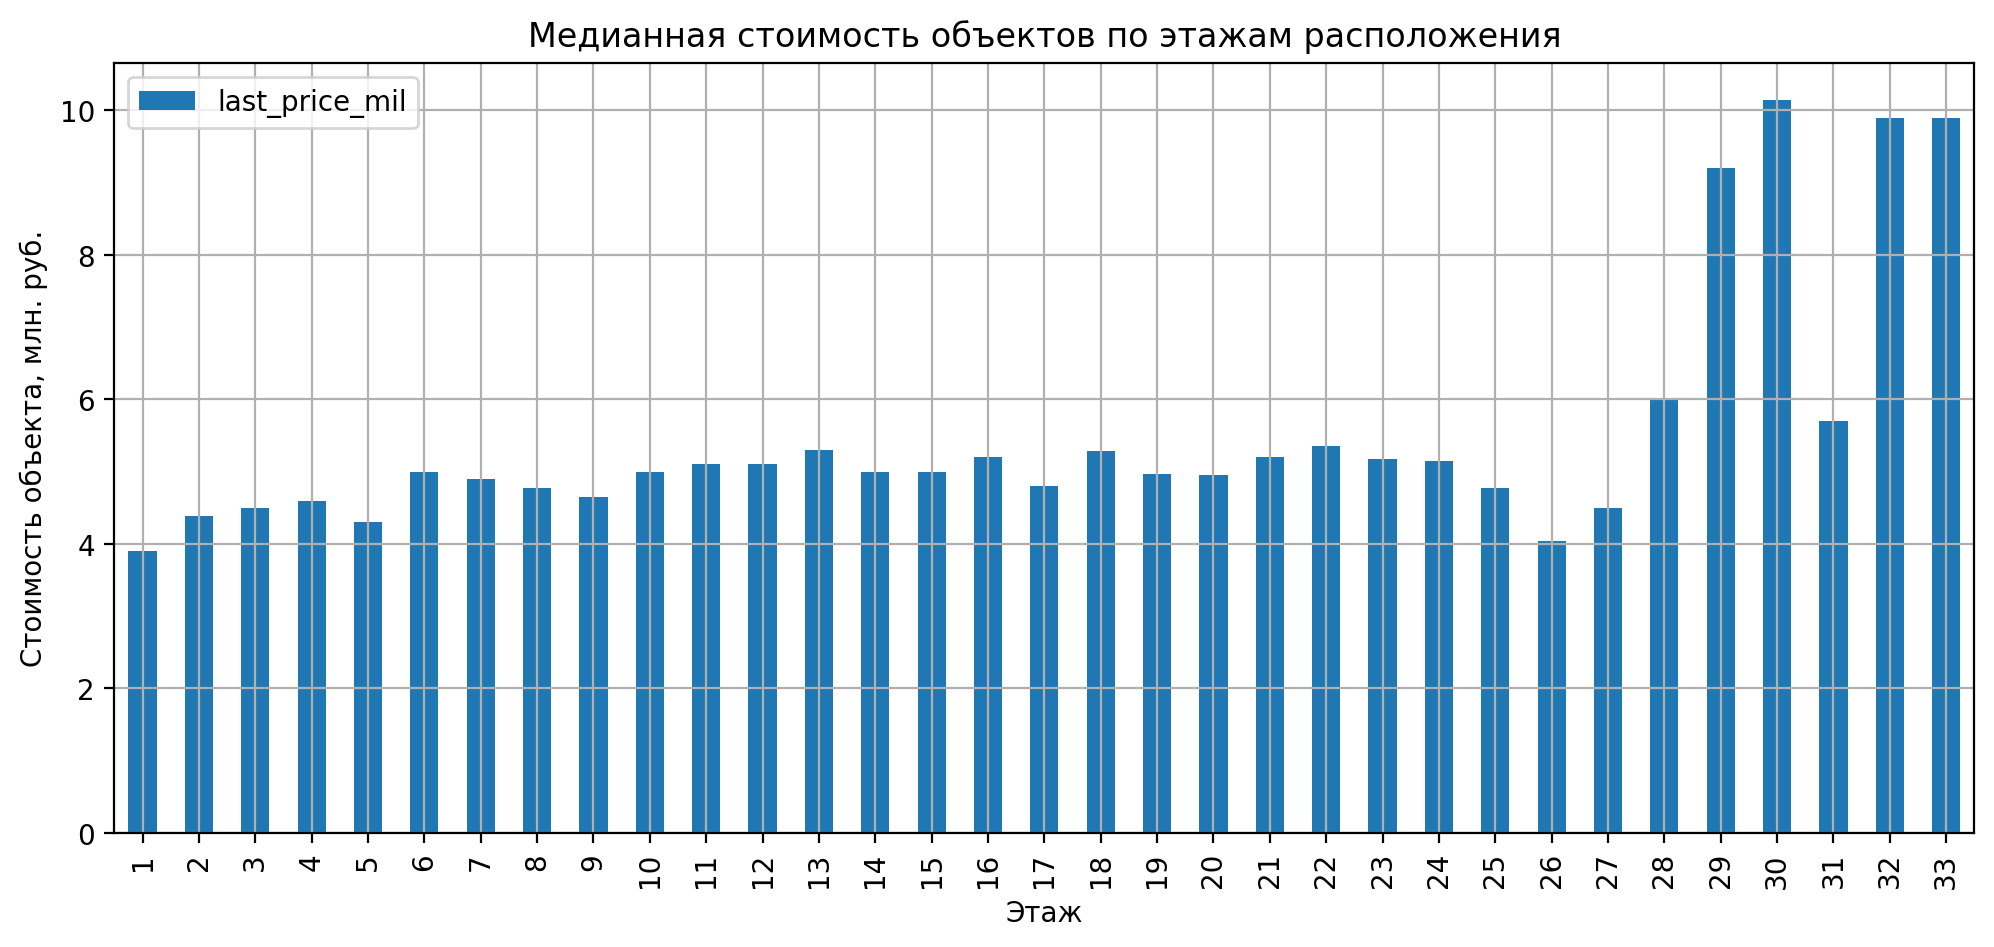

In [94]:
# Построим график по общей стоимости объектов.

floor_price.plot.bar(x='floor', y='last_price_mil', figsize=(12,5), grid=True);
plt.title('Медианная стоимость объектов по этажам расположения')
plt.ylabel('Стоимость объекта, млн. руб.')
plt.xlabel('Этаж')
plt.show()

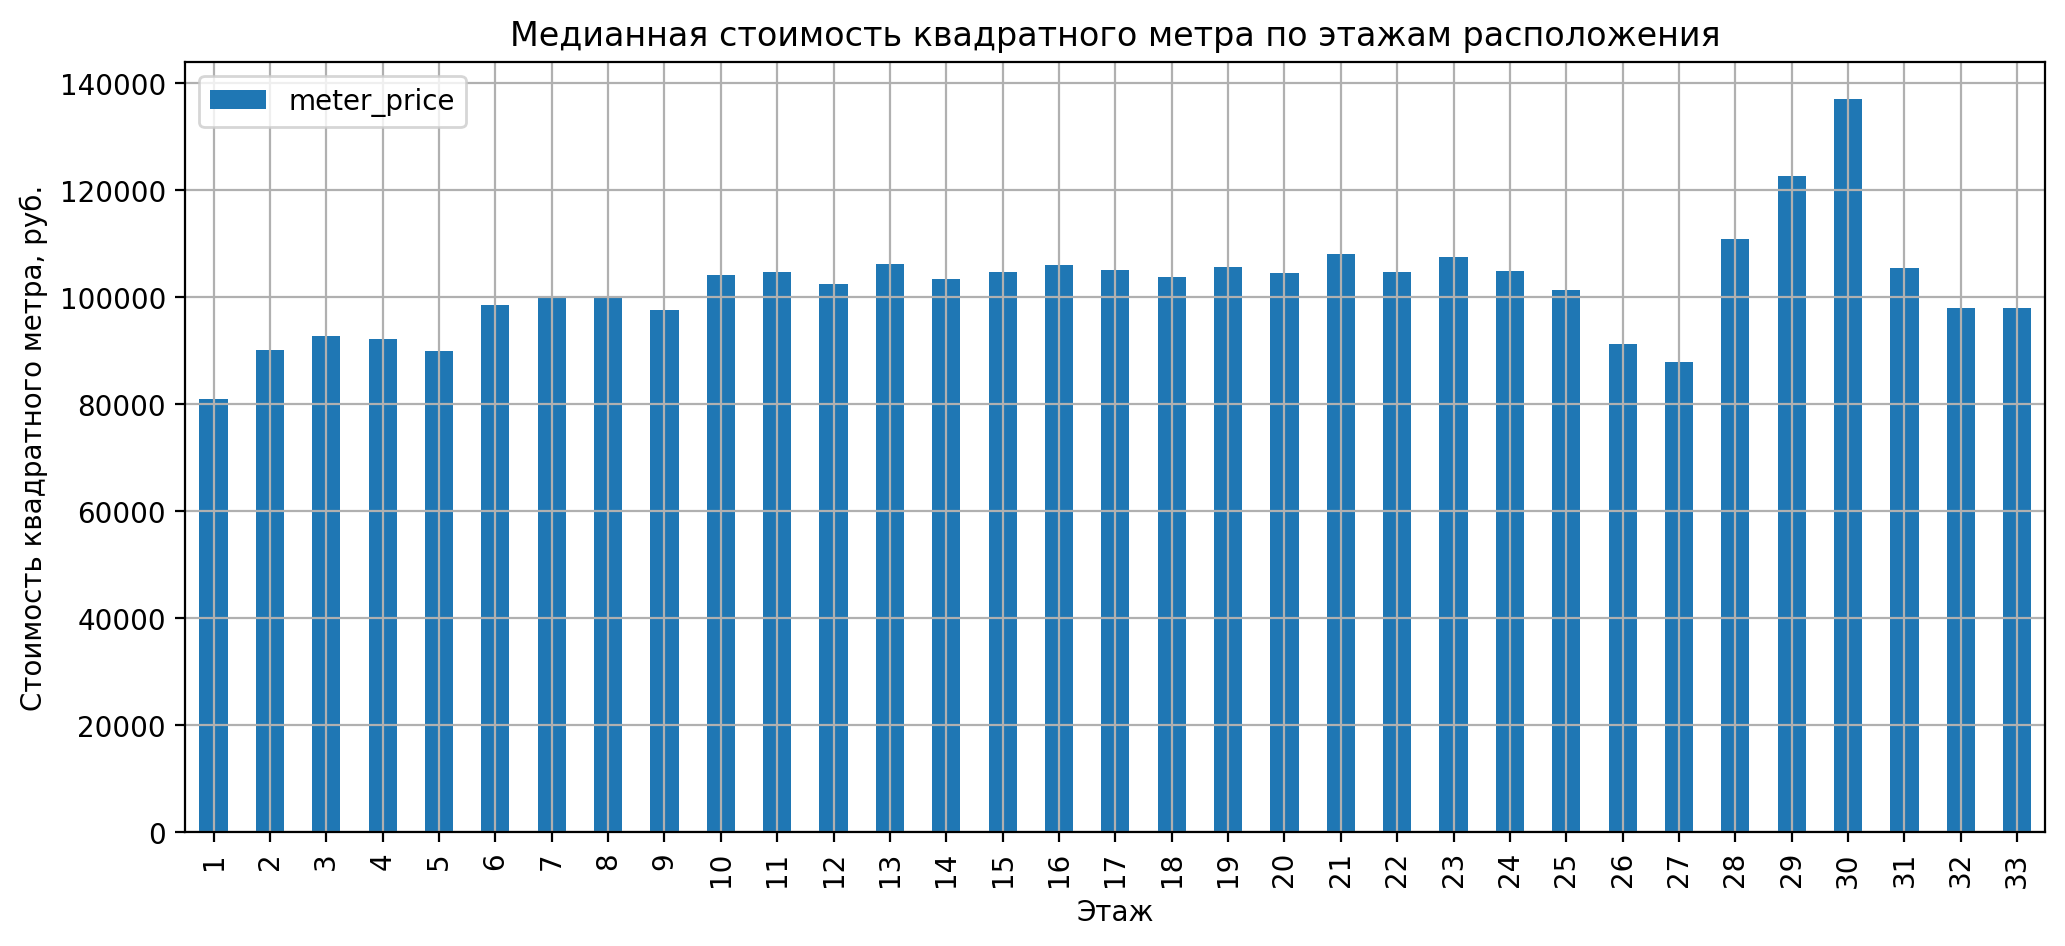

In [95]:
# Построим график по стоимости квадратного метра.

floor_price.plot.bar(x='floor', y='meter_price', figsize=(12,5), grid=True);
plt.title('Медианная стоимость квадратного метра по этажам расположения')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.xlabel('Этаж')
plt.show()

In [96]:
# Создадим сводную таблицу общей стоиомсти объектов по категориям этажей.

floor_type_price = data.pivot_table(index='floor_type', values='last_price_mil', aggfunc='median').reset_index()
floor_type_price

,floor_type,last_price_mil
0,другой,4.799000
1,первый,3.900000
2,последний,4.217233


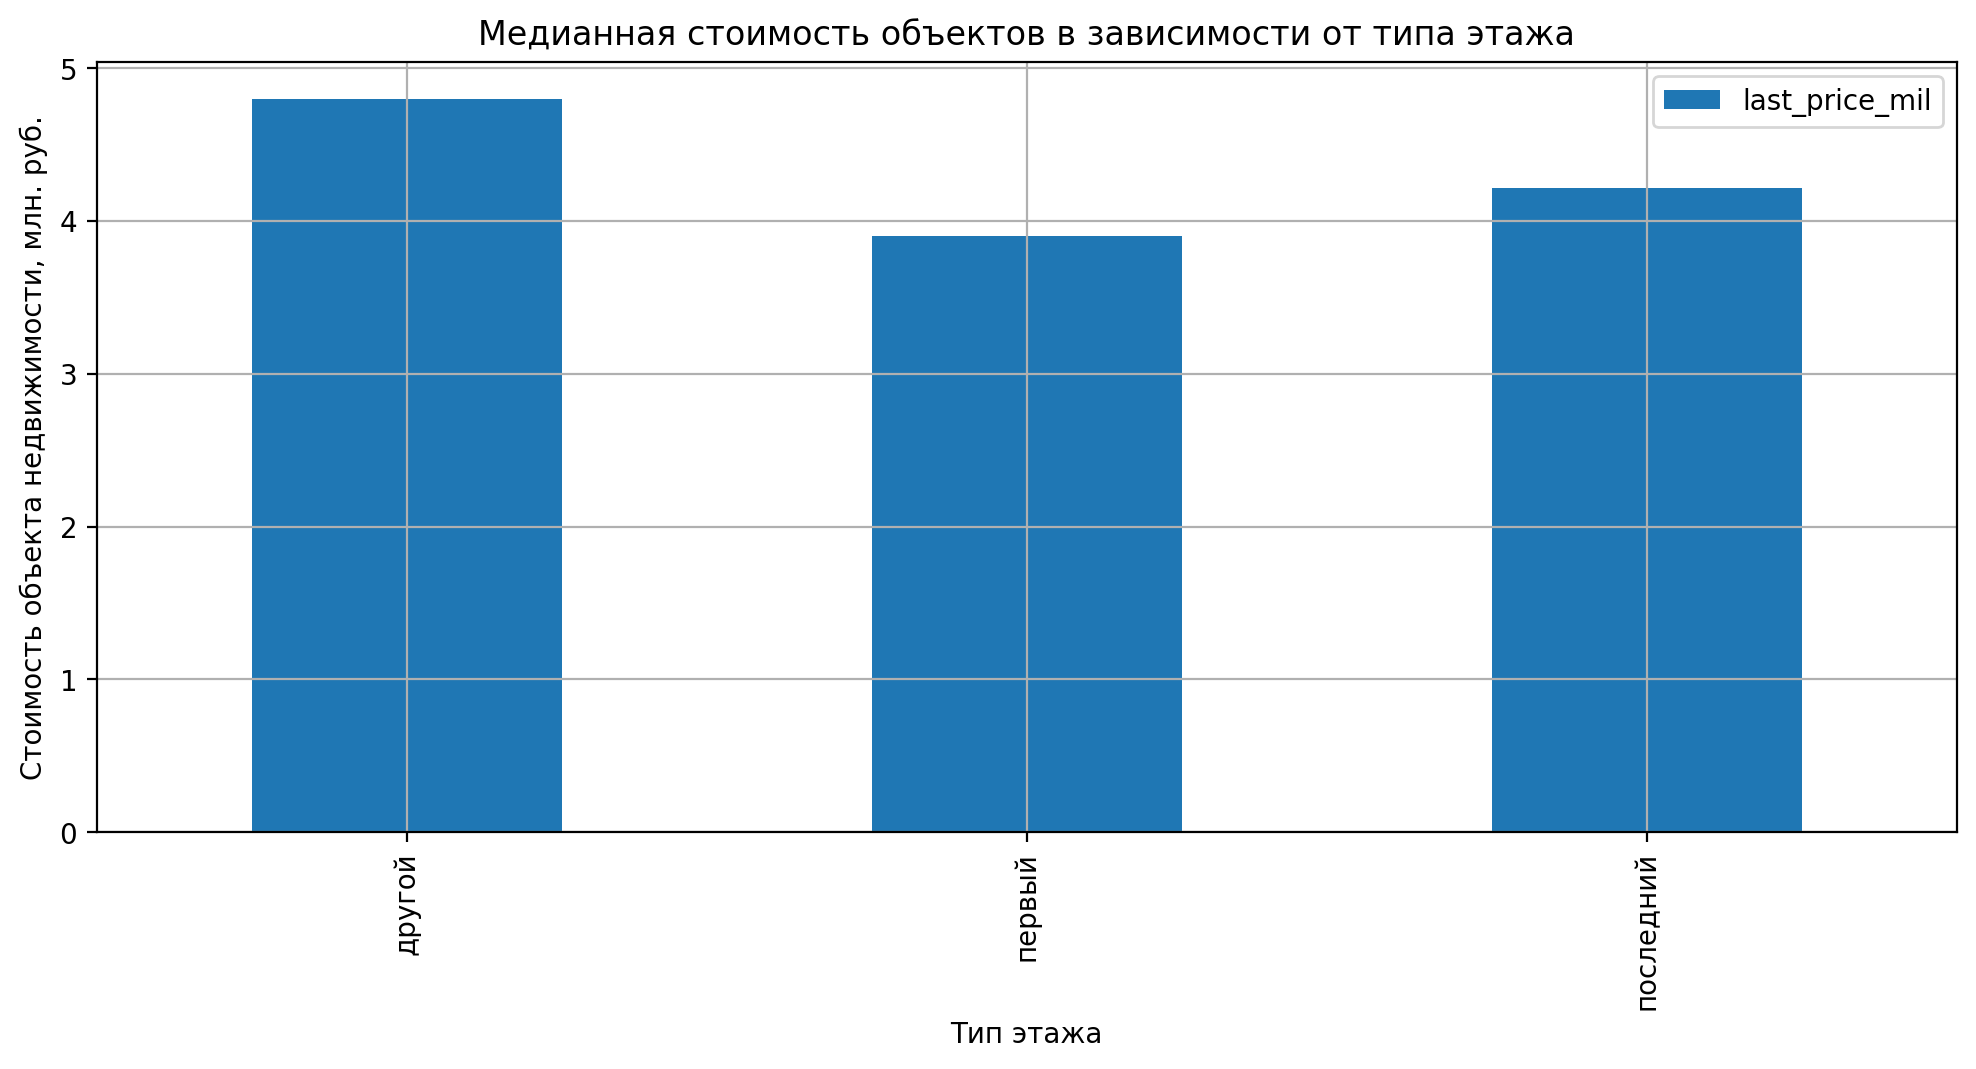

In [97]:
# Построим график по стоимости объектов по этажам.

floor_type_price.plot.bar(x='floor_type', y='last_price_mil', figsize=(12,5), grid=True);
plt.title('Медианная стоимость объектов в зависимости от типа этажа')
plt.ylabel('Стоимость объекта недвижимости, млн. руб.')
plt.xlabel('Тип этажа')
plt.show()

Медианная стоимость объектов на первом этаже ниже, чем на других других (в том числе на последнем). медианная стоимость объектов на последнем этаже чуть выше, чем объектов на первом этаже, но ниже чем на всех остальных.

In [98]:
# Создадим сводную таблицу общей стоиомсти объектов по дням публикации.

day_price = data.pivot_table(index='weekday', values='last_price_mil', aggfunc='median').reset_index()
day_price

,weekday,last_price_mil
0,0,4.60
1,1,4.69
2,2,4.65
3,3,4.60
4,4,4.50
5,5,4.50
6,6,4.50


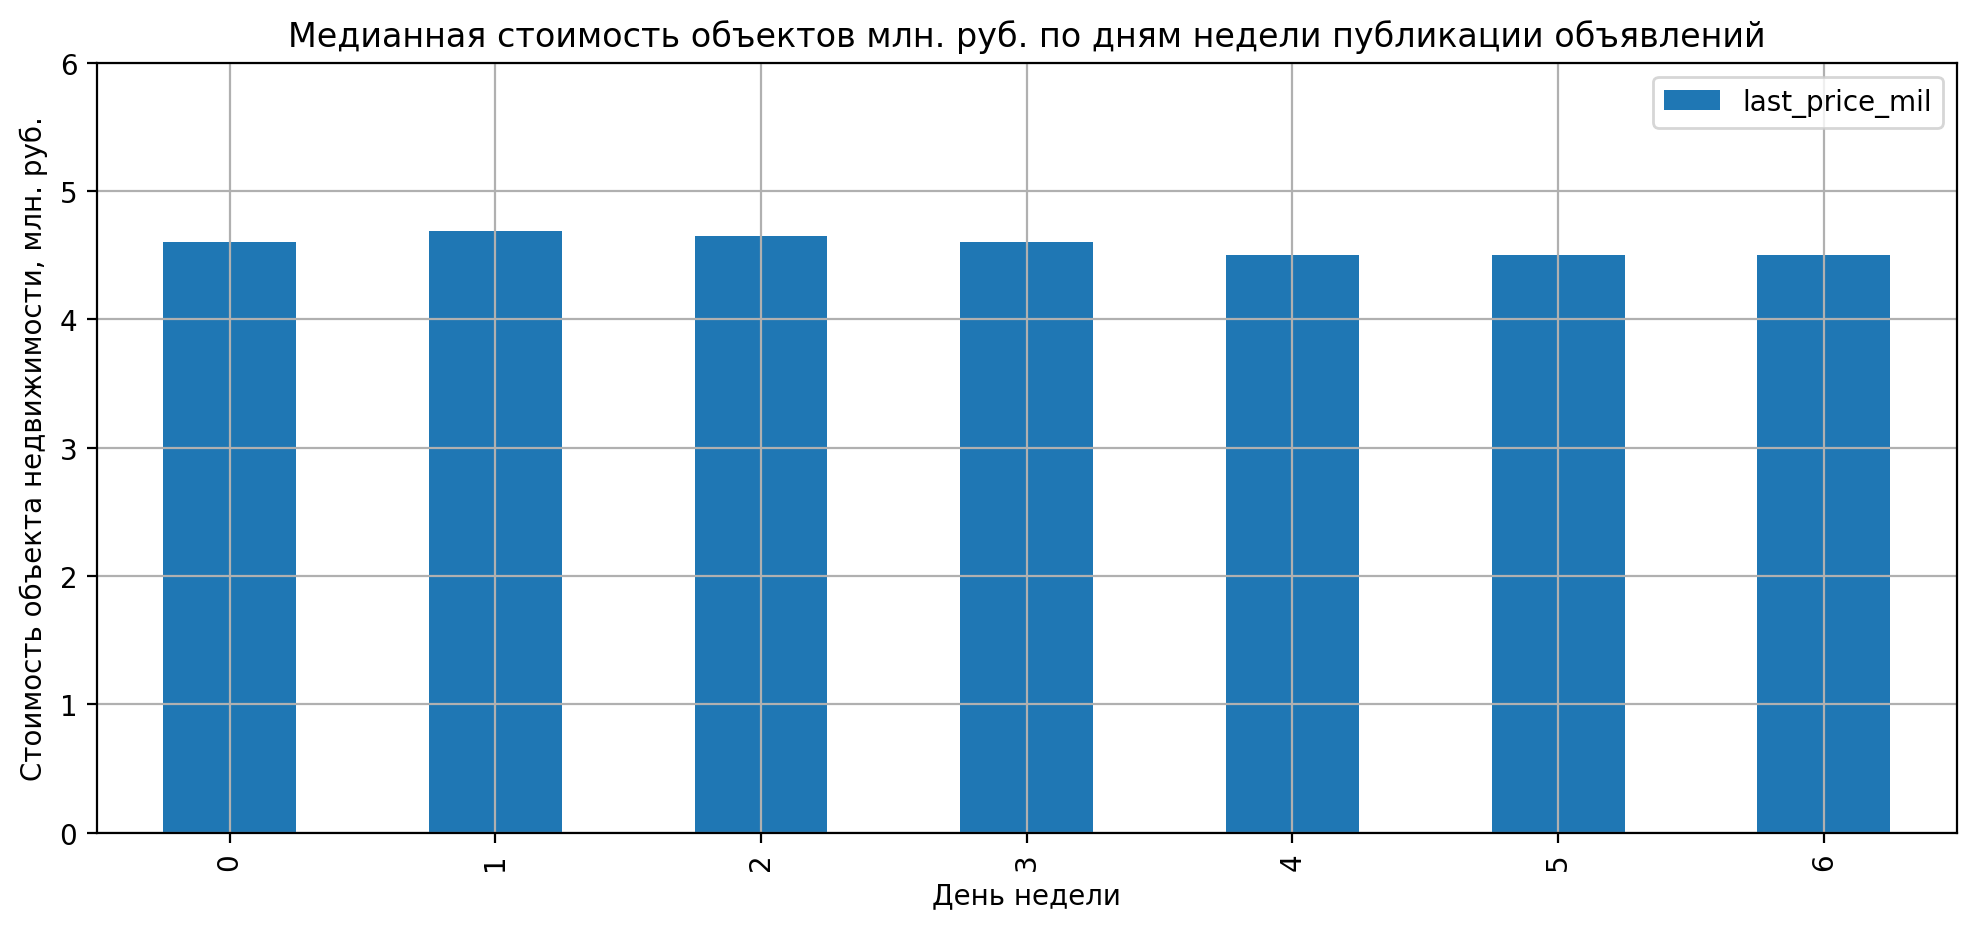

In [99]:
# Построим график стоимости по дням недели публикации объявлений.

day_price.plot.bar(x='weekday', y='last_price_mil', figsize=(12,5), ylim=(0,6), grid=True);
plt.title('Медианная стоимость объектов млн. руб. по дням недели публикации объявлений')
plt.ylabel('Стоимость объекта недвижимости, млн. руб.')
plt.xlabel('День недели')
plt.show()

Значимых отличий в медианной стоимости объектов в зависимости от дня недели публикации объявления нет.

In [100]:
# Создадим сводную таблицу общей стоиомсти объектов по месяцам публикации.

month_price = data.pivot_table(index='month', values='last_price_mil', aggfunc='median').reset_index()
month_price

,month,last_price_mil
0,1,4.5990
1,2,4.6000
2,3,4.6000
3,4,4.7500
4,5,4.5000
5,6,4.3500
6,7,4.6000
7,8,4.5225
8,9,4.6500
9,10,4.5300


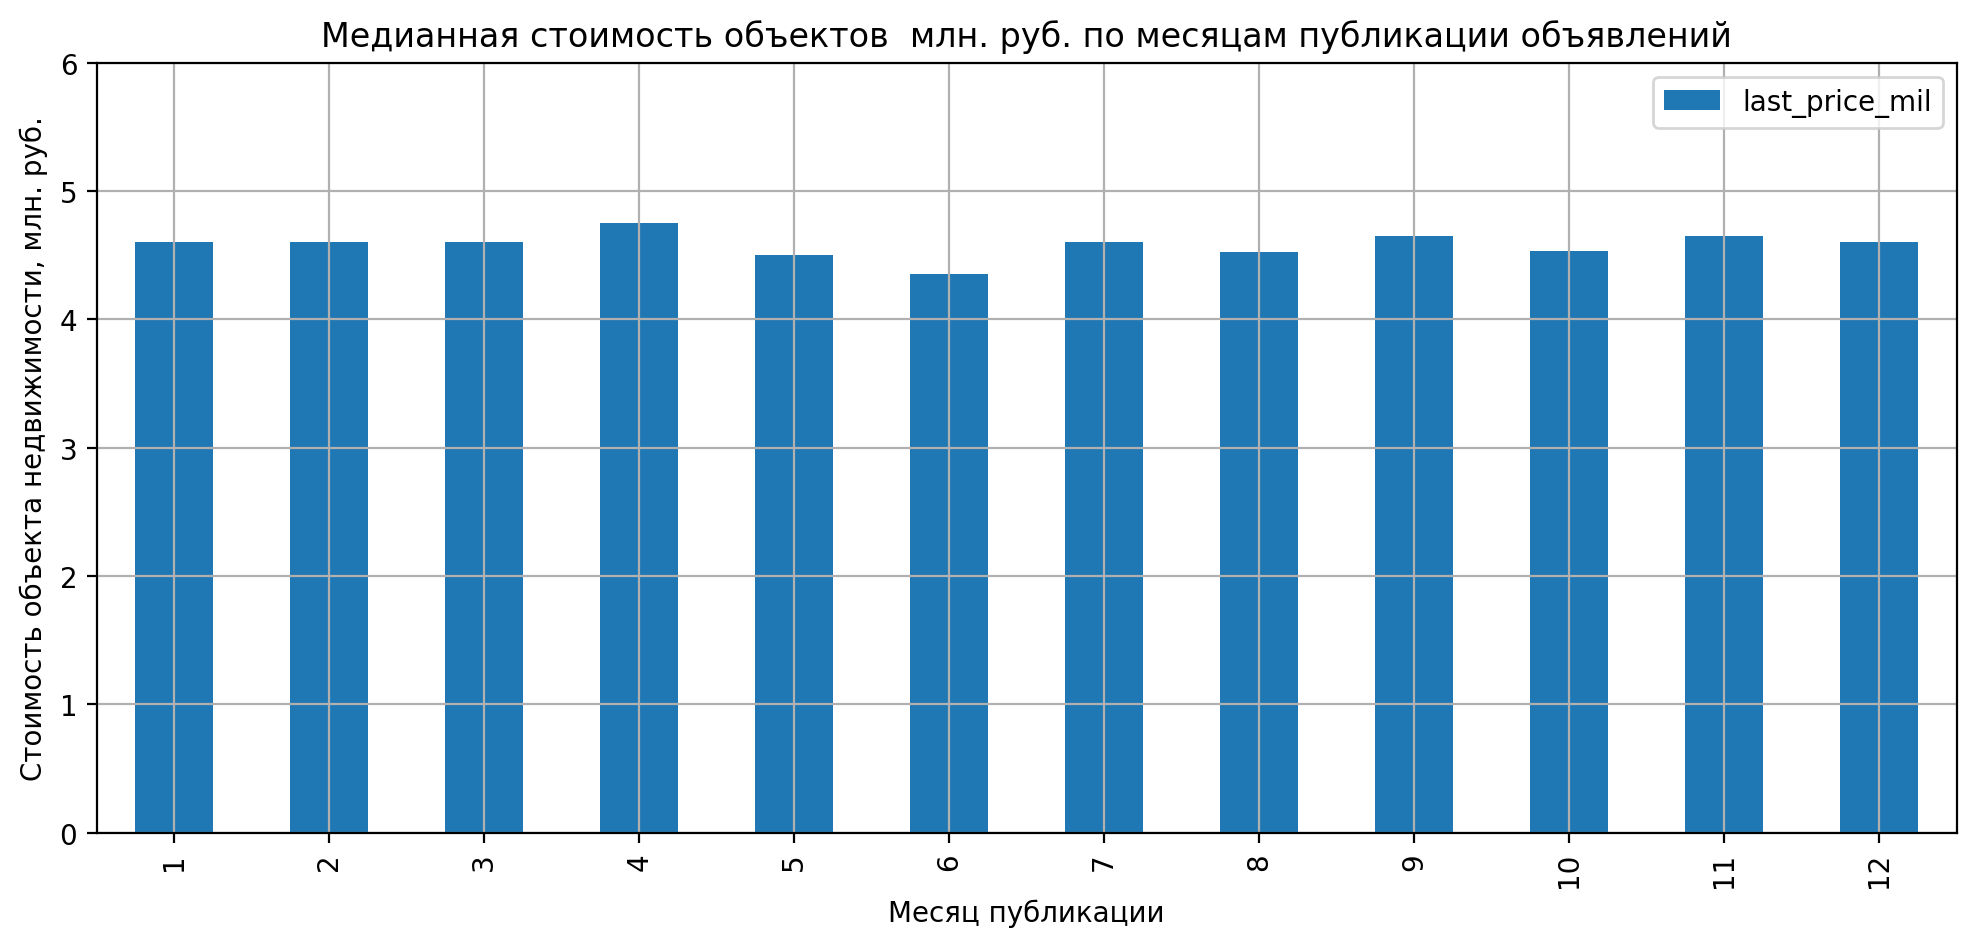

In [101]:
# Построим график стоимости по месяцам публикации объявлений.

month_price.plot.bar(x='month', y='last_price_mil', figsize=(12,5), ylim=(0,6), grid=True);
plt.title('Медианная стоимость объектов  млн. руб. по месяцам публикации объявлений')
plt.ylabel('Стоимость объекта недвижимости, млн. руб.')
plt.xlabel('Месяц публикации')
plt.show()

Отличия медианной стоимости объектов в зависимости от месяца публикации незначительны: чуть ниже других в июне, чуть выше других в апреле. Любопытно изучить месяца завершения объявлений (наверное, их можно полоцить прибавив дни размещения к дате публикации?) — попробовал ниже это сделать, чтобы построить график для месяцев снятия объявлений: вдруг в было бы совпадение снижений стоимости и снижения числа снимаемых объявлений, что говорило бы о меньшем числе сделок — необходимости снижать цену.

In [102]:
# Создадим сводную таблицу общей стоиомсти объектов по годам публикации.

year_price = data.pivot_table(index='year', values='last_price_mil', aggfunc='median').reset_index()
year_price

,year,last_price_mil
0,2014,7.265
1,2015,5.200
2,2016,4.450
3,2017,4.484
4,2018,4.500
5,2019,5.000


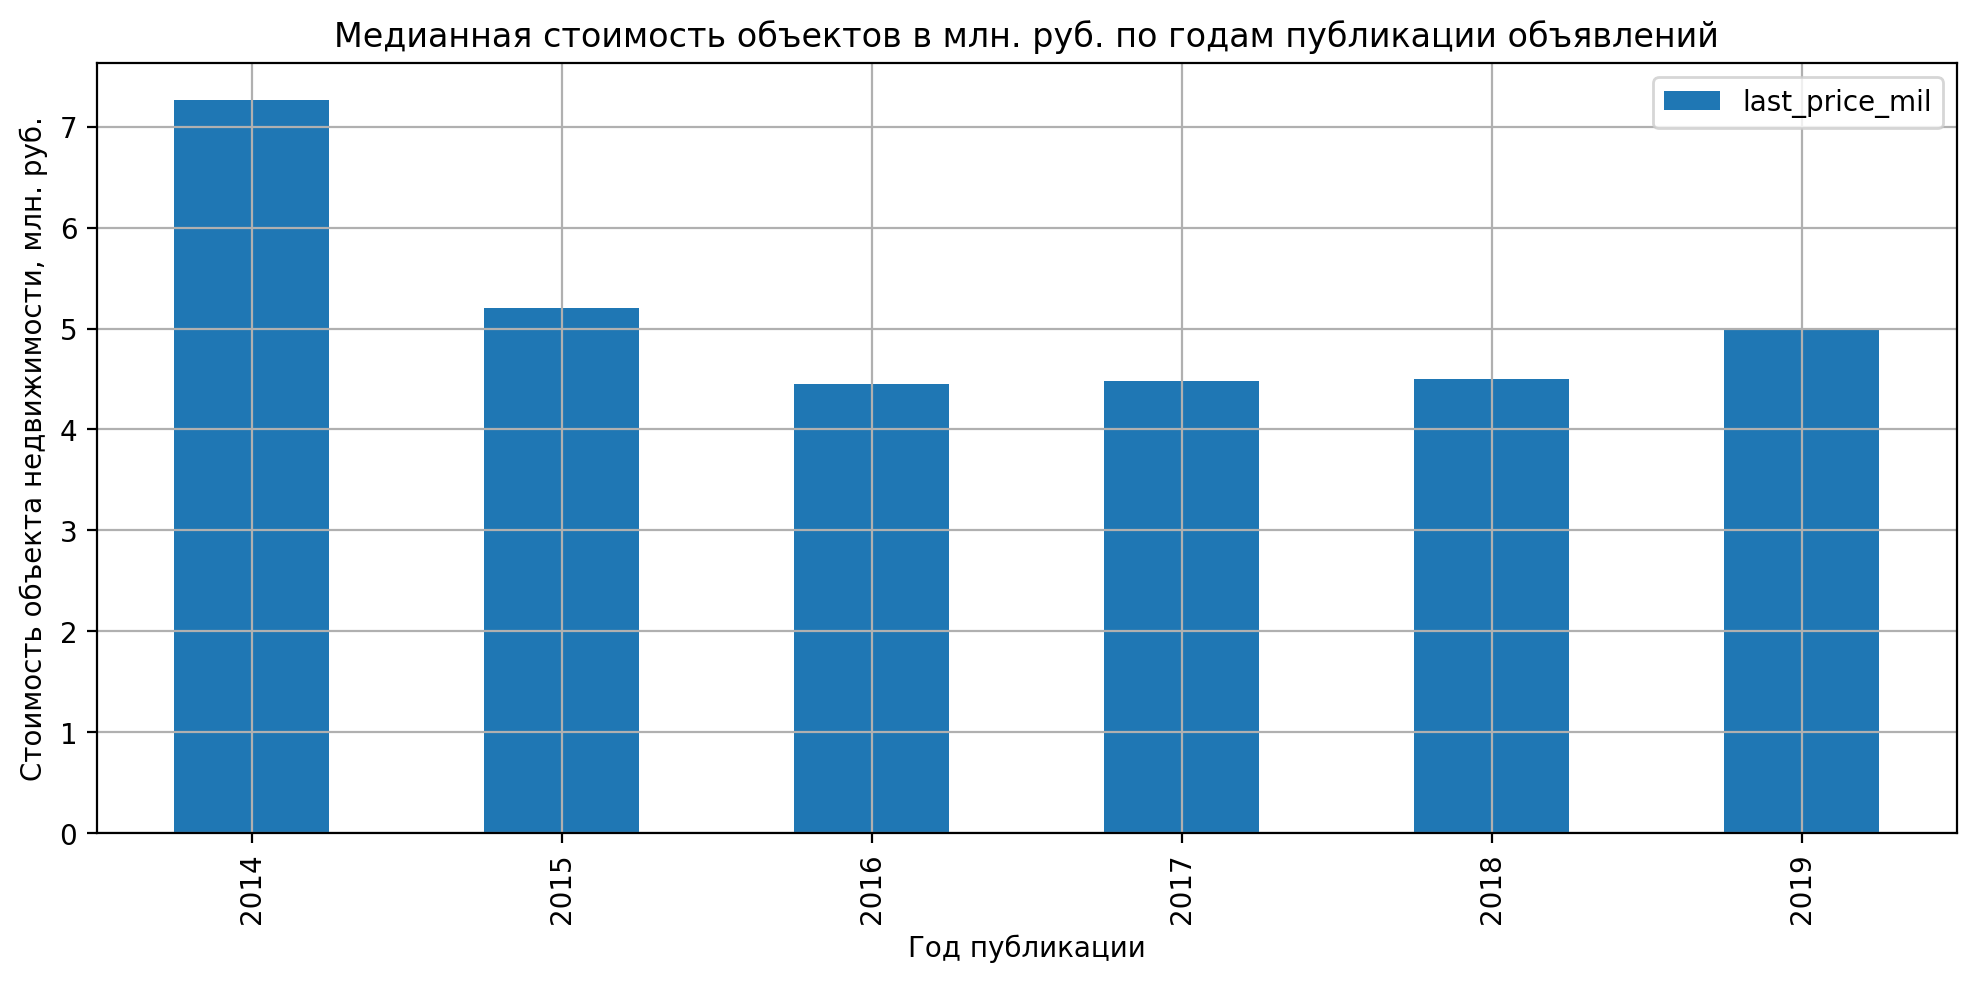

In [103]:
# Построим график стоимости по годам публикации объявлений.

year_price.plot.bar(x='year', y='last_price_mil', figsize=(12,5), grid=True);
plt.title('Медианная стоимость объектов в млн. руб. по годам публикации объявлений')
plt.ylabel('Стоимость объекта недвижимости, млн. руб.')
plt.xlabel('Год публикации')
plt.show()

Видно резкое снижение медианной стоимости объектов в 2014 — 2016 годах, видимо, на фоне экономического спада в стране, как теперь принято говорить, " в связи с геополитической ситацией".
В 2017 — 2019 годах началось постепенное восстановление.

#### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [104]:
# Создадим таблицу с 10 локациями с наибольшим числом объявлений.

top_10_locality = data.pivot_table(index='locality_name_new', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False)
top_10_locality = top_10_locality.head(10).reset_index()
top_10_locality

,locality_name_new,last_price
0,Санкт-Петербург,15252
1,Мурино,590
2,Кудрово,472
3,Шушары,440
4,Всеволожск,397
5,Пушкин,363
6,Колпино,337
7,Парголово,327
8,Гатчина,307
9,Выборг,236


In [105]:
# Посчитаем для каждого населенного пункта стоимость квадратного метра.

for locations in top_10_locality['locality_name_new'].unique():
    top_10_locality.loc[top_10_locality['locality_name_new'] == locations, 'price_m'] = \
    ((data.loc[data['locality_name_new'] == locations, 'last_price']) / ((data.loc[data['locality_name_new'] == locations, 'total_area']))).mean().round()
                                                

In [106]:
# Отсортируем цену квадратного метра по убыванию.

top_10_locality = top_10_locality.sort_values(by='price_m', ascending=False)
top_10_locality

,locality_name_new,last_price,price_m
0,Санкт-Петербург,15252,109281.0
5,Пушкин,363,102216.0
2,Кудрово,472,95325.0
7,Парголово,327,90176.0
1,Мурино,590,86088.0
3,Шушары,440,78677.0
6,Колпино,337,75333.0
8,Гатчина,307,68746.0
4,Всеволожск,397,67214.0
9,Выборг,236,58285.0


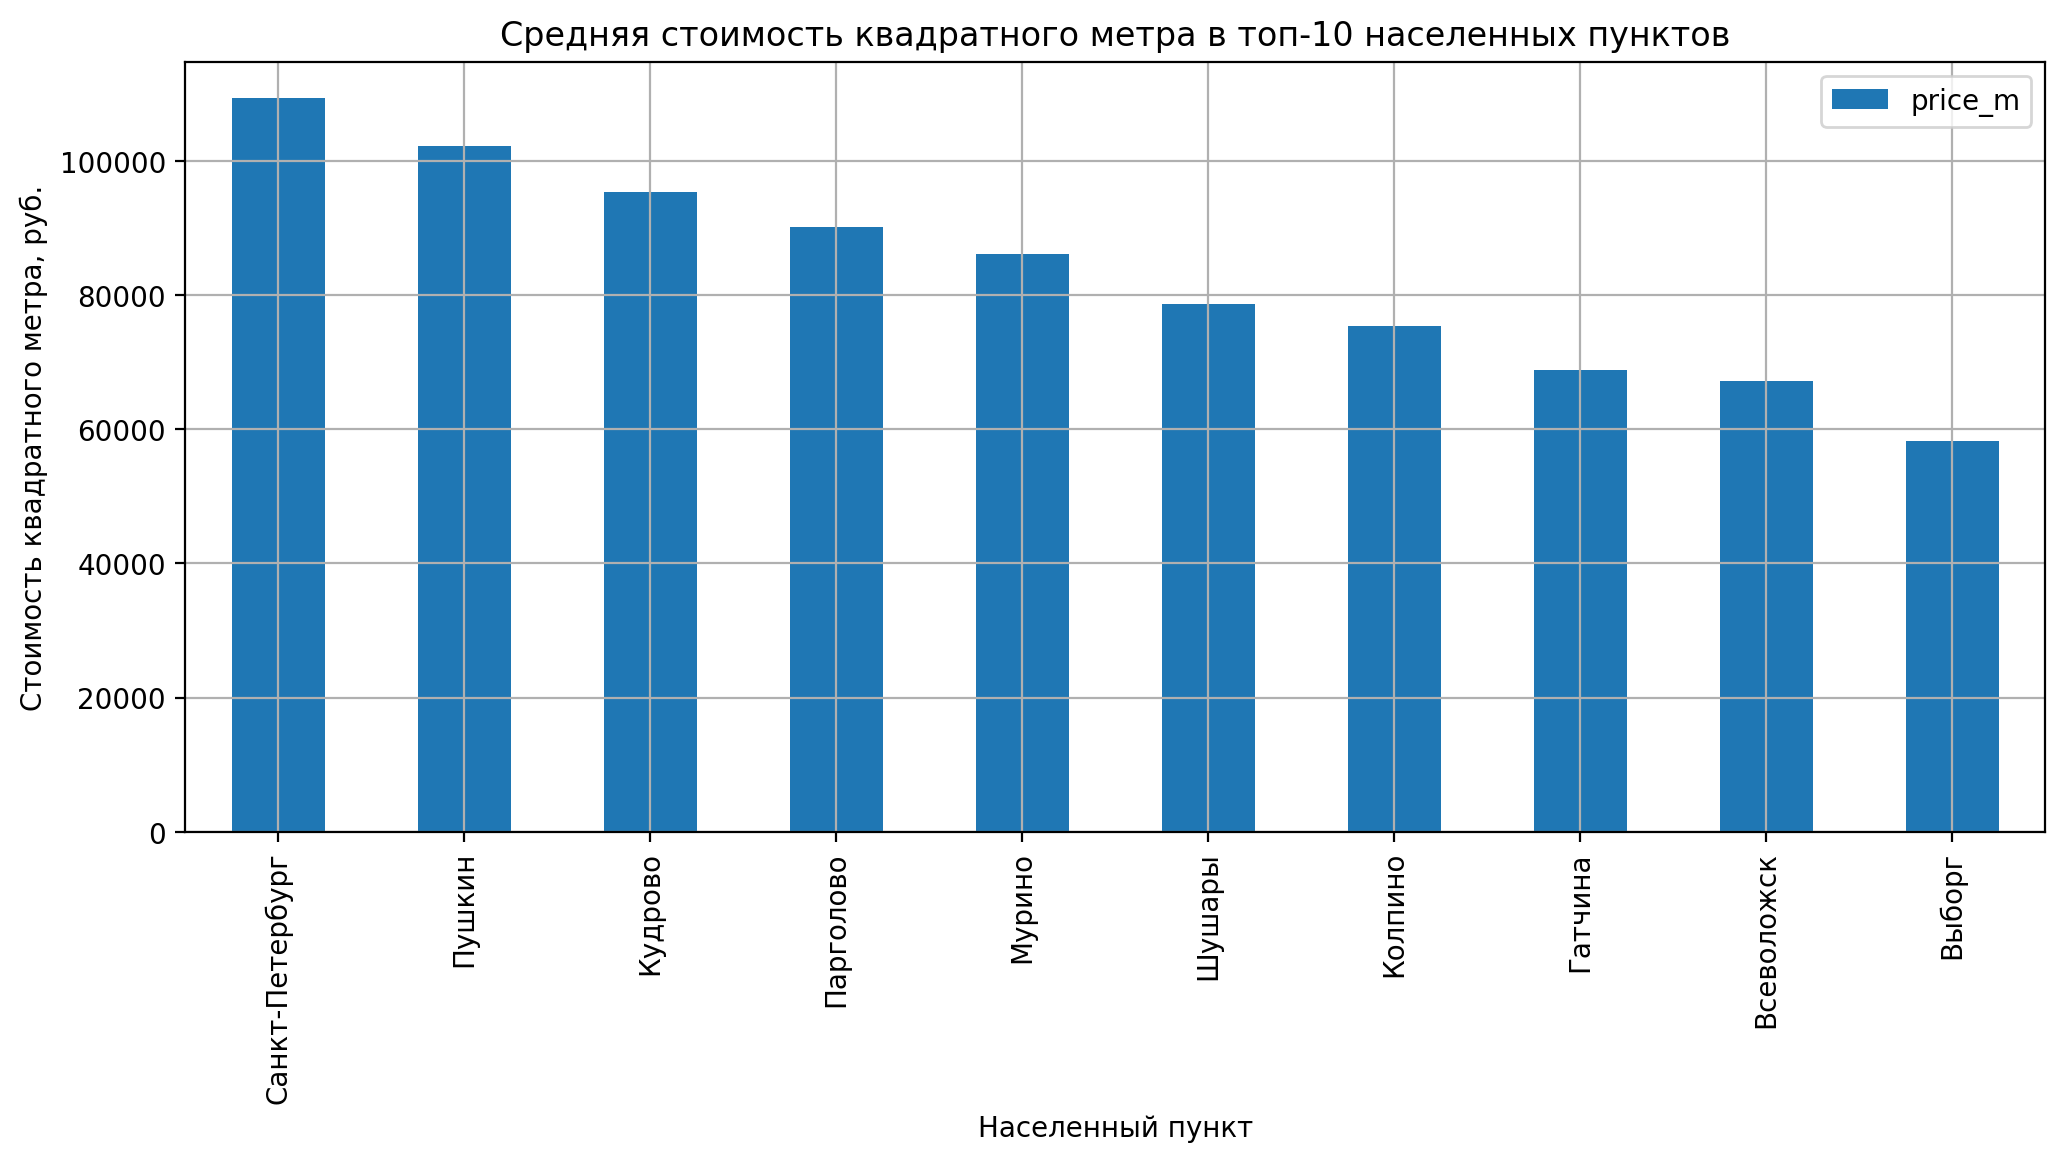

In [107]:
# Построим график средней стоимости квадратного метра по топ-10 локациям.

top_10_locality.plot.bar(x='locality_name_new', y='price_m', figsize=(12,5), grid=True);
plt.title('Средняя стоимость квадратного метра в топ-10 населенных пунктов')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.xlabel('Населенный пункт')
plt.show()

Логично, что самая высокая стоимость квардатного метра в Санкт-Петербурге.
Самая низкая в представленной выборке — в Выборге.

#### Cредняя цена каждого километра от центра Санкт-Петербурга

In [108]:
# Сделаем таблицу с расстоянием до 15 километров. 0 тоже включаем,
# так как расстояния до 500 метров округлялись в 0.

km = []
for n in range(0,29):
    km.append(n)
    
km_spb = pd.DataFrame(km)
km_spb.columns = ['km']

# Заполним таблицу средней стоимостью квадратного метра по каждому километру от центра города.
for k in km_spb['km'].unique():
    km_spb.loc[km_spb['km'] == k, 'price'] = (data.loc[(data['locality_name_new'] == 'Санкт-Петербург') &
                                (data['city_centers_nearest_km'] == k), 'meter_price'].mean()).round()

km_spb

,km,price
0,0,129068.0
1,1,128319.0
2,2,121439.0
3,3,114539.0
4,4,120984.0
5,5,127338.0
6,6,128837.0
7,7,124359.0
8,8,122640.0
9,9,111474.0


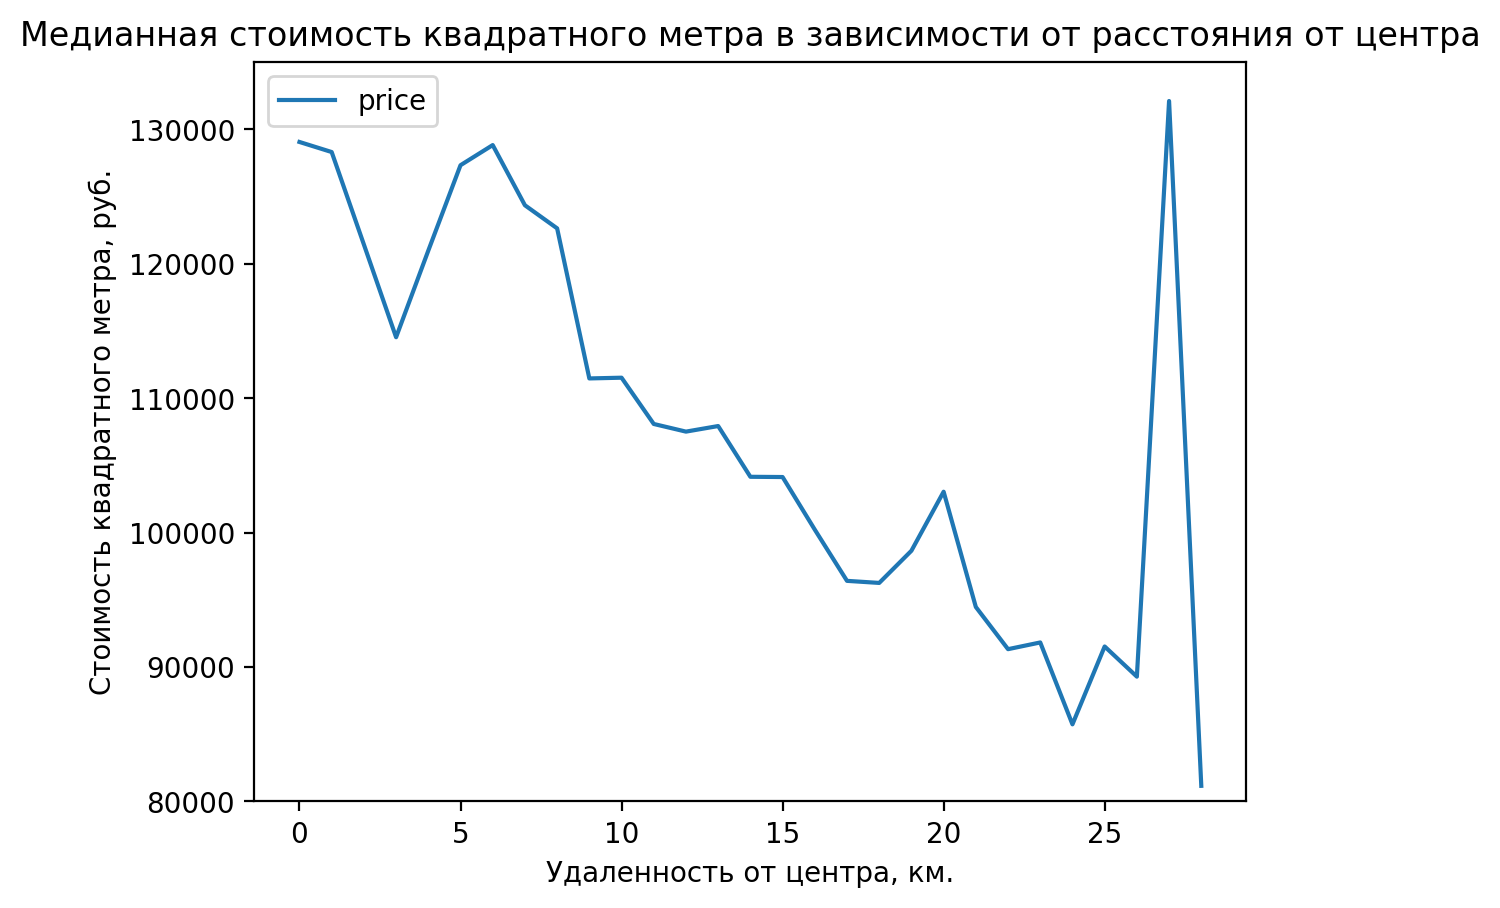

In [109]:
km_spb.plot(x='km', y='price', ylim=(80000,135000))
plt.title('Медианная стоимость квадратного метра в зависимости от расстояния от центра')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.xlabel('Удаленность от центра, км.')
plt.show()

Видно, что, чем дальше от центра, тем ниже медианное значение цены квадратного метра. Хотя есть и интересное снижение цены в 2-4 километрах от центра. Возможно, это связано с прямо-перпендикулярной планирвовкой — в отличие от радиально-кольцевых городов престижные районы могут быть расположены не равномерно во все стороны от центра.

### Общий вывод

В рамках проекта изучена база объявлений о продажи недвижимости в Санкт-Петербурге и Ленинградской области.
    
Восстановлены пропущенные значения в данных о высоте потолков, жилой площади, ниличии балконов, является ли объект аппартаментами.
    
Исправлены или удалены данные об объектах с аномальним значения стоимости, площади, высоты потолков и числа комнат.

Объекты недвижимости в Санкт-Петербурге и области довольно разнообразны: по стоимости, площади, сроку продажи.
    
Стоимость недвижимости в Санкт-Петербугре выше, чем за его пределами. Ближе к центру города недвижимость дороже, однако это касается не всех районов города. На втором месте по медианной стоимости квадратного метра город Пушкин.

Далее по стоимости квардратного метра и объему предложений идут пригороды Санкт-Петербурга, ставшие его новыми районами.

Наибольшее значение на общую стоимость недвижимости оказывает площадь объекта. Число комнат и размер кухни оказывают заметно меньшее влияние. Расположение объекта на последнем и первом (в большей степени) снижает его стоимость. Это не касается объектов, расположенных на верхних этажах высотных зданий (более 30 этажей).

Медианное значение срока размещения объявления — три месяца. Но большое число объектов продается и больше полугода, некоторые даже больше года.
    
День недели размещения объявления не влияет на медианную стоимость объектов. Месяц размещения объявления оказывает незначительное влияние: чуть ниже других в июне, чуть выше других в апреле. В 2015 году произошло снижение медианной стоимости объектов примерно на четверть к 2014 году. Медленный рост медианной стоимости объектов начался в 2017 году.